<a href="https://colab.research.google.com/github/martmaz/MyDiabetes-app/blob/main/Kohonena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importy
!pip install neurolab
!pip install somoclu
import numpy as np
import neurolab as nl
import numpy.random as rand
import pylab as pl
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

import somoclu
import copy

     |████████████████████████████████| 655kB 7.4MB/s 
  Created wheel for neurolab: filename=neurolab-0.3.5-cp36-none-any.whl size=22182 sha256=11a1f1533c7f1df5dc0319b37bb0db0c9361ac08c3845985db54cbce58b06d42
  Stored in directory: /root/.cache/pip/wheels/c6/8f/37/32ab1cf4d601dc0bc49d7241012a4292db4b343bebff5b68e6
Successfully built neurolab
     |████████████████████████████████| 6.2MB 8.5MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp36-cp36m-linux_x86_64.whl size=421008 sha256=fc55436eab31329b570484a8e442467519cd9659ffb481cf7cd5478c86b21191
  Stored in directory: /root/.cache/pip/wheels/a6/e2/a0/4a61002b47e4965d7f59fd4c7ccf2e86a03ccad366f978d2a7
Successfully built somoclu


In [ ]:
#Zbiór danych:
#Dane wejściowe: 400 próbek - 100 Alzhaimer, 100 Padaczka, 100 Parkinson, 100 Schizofrenia
inp = np.array(
        [[0.429411525078794, 0.405854781325776, 0.122420444736801, 0.0113275848401314, 0.0803482809290161, 0.110627341260173, 0.430710727541833, 0.220181074874092, 0.424682132163942, 0.235664443931785, 0.119925859511112, 0.148745693866033, 0.0957183492974696, 0.0772781138669791, 0.418188626954671, 0.0266485182611944, 0.127731345116911, 0.630261026710094, 0.40715580678195, 0.606982958445001, 0.626889729610324, 0.187194961488818, 0.802126196117467, 0.01991622040519, 0.429490493563688], [0.43269908892843, 0.428673671918689, 0.071935782705451, 0.129574661788322, 0.0179035743886696, 0.102740474053638, 0.420236198937511, 0.230833008168771, 0.40476819470126, 0.206152596032354, 0.0674639938569813, 0.13181964684751, 0.0930229243574373, 0.126716991309425, 0.422122426156964, 0.0494247368813636, 0.0819871247513593, 0.621108342155406, 0.407042082351562, 0.627234727391726, 0.632210845495143, 0.106300707137582, 0.831040496603406, 0.163087024443464, 0.406839920488844], [0.404584224068196, 0.411234863017818, 0.154200287073671, 0.00806191612514092, 0.113719497063781, 0.165288796148021, 0.433558880089916, 0.212558438915214, 0.426090355881609, 0.20930630024565, 0.189430621605263, 0.0018624279299818, 0.166639257443158, 0.177407875313727, 0.429581142944571, 0.0164948691645084, 0.131936742840065, 0.634226725347796, 0.411798911305434, 0.612500011871598, 0.608757982244696, 0.17738246401002, 0.82009905372048, 0.132657955574118, 0.404465333792804], [0.432972868406619, 0.419080046191774, 0.101236861871896, 0.0135746382741221, 0.0894756087080835, 0.0503080150303697, 0.425149685940044, 0.216101561994789, 0.403983760651189, 0.214324455402657, 0.0425925848067942, 0.160210534221997, 0.0670969444584015, 0.15408050612527, 0.419201199018695, 0.081585494046303, 0.0487890670213281, 0.60220314434385, 0.431780196759689, 0.615112377456328, 0.604678450827735, 0.136865209140142, 0.826385321303653, 0.139411005320023, 0.429637972891576], [0.422828168788737, 0.405979919134942, 0.0666381496796078, 0.0991134700682139, 0.132230369527306, 0.0604340743414012, 0.421038753842848, 0.201958045388325, 0.404241491962681, 0.202671211181727, 0.123965703864037, 0.175243079581292, 0.0853942757486322, 0.0920641716486482, 0.407294910985398, 0.0488837291062734, 0.00185414347818031, 0.621105551051119, 0.417006777327069, 0.605621485875812, 0.608124950544818, 0.0919673181943449, 0.80807138605871, 0.123600818646433, 0.423028104082413], [0.403521208620479, 0.421731548084599, 0.178410296779979, 0.0183787048983647, 0.132978691486375, 0.0226507628002963, 0.429435839334335, 0.206393581969787, 0.42312991701907, 0.224695868017329, 0.114948221962569, 0.146481301928046, 0.183070754500251, 0.143782349912447, 0.416385554111067, 0.0565355229887125, 0.101133783501569, 0.610292401892277, 0.414583294335371, 0.629565921079759, 0.612635502475928, 0.121415907609434, 0.820644637957494, 0.0980914074970845, 0.400581924847948], [0.4100537857011, 0.409493263371899, 0.166429134183667, 0.155448225233329, 0.121320844071649, 0.178567599365535, 0.431732401955958, 0.223927371036791, 0.411870193152721, 0.214526218810331, 0.0735766319817957, 0.00810537262765926, 0.00803658160376313, 0.0792390162111257, 0.415447584205508, 0.0807230982238789, 0.0530844733980633, 0.629881131461482, 0.406470256298886, 0.622559739355251, 0.610363754534577, 0.168651004519025, 0.826695770341832, 0.0620137456668876, 0.432343962057794], [0.4197424228433, 0.423612255455012, 0.1045297051507, 0.155333947495064, 0.0063847288526216, 0.122654856244779, 0.435699709340473, 0.211942926726839, 0.423602614015707, 0.235480350770322, 0.0270155602651958, 0.0718553660395416, 0.184862083486721, 0.184639338667966, 0.434874504260993, 0.0226493792900445, 0.179783729168786, 0.606894610509176, 0.434978192360917, 0.626662031220144, 0.633482317059177, 0.037759982518795, 0.836344513175898, 0.125737477387915, 0.418605039562031], [0.434565996759178, 0.424880643563354, 0.118270266340233, 0.1372635225497, 0.0130731588324297, 0.0910980127402887, 0.400018857750386, 0.232435349575818, 0.427043645818037, 0.214518841866532, 0.00477564728493859, 0.13382452865184, 0.0359493001932514, 0.187715193233858, 0.422383987454218, 0.0940627155220872, 0.1722242206369, 0.615975331635524, 0.414709152134675, 0.629064558387521, 0.601852426621086, 0.0751195920514899, 0.816892602189192, 0.0223374420781337, 0.4196572419743], [0.434832476120694, 0.427008272500936, 0.111538493860969, 0.0284744340708137, 0.0607239496842943, 0.121470222597621, 0.43124233313557, 0.204265402663926, 0.421053004905521, 0.222406257293905, 0.0800113282153959, 0.138607478645883, 0.126752857007614, 0.164188030515929, 0.42510357726424, 0.134217373232136, 0.0746100694350812, 0.614202155379869, 0.430485995013053, 0.602426737938031, 0.621395269862951, 0.188513307474108, 0.803245117570881, 0.0280853086945052, 0.421892563717772], [0.40568983224856, 0.41626455170594, 0.0394710356192754, 0.125324998052578, 0.100864213331884, 0.103496061000085, 0.422113649548372, 0.235681887229138, 0.426715167040359, 0.205572749977802, 0.0349790549912271, 0.0426126434262577, 0.111423526788994, 0.0738879174233614, 0.425997942493849, 0.0462789408093807, 0.0047224944305257, 0.629839320643444, 0.422213236006424, 0.634323530425851, 0.60588065029786, 0.0764468072178302, 0.802178925606568, 0.00375528610847523, 0.427451747464031], [0.435038399421558, 0.403025951745689, 0.0572368027531032, 0.0985330390770023, 0.124344684473843, 0.122989181255694, 0.435737202426089, 0.219493353775269, 0.408477251622399, 0.213766561880445, 0.137897300819196, 0.0511203990369394, 0.128271359116972, 0.0864009473274312, 0.412522916369383, 0.149163315567461, 0.127572991348767, 0.624435046473127, 0.413595659916982, 0.6179625300979, 0.630266448285196, 0.125182731403857, 0.82391911847178, 0.183215428756916, 0.430878022074756], [0.43455372683157, 0.408266068570677, 0.0894754362183422, 0.184865165405134, 0.077447647437819, 0.103338327459931, 0.419049250503118, 0.225519718837552, 0.426531967255228, 0.205816936383762, 0.0703689104378876, 0.127875921350783, 0.0685941893469856, 0.0468705675512351, 0.418663354180964, 0.0140770196035761, 0.15906242072164, 0.607494469541117, 0.431666261151069, 0.627260767159689, 0.606048949580627, 0.171256143376557, 0.830254804526941, 0.184370851382529, 0.413821550984777], [0.417522060918895, 0.43297147875021, 0.0437927504401961, 0.123308383615348, 0.155796432328569, 0.136998857910164, 0.417310794206089, 0.236081647485527, 0.435038606755627, 0.22736785877092, 0.159896416618959, 0.0907235175681036, 0.117852901143506, 0.149040387674594, 0.420096676215637, 0.0748378511265224, 0.18458493127914, 0.611483580614025, 0.428333172624917, 0.626800823051438, 0.618129442216282, 0.189122537538398, 0.826265270648609, 0.0235334963578958, 0.403055835709082], [0.428890124926886, 0.405500846484789, 0.160418670612124, 0.152062809316956, 0.136488199209118, 0.0992741080976494, 0.428928648559343, 0.210391361347826, 0.431296183532244, 0.231447111501146, 0.13950364132673, 0.118506118406814, 0.154118668169054, 0.16773914506078, 0.405649477410017, 0.000644883363218408, 0.0108172482326971, 0.604830576571356, 0.416784849627655, 0.630003777683135, 0.636075794192828, 0.124101023407991, 0.813121698764176, 0.0888079050871473, 0.426492826086004], [0.405122096824443, 0.429811992887373, 0.0370052150177394, 0.0862215646581147, 0.184043372743908, 0.188803878582962, 0.408225129978988, 0.214964263654041, 0.403113066528072, 0.212663040490381, 0.108494915836632, 0.044924537201773, 0.00365892070868687, 0.173605219445673, 0.42029022324478, 0.0419286094672746, 0.0855615244193561, 0.624239810310157, 0.429384567058236, 0.605649716667682, 0.61283019816077, 0.0206029212925478, 0.835979033352141, 0.12477186062785, 0.411984814907742], [0.415225582302809, 0.419434161912888, 0.0429251383847558, 0.0821543857188577, 0.100953442247478, 0.0415485601559304, 0.41798120391219, 0.216780721892667, 0.413228361849123, 0.224747839085786, 0.0336024609488075, 0.0336535133546801, 0.015935966573751, 0.106074135488232, 0.425082398736815, 0.000247108053113266, 0.110669357329895, 0.620612777824193, 0.432433833352202, 0.616508844811906, 0.601699505314713, 0.00686166585111764, 0.819767232092036, 0.0551352576602448, 0.430314958208975], [0.433058052459325, 0.435960463270231, 0.0324345289580931, 0.156809621126389, 0.0617776795459064, 0.0201016719175434, 0.432520774836005, 0.22757885053356, 0.413328076836314, 0.210618765679019, 0.181902964293187, 0.157632243282541, 0.185212316765129, 0.113784939521779, 0.41539504483914, 0.0359441374889997, 0.130461184754298, 0.606128591083556, 0.415495511406445, 0.622313427909007, 0.607713147122861, 0.117437335418925, 0.836244894957521, 0.143361961546096, 0.413419211419398], [0.4285986845971, 0.40282213658799, 0.0432562165851452, 0.0158592648231937, 0.0200695486325142, 0.0208425182594069, 0.4207452700106, 0.229537165804567, 0.424729527863084, 0.219155717869234, 0.0504111868766548, 0.1457151169077, 0.123756411158917, 0.0282865768641343, 0.430189362186415, 0.0270719704159846, 0.13669222299324, 0.605330373555178, 0.412069292048362, 0.633651819117199, 0.614361992380108, 0.107757428760619, 0.802796634160712, 0.106042429758205, 0.429898571248214], [0.434637676592784, 0.415980685538894, 0.0827827499797408, 0.0253024914453607, 0.116082145161778, 0.0120823604852701, 0.430510932480451, 0.203617997601057, 0.421585693037358, 0.230050484244895, 0.175670370095524, 0.177550871892471, 0.0439351850712269, 0.17094556206179, 0.426403073088446, 0.0509344398334414, 0.123507742865824, 0.617186477829455, 0.421538960470473, 0.630146685303693, 0.612045421311729, 0.182773284983012, 0.807867214026777, 0.0812805931542067, 0.406372322505512], [0.423672239239553, 0.403850165003519, 0.0591094344635784, 0.0329438364926111, 0.147972425946578, 0.0768701992129489, 0.426664914541034, 0.206430022035312, 0.428496038365473, 0.2215693959266, 0.0425163768924378, 0.0204988919660291, 0.0766633171936721, 0.085574780323902, 0.412997120619296, 0.0332294924137987, 0.138113764673404, 0.632782497235901, 0.432561868194307, 0.632324788939959, 0.608288651404052, 0.141760039189589, 0.829451056931315, 0.050766870882098, 0.404675666983352], [0.401289191596528, 0.434724520718867, 0.175442131999616, 0.0742781824415098, 0.0804560546029203, 0.0851908532926341, 0.421154131993336, 0.212982820376703, 0.413272270355607, 0.212104739038459, 0.0709771234521025, 0.0346232260642006, 0.0231838984679046, 0.0390777444981531, 0.416397066623908, 0.0263433046025931, 0.0710310565095965, 0.619933518464442, 0.425344598821884, 0.621028918740516, 0.633793938407825, 0.125878058702666, 0.834739137207263, 0.143209854085282, 0.431763797325285], [0.430653567941863, 0.40016729549124, 0.081739404352621, 0.157962151139423, 0.0172564242996135, 0.0695050735992525, 0.408907116388094, 0.202047039275365, 0.407437605728138, 0.210802023342325, 0.0166250664195513, 0.0188281036602671, 0.0510033760654838, 0.170933688196725, 0.413948675339177, 0.113788265969894, 0.110500595810445, 0.601189130128271, 0.413626129184758, 0.621037159709661, 0.624663115127669, 0.0994295304982818, 0.829736924612991, 0.17069150175107, 0.401591256537684], [0.433717156244048, 0.427974267776085, 0.0351151008235859, 0.152639234404464, 0.0506295832480238, 0.145065881761275, 0.424057625445233, 0.218840072819172, 0.403128662360979, 0.216338590750653, 0.121622144166876, 0.0930551223654549, 0.0489907723213949, 0.144891252480913, 0.427997522585244, 0.171201002079718, 0.0220625174280861, 0.601944451644324, 0.426531908908024, 0.630862826396815, 0.634732308025595, 0.0493799134820355, 0.811230299454265, 0.138404366451979, 0.424790592667157], [0.424502339090366, 0.429504646265589, 0.17192738404918, 0.0114895240422798, 0.0291947763423483, 0.119300312126692, 0.403013729571055, 0.212124147985837, 0.427866814407278, 0.215257508081259, 0.0343172086730906, 0.0367166127890854, 0.0630163953610996, 0.167672398406057, 0.426507186915262, 0.178482155518005, 0.0109543286308257, 0.629062782550976, 0.434443110591611, 0.60125865177173, 0.615810831712544, 0.182778815714073, 0.805770137447951, 0.0772977255843528, 0.426489201868103], [0.427354418713878, 0.431359878863623, 0.186152191887656, 0.0758589764165794, 0.0533910074814355, 0.146676273255307, 0.422597148244694, 0.206341651971291, 0.407424850224878, 0.212981788078798, 0.0085597104199791, 0.170219399020588, 0.0289244624439598, 0.054140541424716, 0.415533030207177, 0.0420250466284248, 0.186155392555437, 0.616294632254794, 0.419595553383038, 0.631963665447001, 0.633946153224595, 0.102638767127569, 0.832220599847924, 0.178280009648202, 0.415781924984532], [0.42682708209931, 0.403048134022944, 0.0833852948939596, 0.100106407796576, 0.083616176410327, 0.177242178352976, 0.423860098541899, 0.207542974931152, 0.414016605880826, 0.220155323115282, 0.137402961044788, 0.0188270334395448, 0.0661214553460616, 0.127912937425929, 0.425044467926234, 0.0917075613253186, 0.0541165081035174, 0.613813528887115, 0.419497820548173, 0.614719082289951, 0.600210619117063, 0.00575133104975606, 0.82982447446154, 0.0485312164381825, 0.413712184900365], [0.414159395405184, 0.41443215363247, 0.0211126524537138, 0.0791918989068495, 0.100157120934524, 0.184820762260573, 0.426344041976952, 0.232676043480061, 0.419919205003656, 0.22680588770184, 0.0660131526605401, 0.00839145863490561, 0.023115106318468, 0.12621318183943, 0.434122206886781, 0.0714421120257034, 0.113045116773823, 0.628506137703198, 0.411231057989705, 0.601313391299167, 0.622032083785522, 0.132299748048114, 0.81029159708175, 0.101301015715676, 0.435365633578461], [0.42366275183541, 0.409381321542909, 0.0490322922232927, 0.124803379285004, 0.0869106294806581, 0.0364853863912772, 0.432156151399344, 0.224381621501839, 0.408265212398034, 0.215318485688887, 0.125517196655552, 0.105886079602905, 0.167989080972435, 0.0233348488409099, 0.428310796796166, 0.0995182070235152, 0.182810595892139, 0.613150755988943, 0.402571568046478, 0.626935940732832, 0.628918834826477, 0.0987460700049668, 0.808656806783013, 0.18140342537151, 0.41440366255628], [0.406179839429997, 0.428882472136098, 0.0776567707613849, 0.11931493824612, 0.166320603734795, 0.0263860985375395, 0.435461146346098, 0.216911702016534, 0.423174056396411, 0.215499743967601, 0.0729350342036746, 0.146774062765649, 0.0179128941121878, 0.0773905003807945, 0.425471144078532, 0.0503257927742321, 0.0352978700476299, 0.619217832653461, 0.406569494864802, 0.605589318624115, 0.608410633356233, 0.011215805576252, 0.81219888224938, 0.0508720319236183, 0.415890747605124], [0.425488263777508, 0.415574039171434, 0.113030254061637, 0.0554769751927258, 0.0984299005886098, 0.132290604045769, 0.427761949980626, 0.23292798232005, 0.417489741443574, 0.204507906589785, 0.119195835464259, 0.0592686109242911, 0.176707718960423, 0.0523045207499811, 0.403946966046829, 0.0129878718894575, 0.0366775650356351, 0.625690807085924, 0.403356900260032, 0.605195090665163, 0.633662119200747, 0.169106884313361, 0.831523348567168, 0.047516077912022, 0.405660764740353], [0.401149165754225, 0.432874378158906, 0.0498202320783606, 0.0820137223472569, 0.179288298664194, 0.0178258050872245, 0.420990218212302, 0.203754817849536, 0.405481623456697, 0.200882067979419, 0.00411346477975823, 0.0340066710697237, 0.0758137941165656, 0.136167250721437, 0.414076496723349, 0.0829021447212195, 0.0649123798825769, 0.63146030229965, 0.416731961844217, 0.621875121824987, 0.627553786189548, 0.0627384260776639, 0.831242923394837, 0.176257816845476, 0.411769837654798], [0.409996919757088, 0.406564677721733, 0.114540186982596, 0.0029425538708436, 0.121164728633713, 0.0998268367332738, 0.433512101549542, 0.226914213260632, 0.428227743993827, 0.210475688071219, 0.173008297819375, 0.0644015788670665, 0.00900627778553864, 0.0538430325094979, 0.421331660767633, 0.0330320770993502, 0.177250600205435, 0.611865694981367, 0.400336903684203, 0.609186758470254, 0.629834828383267, 0.0436432275955127, 0.821685948318311, 0.0130306462255366, 0.411337635625112], [0.401666787201785, 0.409523285286444, 0.1351309982824, 0.186972107632039, 0.181961848569901, 0.100765401494644, 0.42094126220388, 0.226579255147039, 0.403631888237283, 0.211462493042662, 0.152106144692974, 0.0399276710382749, 0.0650509656005406, 0.170277782801404, 0.416583619731584, 0.00496035054943193, 0.0742268319573433, 0.62346926071686, 0.433032435413662, 0.61170196680071, 0.620702035548636, 0.0216502419790859, 0.821729526176696, 0.0568860734465643, 0.432291473966944], [0.403506457302614, 0.405253957191888, 0.0421318794632756, 0.0317619978837846, 0.0457343367412305, 0.163616564164733, 0.400613084073975, 0.220283197452667, 0.410615794648687, 0.22359821383619, 0.141711022025117, 0.0969289787553976, 0.139833570187231, 0.157049989539576, 0.401817273521276, 0.181388872075285, 0.0519111745199931, 0.6351915849429, 0.423202976782705, 0.614504652134277, 0.62861219807474, 0.0590753155561851, 0.810868694354976, 0.11240087148971, 0.408917572871432], [0.429726827602615, 0.404912074969383, 0.0223093536626031, 0.0201811055364461, 0.128463237734113, 0.0921221333748994, 0.404363030516658, 0.206649406920311, 0.408569166011371, 0.234545386858952, 0.154491434586045, 0.172209221420391, 0.150989609893423, 0.0741050374346596, 0.40825562178313, 0.0818133387732893, 0.0288699451709004, 0.602742421742718, 0.400051228001107, 0.614670076902581, 0.611878387169797, 0.0434021412057901, 0.826567075253446, 0.0386268376177039, 0.411215512474447], [0.425083313289427, 0.431381448695807, 0.0563684159114821, 0.070757850610552, 0.0549222686181506, 0.0747567086309006, 0.431143856945058, 0.221559329747197, 0.419164488478708, 0.233779884507534, 0.0728282005388506, 0.11949554834394, 0.103532120666488, 0.0946015591631955, 0.430114225104154, 0.182696128889696, 0.0754506801212558, 0.621191391931688, 0.401096908337067, 0.613941500102049, 0.608066977338143, 0.123879461771231, 0.8302578018447, 0.120817807788509, 0.414760167580322], [0.411447291230197, 0.420927335603897, 0.0605678773659176, 0.0376424964831652, 0.127643551428701, 0.127571916538065, 0.417483104054757, 0.210827725342241, 0.403303104201353, 0.216529696652143, 0.117283054140125, 0.0192914388743393, 0.130382457966968, 0.132012986607774, 0.400564773406345, 0.144858751960569, 0.0711972687207361, 0.614941302569618, 0.407525775061322, 0.62201384584055, 0.611277146946895, 0.0125704236736821, 0.816780384133747, 0.151690348987749, 0.425559193275712], [0.434303015963065, 0.419849953286292, 0.0805916843456234, 0.0930406512230445, 0.13207669491483, 0.140839009256299, 0.430499289852203, 0.204841837875115, 0.414631886657689, 0.208681270125638, 0.109344023343535, 0.0742624030180074, 0.169790212227384, 0.158530110208988, 0.431179962228517, 0.00139624560954092, 0.024911794338171, 0.611159824995432, 0.416424277834576, 0.606024755088252, 0.621101297574881, 0.0523319621735742, 0.816956193244267, 0.0953231999492015, 0.405185317181648], [0.401243503506155, 0.405232868215877, 0.0964930740856125, 0.064503748544244, 0.012918626009302, 0.0988099688041735, 0.407559523533156, 0.207674915354254, 0.403784949520879, 0.227576715788742, 0.100709823905353, 0.0103771568924949, 0.0104104400847492, 0.115829641038389, 0.402818292814471, 0.129207341687426, 0.0826577364001691, 0.609524408899117, 0.404594303803037, 0.606790123842348, 0.629959900490877, 0.0535458451365647, 0.817695171517874, 0.123654305830337, 0.431454726603286], [0.415838671383596, 0.43079442334976, 0.0162480014471084, 0.180809788307768, 0.048410129753431, 0.0660654075427298, 0.41993771742955, 0.232307394483413, 0.404053451033833, 0.227411718531033, 0.0522632536061677, 0.0952437535086109, 0.057695662146233, 0.109200060562718, 0.424152437501944, 0.134130643307288, 0.0173875017703961, 0.627391462169395, 0.400312181532399, 0.603416102202024, 0.610485695944856, 0.167212589347951, 0.810603489116435, 0.151231447255664, 0.4030019278728], [0.413774260301058, 0.422456190246611, 0.0498716245926832, 0.174863087568947, 0.0425676058566016, 0.0284994782280198, 0.422738790200826, 0.202579446541612, 0.428317846855855, 0.226737395145728, 0.0472395023357744, 0.082027022658007, 0.00877639570299408, 0.0619480124753304, 0.418057628806548, 0.122574469455403, 0.11677912202246, 0.635927296918784, 0.426247573601462, 0.611667024446682, 0.614532213553479, 0.0844227681528546, 0.825664262099831, 0.0443410159335978, 0.41666873596509], [0.427635156052179, 0.412669380950211, 0.15219277832625, 0.0100086295593506, 0.126888218132606, 0.111357492773978, 0.401154875669029, 0.208753764777616, 0.41052568847644, 0.226847149127693, 0.0858113663858748, 0.189536466407316, 0.0371405850904217, 0.0867206741618319, 0.407869576134881, 0.104938870456469, 0.00208602753525423, 0.606735229133503, 0.412783604424643, 0.627782449146731, 0.631120268473437, 0.143623682972513, 0.834339252001815, 0.114159398302611, 0.401097043754168], [0.428706716431048, 0.418528308389201, 0.0055518527368078, 0.140193038148229, 0.160434509740169, 0.0498076103682834, 0.422191154430129, 0.201940533558735, 0.421787557138907, 0.203823727044053, 0.0432654369450441, 0.154204490389111, 0.13683150247814, 0.135621160814296, 0.420635327687088, 0.0414406586588232, 0.108919472820041, 0.628199344194105, 0.428174098654067, 0.60845165988877, 0.622192097762812, 0.114626311404916, 0.834523984156238, 0.0213678518928244, 0.42719053923079], [0.406746101024413, 0.414505270018445, 0.176482286500828, 0.0511326910157256, 0.065447858147198, 0.00844627753286531, 0.413083053788057, 0.215946166260026, 0.434815658286494, 0.224604331539978, 0.152845420886483, 0.0922738172806234, 0.137133121964866, 0.168036958602439, 0.404411028348336, 0.146749580586478, 0.150048673024895, 0.607068307115065, 0.415763304763034, 0.626727193453436, 0.635781879158706, 0.148820528106767, 0.828393483876967, 0.0979954741072237, 0.425271540370019], [0.417680494687955, 0.402742397570039, 0.138762863942536, 0.0803387668516735, 0.148298734018958, 0.143437320773924, 0.401788126103418, 0.200479523536868, 0.41561270828233, 0.216723706887233, 0.187359805960234, 0.169945073557805, 0.16678182351879, 0.136962577455217, 0.42422910101089, 0.0433253814840855, 0.0447196868986652, 0.635824158931795, 0.415759627643639, 0.625010744739325, 0.607353529394201, 0.0216468213489009, 0.809899437269175, 0.159189731265345, 0.40774389208652], [0.416085661845664, 0.408660973143287, 0.09283570502268, 0.104095471230821, 0.12831309249193, 0.0461292179859828, 0.417673476609301, 0.232388607770146, 0.425080554225708, 0.207659091709703, 0.00569847055118409, 0.0261338530057423, 0.110662263252608, 0.00353642719801336, 0.421645038287234, 0.070464296604947, 0.0851237455581697, 0.628961642668491, 0.401776595810869, 0.629749223502526, 0.629862247966574, 0.185927138180396, 0.826206237922816, 0.174950120519754, 0.424544559147395], [0.423331899665017, 0.40445181354755, 0.109919761594453, 0.179120027012618, 0.00127590972051072, 0.0840564394703692, 0.406949625297841, 0.207099360708372, 0.427367383837949, 0.203556526430541, 0.101776196226775, 0.0741009337446042, 0.0134300237234635, 0.128207528754374, 0.402020739281699, 0.169276475994882, 0.108178054824137, 0.615314584227509, 0.40179171164485, 0.629889989523936, 0.624398604444195, 0.161233368341114, 0.80500956528807, 0.0946633065965176, 0.420118265772906], [0.425608070393976, 0.406639071156995, 0.0450838801565891, 0.0793713798201658, 0.114412392640541, 0.13068125617282, 0.404443323286409, 0.203370675654859, 0.41561838797391, 0.229731038508795, 0.0165446717811695, 0.176197682749644, 0.175321468335928, 0.0833166766049374, 0.402033982969415, 0.16271161246837, 0.0116662740352609, 0.626311985636655, 0.403288716332411, 0.610590582417703, 0.608987075868437, 0.00962283455740325, 0.804693031628152, 0.0527461132302338, 0.430709508383503], [0.427244189219563, 0.408662286176503, 0.0871812773541869, 0.186779968629273, 0.0734865269589871, 0.0682533599763535, 0.407418339569767, 0.211095945075124, 0.423663479236908, 0.206317851519493, 0.152397373705603, 0.174323828159062, 0.15207069754671, 0.0831858340415913, 0.405505272995789, 0.0764623744645544, 0.0942948882715781, 0.6179905643291, 0.421444736835133, 0.611168229651461, 0.61717586111916, 0.0885783484202208, 0.807254308423291, 0.123978792542176, 0.420164214254084], [0.409964505279649, 0.415063341193946, 0.182986822464513, 0.0572764402552924, 0.174038336384971, 0.139904614117228, 0.405289188273198, 0.216463681773059, 0.403962157331102, 0.205904873743238, 0.187937532843065, 0.13557906220292, 0.054329902719869, 0.022236995706075, 0.400708320510238, 0.0604236323243797, 0.122039894571207, 0.629204548645886, 0.408703134391602, 0.618881375723756, 0.614406615684837, 0.0618741222401264, 0.805537819780859, 0.174286772722127, 0.432554029272117], [0.424537266634418, 0.401792524934759, 0.103893086560404, 0.133208763621176, 0.000218700854530375, 0.074994420302965, 0.406825505498461, 0.203670265109854, 0.433708730526711, 0.224042138512441, 0.0127197890955725, 0.117484102888169, 0.103296014239859, 0.154789521008531, 0.41570983719966, 0.115640731820648, 0.0420404887241499, 0.612869972498666, 0.430373424581194, 0.611743293629049, 0.6216397207922, 0.119738973749952, 0.822231657380211, 0.0968694961677998, 0.415144589114876], [0.423649037943456, 0.432588051567942, 0.0990158078527603, 0.126604381801041, 0.0878653402560425, 0.129849014723916, 0.401539752033892, 0.235933569168349, 0.406767335111823, 0.232287456450288, 0.178485688758062, 0.0652246991458556, 0.187107485024416, 0.0617225333397967, 0.43004319525771, 0.172937093071952, 0.159040724651057, 0.602644087985082, 0.430945380783671, 0.630029514628547, 0.628898871845519, 0.043756841117758, 0.802787744223058, 0.185096381922494, 0.412928433535684], [0.405870283640526, 0.434106817548951, 0.0440029334746195, 0.102434028358143, 0.0806263175649213, 0.133769011763511, 0.422930644798642, 0.211988551287635, 0.409609056084566, 0.218647751321481, 0.00345373139097219, 0.177845192071056, 0.135978832754058, 0.0467833417045819, 0.422287785189492, 0.172728655682168, 0.184504293974078, 0.621334791535422, 0.434786400454344, 0.629251641945853, 0.603792982643611, 0.110178144923445, 0.831248396443042, 0.0374829989984896, 0.4176524493774], [0.404295816304257, 0.417720193738098, 0.0928905713448317, 0.132640048834259, 0.0875741095455032, 0.0840380285428405, 0.410175393497284, 0.210734220053554, 0.428801672393639, 0.225367553280912, 0.129929336611808, 0.0237070677254936, 0.1594042234927, 0.0651155120134231, 0.418776671892718, 0.112402937692413, 0.160810848661703, 0.632857780689286, 0.417649282280398, 0.620107637232158, 0.629654063207963, 0.11459970088358, 0.827470312984202, 0.0211251469198974, 0.409240233290179], [0.417990942276555, 0.417662020246241, 0.118571416753001, 0.126640303546492, 0.146330348435636, 0.00371974847513056, 0.419443340077437, 0.202239832489639, 0.417602496293165, 0.20554461259596, 0.148909931215812, 0.138811218686084, 0.0823195065915102, 0.0713815066018218, 0.431185642847903, 0.0631885673937547, 0.0961398966192042, 0.606994950295615, 0.407953194630528, 0.609493001617659, 0.63036321651464, 0.113977028208243, 0.835182605444665, 0.0564973157400382, 0.433543010610626], [0.434646756902431, 0.412191670694552, 0.129035752764492, 0.0338451663360642, 0.0612696433654879, 0.0628629972406735, 0.42509538572394, 0.210766607385148, 0.427759393332525, 0.234419800222894, 0.101486137897718, 0.122830712160905, 0.0894186959652427, 0.103845220685762, 0.403526894845628, 0.162082089549885, 0.0529863661175938, 0.615608477274392, 0.40816613193437, 0.624568439903191, 0.612797675422856, 0.0852012972729439, 0.818720266741548, 0.0753195217567281, 0.416849920992997], [0.412287924732647, 0.432491943855678, 0.0751478909770327, 0.0243227359468328, 0.149100466004541, 0.0806188043982961, 0.418018088086722, 0.201673280662824, 0.414295843502365, 0.219525915332817, 0.168218295676917, 0.158298877277166, 0.106535548098466, 0.106764829310536, 0.432780684535042, 0.0840555996778214, 0.141857272147358, 0.627044666219355, 0.419378039742913, 0.60843487855047, 0.615525507600432, 0.00673045752972981, 0.824885550141087, 0.0799435798362135, 0.409169683405106], [0.42112816581037, 0.41332980879844, 0.0698129632234505, 0.189825275004659, 0.0895578592050162, 0.0513513804520924, 0.419342418112615, 0.218245955942723, 0.409853090467865, 0.224538393725398, 0.170810930792167, 0.0756736233615673, 0.0511273932708895, 0.0752062234385602, 0.403899402658337, 0.171827540861409, 0.0450167729814453, 0.601414559967978, 0.427512160502522, 0.616476955662533, 0.620657835784698, 0.0976248186572725, 0.833824692162544, 0.059180317953586, 0.415566985946738], [0.40807961101563, 0.404014419466106, 0.18771658060071, 0.0325130026077221, 0.00679491932113241, 0.0374402216381366, 0.416071112267187, 0.227487474509513, 0.401344170289939, 0.201319924951549, 0.118928148955294, 0.142466219778521, 0.14231350885197, 0.0756448671109538, 0.4186635829673, 0.00630408713090421, 0.181895603507633, 0.634162332131978, 0.4125471741312, 0.613882864891866, 0.625299772780842, 0.077468730736801, 0.820463971829823, 0.131830202477123, 0.42536133340621], [0.427120740840934, 0.428167099666393, 0.00717038458551491, 0.00619415590080033, 0.0334161389798709, 0.156127025142649, 0.40447395522129, 0.222781626971611, 0.424305946399322, 0.229212259031706, 0.0261951085583861, 0.158691896990845, 0.0957386769574928, 0.0979197716501987, 0.405167932397217, 0.101161031675025, 0.117849406854776, 0.627568606984262, 0.416650466514033, 0.619443511936999, 0.626803158227241, 0.0205287469569562, 0.810723796253212, 0.0174556483215849, 0.414524108234316], [0.40920893366808, 0.414069572014301, 0.16818192155847, 0.106627960614835, 0.137134026344309, 0.0816850677828206, 0.417701898294195, 0.203245088593017, 0.415507276978992, 0.227025141271121, 0.0413823028053037, 0.0612674754988293, 0.122893836591828, 0.124930802998223, 0.420193277663749, 0.136134495835833, 0.114049807646449, 0.620173421873395, 0.423079587815397, 0.635800504326727, 0.62735961783741, 0.0873763694990397, 0.837086385679439, 0.0763968376170388, 0.406564426839831], [0.418265049565112, 0.408725055421489, 0.173524497251455, 0.167554635085844, 0.0899623386634109, 0.168676481308707, 0.430793233407803, 0.202919133475004, 0.416307786380061, 0.204338751349334, 0.0346068044191824, 0.104929707203087, 0.0584716605858787, 0.180673887670342, 0.400165324424498, 0.03406735032614, 0.032794855313057, 0.606636730295215, 0.433115831075293, 0.62726345650057, 0.614047548364849, 0.0856677231984078, 0.801384169589968, 0.0560843527656928, 0.430910665292895], [0.425236669687906, 0.414581228455731, 0.15127493598119, 0.127143307861535, 0.029017028083264, 0.074324769137621, 0.431548779351609, 0.228058383369417, 0.422015843811377, 0.21895413044793, 0.00794577415486132, 0.18603453516244, 0.0263576808548475, 0.137246217722225, 0.427677220150236, 0.0639412559022019, 0.0171658802472127, 0.617975952222184, 0.405832769917441, 0.635394420064437, 0.615497819708494, 0.10471666380284, 0.812397293776292, 0.058234388015012, 0.421089664205771], [0.432161607416542, 0.403482008358579, 0.0187553329445591, 0.0361823207641913, 0.0648136753393308, 0.146131733603776, 0.409757625395766, 0.232675364266471, 0.402144459016584, 0.211762593998353, 0.0203189151245393, 0.104368621273478, 0.090358857421537, 0.0760151516188442, 0.430638403075144, 0.0356654602293008, 0.0484998185022819, 0.618694226168449, 0.425834438090446, 0.608475653327929, 0.634524042135774, 0.15302682023152, 0.836974517707927, 0.0200566148397022, 0.413486194054744], [0.434630420449917, 0.404764235863089, 0.0497555249354361, 0.07009414375214, 0.115403950615986, 0.0753903882325872, 0.407525455050922, 0.219269167458789, 0.411400792924033, 0.219726824780501, 0.11712426216628, 0.0627804858252545, 0.0688672633555617, 0.158055554472664, 0.43309724785616, 0.0611661648047555, 0.16312840093925, 0.63589217268425, 0.420856373430546, 0.619080983096751, 0.620684266358464, 0.133161513829352, 0.813871239761619, 0.112827244867211, 0.408003173138339], [0.419754480631693, 0.434008026326995, 0.0637177995929313, 0.0875379280794782, 0.0364315985377416, 0.153617678218596, 0.420395762503649, 0.203940467054733, 0.427895268924152, 0.214399595161034, 0.178535591930603, 0.117699595483778, 0.149741551395724, 0.0255242849284546, 0.43562955471969, 0.0767327751337393, 0.173102740145581, 0.630860145759573, 0.415642093077249, 0.601856841533765, 0.630674966157294, 0.165724745745104, 0.811747685518045, 0.0537182280865041, 0.407905687649397], [0.405004342386115, 0.434516456902296, 0.129148310761694, 0.186511210684442, 0.140301099595619, 0.143464648811346, 0.423115256888376, 0.229811699768587, 0.42514123090312, 0.214984871256731, 0.0673465888837925, 0.0685209484904185, 0.148256205960381, 0.0114886866685674, 0.418235304974938, 0.104227596972823, 0.132930415772895, 0.634742782223602, 0.431921164452983, 0.627323204502545, 0.609976065918366, 0.00991650896149118, 0.804594670614064, 0.0294921079785051, 0.418852591193221], [0.405389513600682, 0.420765030282333, 0.0259450960975202, 0.0297169409230471, 0.0461414236804521, 0.0717051535186696, 0.415054745154308, 0.212205327648758, 0.404524491738041, 0.206524633145198, 0.0780195271113077, 0.143736813265369, 0.127017320708174, 0.0160069399397853, 0.409798320641472, 0.00926033262863067, 0.137784647454444, 0.624509770424071, 0.414189168369107, 0.621731469562546, 0.622465882507003, 0.0417394491670158, 0.83479909675355, 0.000125146841361342, 0.415646559956908], [0.409296047973867, 0.402158041500392, 0.137033224730531, 0.162549333110723, 0.174310624989383, 0.0410435940326649, 0.407435716110714, 0.210612427214256, 0.404698467359058, 0.209219461331619, 0.187026389227046, 0.078641142251136, 0.0253657333356493, 0.0311406804826446, 0.403637093480357, 0.105019105303999, 0.0436783549829243, 0.614566400135837, 0.406461003009861, 0.630943790399312, 0.621239856814549, 0.0873319819211596, 0.805148171815897, 0.0538831292448925, 0.426761073977578], [0.43034989294101, 0.408475554872744, 0.0202847537053759, 0.122505262005317, 0.0511217014703435, 0.150177371413714, 0.434220385678683, 0.226941914740103, 0.403333919427763, 0.20074134146516, 0.1796600459167, 0.0935455698331382, 0.00409561856866443, 0.0616017848558693, 0.418333342792946, 0.0522141669191251, 0.109450156701057, 0.633752745011028, 0.422863342249556, 0.635676804727218, 0.634781211615632, 0.182121383264512, 0.812620479889477, 0.104654066246124, 0.402543231727056], [0.409179586660872, 0.412749024421117, 0.124213896247026, 0.071491719952978, 0.145445003158073, 0.180367743251461, 0.402962770576228, 0.200373151922197, 0.400282312597853, 0.233344689615597, 0.128562488902372, 0.132001214295196, 0.106369734115777, 0.0573280876688829, 0.421140489437838, 0.0458853309294813, 0.154019339951508, 0.617309392097333, 0.422526420010676, 0.633554389454565, 0.603101087288318, 0.150108617826093, 0.834104235911196, 0.1654714163857, 0.430588737053938], [0.429395682221084, 0.429645104851146, 0.0938930479614613, 0.0362755020948976, 0.0358457755903833, 0.062237432474289, 0.4038161102996, 0.201748948947041, 0.415274248804426, 0.223598565993198, 0.187777429839524, 0.184819438165159, 0.0571556134332029, 0.00221938831476452, 0.427540224162378, 0.0461975840872446, 0.0767302399929725, 0.608367677181039, 0.411838691650734, 0.614783489097141, 0.618068009986903, 0.0858561757180752, 0.818986653558196, 0.00802815081317363, 0.424543676467541], [0.408791251370972, 0.400556064099221, 0.148019827413942, 0.0813680686660833, 0.0546246528825649, 0.127540230385831, 0.405127684500734, 0.224111771988808, 0.423666191615259, 0.233667349950953, 0.145697963571153, 0.0622734424937473, 0.178487845635957, 0.102581967831429, 0.402994951632891, 0.0292902953423141, 0.187803460767952, 0.614306077971203, 0.428987047906092, 0.600012326786075, 0.61882938732158, 0.0633513554275646, 0.823380953204172, 0.171897176478602, 0.404933119940539], [0.433546416797059, 0.401553159239847, 0.135857044896132, 0.0915841915960527, 0.0173115581004416, 0.0833425466915216, 0.406009221915639, 0.221785194216291, 0.426097503141382, 0.205902796503844, 0.0639728602343805, 0.159182604784929, 0.186371690848903, 0.0181208115992861, 0.423883622570286, 0.181719108591525, 0.0170997748475088, 0.625453296851572, 0.436081150696756, 0.619525707451746, 0.6032549926783, 0.0112281094092153, 0.822159052787369, 0.0248850764093816, 0.430988319007691], [0.412634413952052, 0.406100540063604, 0.1717069065057, 0.0229162065264608, 0.109479782325971, 0.158365113161905, 0.422416607046065, 0.21899229901522, 0.419176655498326, 0.233251610937708, 0.125852553475901, 0.14042372318197, 0.0544578738899093, 0.027837822724024, 0.418662942430894, 0.177775661348154, 0.0609787962030747, 0.620163981147636, 0.43541331160965, 0.607499075454058, 0.632658459916814, 0.140772007549782, 0.826533649211842, 0.158408500143382, 0.407214011900481], [0.407097088540567, 0.423433068645928, 0.16927527582285, 0.112006422092061, 0.129839016225984, 0.146082307961627, 0.420710922510767, 0.226342511080859, 0.403928327571657, 0.228687149662534, 0.0463914044901531, 0.181293146712113, 0.152155854520792, 0.119916829332841, 0.406174833432669, 0.155555743069566, 0.0971676983756438, 0.627314368302287, 0.404586033613234, 0.607916137533386, 0.631926440680206, 0.0962909595705455, 0.801114629024666, 0.152088991230822, 0.421924971175688], [0.409064127272935, 0.426415178122278, 0.0634909800201243, 0.0429756591530084, 0.103852691772161, 0.0317781736439971, 0.40188001183932, 0.225531850819887, 0.422806766084378, 0.22084393050111, 0.0561463776580034, 0.0060652996057559, 0.170261156772195, 0.163270878171469, 0.43388193890238, 0.138369751086338, 0.011515209647966, 0.635936866213845, 0.408383869269221, 0.611761606084705, 0.615847526971682, 0.0379858284964774, 0.820059542134069, 0.174397217479741, 0.419603923909923], [0.422239212808894, 0.423383629269221, 0.132761708143611, 0.0730776336301881, 0.0808884799555257, 0.163776290953394, 0.433616369984358, 0.228207711569954, 0.404566645138388, 0.215885285006945, 0.129233890533795, 0.067805107374683, 0.113530049595388, 0.185102109935356, 0.421316442694847, 0.0334042283723506, 0.13788070547371, 0.634743773697636, 0.400853132046362, 0.603463773939534, 0.62822018632631, 0.0811667747092447, 0.80121876816396, 0.0260876951047167, 0.405859921382373], [0.417085727445389, 0.416278345802157, 0.0375838670703265, 0.110767412722058, 0.122444128471954, 0.188075709189986, 0.426304686708586, 0.210395968819672, 0.40484834928572, 0.209299855895319, 0.100290897779572, 0.125904228514571, 0.167963179787526, 0.108459301219715, 0.415906911975466, 0.0684704856380662, 0.105745592226778, 0.619315922499747, 0.421928317235507, 0.626985965188753, 0.605359587328257, 0.0320511529553315, 0.83143140826778, 0.0958991403359152, 0.400204075759379], [0.412694908204974, 0.419747021011537, 0.00580277979788097, 0.0478431632697394, 0.12304734973281, 0.0977404567360838, 0.426636083702093, 0.225000404708553, 0.403559246746867, 0.227145264818615, 0.0782027675474316, 0.0534852962382132, 0.1793089928272, 0.18940154076924, 0.434003273384237, 0.035870094801905, 0.100578381471439, 0.634795711691979, 0.404000216498466, 0.627021173361898, 0.622375354974117, 0.142821972262391, 0.812919475846322, 0.0769421112222865, 0.427850613812671], [0.429992913467056, 0.410697181082441, 0.141374109469818, 0.0551837262126261, 0.129013183277708, 0.168013394394122, 0.402288902475011, 0.220095781042201, 0.405127183668393, 0.208254968304009, 0.114501261426915, 0.0437727827903181, 0.104340036609782, 0.105172898964151, 0.423678488911283, 0.000227695399608249, 0.157696662086307, 0.604174094238444, 0.41470928823441, 0.619613109534372, 0.609408514826139, 0.0699866599094721, 0.83217501643746, 0.0329787106915963, 0.427608830780818], [0.421128033690613, 0.426883410335377, 0.0950042627621382, 0.117247268034712, 0.120799474997676, 0.111724950508615, 0.43106190432568, 0.214314400612196, 0.406073871875544, 0.202317153854848, 0.14259881062551, 0.135114424724262, 0.138393496672928, 0.0979371064196619, 0.4163152401043, 0.0601197076091832, 0.163164216473643, 0.60185728338561, 0.431915172720497, 0.612206576626518, 0.616088189232969, 0.178945381095578, 0.809350643550032, 0.109284886368892, 0.415200603620264], [0.41984502225931, 0.406821276042675, 0.0911852068177515, 0.0504033728639056, 0.179583081490786, 0.0294029462446485, 0.4337320247945, 0.202223423080648, 0.407084586093476, 0.227700595339034, 0.110871303109772, 0.118668854228729, 0.109584076593022, 0.0628295925381507, 0.43031307688798, 0.132927227415441, 0.14991549542965, 0.61098699693748, 0.419787593266905, 0.630047245184501, 0.630468382364245, 0.00326278277303629, 0.822096667589989, 0.115181407188829, 0.402050955833148], [0.433110691264256, 0.424792593144488, 0.171897225232799, 0.156631490670879, 0.0396976352609443, 0.0379739363429159, 0.435536779071899, 0.228164336686831, 0.411461019882895, 0.224230398891371, 0.104840577837834, 0.112215644054731, 0.00491291950579653, 0.0817003416947453, 0.419227708439324, 0.118798484234018, 0.0603882802079834, 0.620944925176452, 0.413321011069289, 0.619947855626737, 0.607082997566198, 0.157520622667972, 0.835631721404842, 0.0407446906790359, 0.421145466527956], [0.410318788579416, 0.406624752722115, 0.115874663200286, 0.186706045947171, 0.134763523515004, 0.0773214190563923, 0.431007691282288, 0.212186777492279, 0.411423086869181, 0.225819171783769, 0.110878417563966, 0.125483213599394, 0.0848408858741147, 0.0934431881847115, 0.419995323075065, 0.103181813315332, 0.0859194162149665, 0.619167816729412, 0.407521289979562, 0.634567306522329, 0.610969043582273, 0.119052285241502, 0.801815917110633, 0.0987871284607233, 0.406287004324069], [0.427334928270897, 0.413302293933301, 0.117356614021806, 0.138747270530844, 0.0448838096288213, 0.142254086460981, 0.428358679512468, 0.221943959252192, 0.407854035470164, 0.223178395906462, 0.0972457847921103, 0.00903538789163456, 0.122797371896625, 0.013497045943461, 0.424550365636009, 0.0834170686436571, 0.142923314309489, 0.632533612144778, 0.415918052282528, 0.63223128282738, 0.617446933895208, 0.102361837879872, 0.802051151048469, 0.187945303831483, 0.426302844846444], [0.427209620303454, 0.422584830042342, 0.16329403807278, 0.0653366307818468, 0.022685287081488, 0.15686092499937, 0.418532924811011, 0.22675927118703, 0.409062610641168, 0.215127643399858, 0.0156926181297529, 0.0662691136169112, 0.0990285610077595, 0.168670450951216, 0.413255555581957, 0.0546111808216831, 0.0208737240926303, 0.619513870348646, 0.434518681093549, 0.612869780578285, 0.612195014783744, 0.123596450722212, 0.80078348529656, 0.093083880858545, 0.419287906902871], [0.41373409507581, 0.428166210408965, 0.15304299066064, 0.110973173322906, 0.115387748730271, 0.150092975689461, 0.406411448824262, 0.203783758035243, 0.432234498830824, 0.214106511167571, 0.136718325623303, 0.0857547102675912, 0.0707394055481073, 0.012280382299665, 0.408638390883587, 0.0953152302818711, 0.0208510500328417, 0.615594500051926, 0.404477335590994, 0.619725108337007, 0.628825338445728, 0.138059611138238, 0.825896183539456, 0.132025910125546, 0.409135620787826], [0.420498361230181, 0.402928640256055, 0.10957708796679, 0.0204761128963112, 0.0855261624235202, 0.0605196066258085, 0.414389080832164, 0.204616770510166, 0.425386358406482, 0.229462657713799, 0.189269661146405, 0.045771949452821, 0.178055586604897, 0.0828751415889752, 0.420899138077773, 0.144693775277233, 0.0512778961038362, 0.619590278246452, 0.416994553175797, 0.612515211220304, 0.635648301464336, 0.0179528271449099, 0.822747884012063, 0.0781701472036753, 0.43310574861311], [0.402738339853227, 0.433550833551971, 0.0347552691888337, 0.172198548623449, 0.0871578437932849, 0.101472184200438, 0.404834918160666, 0.219838397863249, 0.42006213973217, 0.211459145877976, 0.0673615179418152, 0.135858552526274, 0.157611236660038, 0.157059606257589, 0.431294622673678, 0.144857529269856, 0.0996810956252991, 0.625718174489002, 0.430933957432937, 0.622483180742795, 0.605741616725478, 0.166739047518455, 0.804333141311595, 0.00660758061895186, 0.427370822522727], [0.401947599283865, 0.428003227697763, 0.0455870820080563, 0.167134207651562, 0.125769502862074, 0.0170906289664104, 0.401115112709693, 0.217516781649917, 0.406658055406051, 0.229404885801714, 0.184539174884847, 0.162674635481195, 0.161326241191346, 0.0749615900042764, 0.41468464104377, 0.109450621284346, 0.184803704625724, 0.600601957137142, 0.401566396023567, 0.628758151139633, 0.608551360174461, 0.0027288073497373, 0.830257323327582, 0.0556379956340216, 0.432021809433431], [0.419161791663624, 0.417573177929755, 0.168437267284459, 0.155374506280422, 0.146354247812695, 0.0212240913967087, 0.433903015589111, 0.232146172018558, 0.407654313415417, 0.228485553889296, 0.0658252646470683, 0.0534864620725251, 0.0707815055809125, 0.116560227524, 0.404065406591004, 0.142055939151926, 0.134977650202852, 0.628913243842288, 0.424967667741767, 0.626926083945617, 0.625350742439311, 0.0559174991007851, 0.823478322311293, 0.152273930177732, 0.402483613976844], [0.428127937006683, 0.415734495047771, 0.00544808896818016, 0.0495383198205383, 0.06654142255381, 0.0258955842982768, 0.410877148931569, 0.228842466065145, 0.402792219772868, 0.230766726441413, 0.168443333734458, 0.138899657647511, 0.112705069291513, 0.15554173966562, 0.416022834705843, 0.122651556136451, 0.0592533895780313, 0.605144586629749, 0.435341375346969, 0.604531857951909, 0.613554527023381, 0.0341838269158056, 0.802668113911505, 0.0658353782069847, 0.406625367858555], [0.433717785700674, 0.416128893354416, 0.0930812638173225, 0.112927687626223, 0.125781823688236, 0.128943937912036, 0.41066877142456, 0.226509713121425, 0.432988194829142, 0.21825348189434, 0.0863920243484625, 0.0261749495787081, 0.165784987283036, 0.168384657421895, 0.410836656883822, 0.0234117084816562, 0.0553768542530682, 0.617272928471793, 0.410225971135566, 0.629688423644001, 0.635150746986567, 0.175995910957611, 0.802632600957584, 0.0158300295165357, 0.426608322830576], [0.404689614125902, 0.411059215939798, 0.0319061576796288, 0.00427739262064404, 0.0790701320942613, 0.0940836336270355, 0.412018999774286, 0.201853081088657, 0.425512419358859, 0.222947376137896, 0.0785511849139549, 0.158977328532446, 0.17736530561635, 0.176911209222572, 0.414490065422703, 0.0958355934176257, 0.161567894101178, 0.609271756285885, 0.404829476049799, 0.600907933101569, 0.635100230560353, 0.0129542829971366, 0.805168280767563, 0.0971102104791434, 0.425151406180655], [0.420534534157486, 0.418357162459259, 0.18594932343182, 0.0807992708406856, 0.159966539011349, 0.0360449771433402, 0.416861161551742, 0.202631159297473, 0.420136181699851, 0.234327288395151, 0.0413690929878871, 0.0263343259910484, 0.127008212128661, 0.0362490831217332, 0.430084424640658, 0.0659796494171104, 0.173213010561492, 0.613324209966577, 0.424738596607298, 0.614960882601358, 0.623237499584113, 0.110407713239913, 0.829977870146966, 0.0696983474919345, 0.428049443895988], [0.416945002142201, 0.418438853466613, 0.135411949618994, 0.059416588495917, 0.158254195624291, 0.094051106748142, 0.423399962473428, 0.203195841294257, 0.411314786536711, 0.216027105996179, 0.023874371598899, 0.111759783224004, 0.03928752700767, 0.0491306277695668, 0.414570994726127, 0.0175080601129698, 0.121462467982452, 0.623889713372491, 0.432831309462553, 0.626403809593823, 0.631049569454435, 0.121058732279793, 0.803511141401106, 0.140501105928623, 0.41811871343145], [0.400429664708995, 0.429516360270434, 0.0950896085894202, 0.0306821014192325, 0.048723788523538, 0.0280455621755708, 0.400910737351899, 0.228820466194514, 0.405999948620768, 0.202166679394039, 0.0586937727776949, 0.0695697920864382, 0.124231612491892, 0.170594480119657, 0.414085351366515, 0.0280913989261786, 0.0485203566094443, 0.606122878165701, 0.422052370264035, 0.628207601409962, 0.614507990668092, 0.123741160305339, 0.809039014096278, 0.099700631148979, 0.415360435490895], [0.4121701274628, 0.428693414149493, 0.0895067911629685, 0.03396557548295, 0.116557539994446, 0.0104450879121758, 0.430403658708338, 0.234042593838502, 0.422472151060004, 0.231289671281675, 0.137959842016318, 0.15328431348561, 0.0136897947319235, 0.112738753473361, 0.41301220505098, 0.0376522432026163, 0.0168465096061338, 0.610064103137849, 0.432489378951226, 0.613259021536243, 0.622812701806986, 0.164278182381375, 0.809258620679438, 0.152858966717159, 0.422065660420952], [0.16259665935873, 0.00947292525566267, 0.817919579308134, 0.0927198781159934, 0.825933391249108, 0.0721250042964162, 0.180918969137262, 0.408987177261266, 0.103925646426502, 0.425900652636181, 0.151382769757386, 0.17459527261594, 0.160518355312698, 0.42276367778048, 0.163844450181072, 0.615416950754125, 0.833631577077568, 0.0238117103689627, 0.10078721935454, 0.141444445049249, 0.186849965836445, 0.41061191174912, 0.00707983310006404, 0.0850990322816649, 0.13479460538575], [0.127451450706242, 0.103718379689258, 0.82063368440412, 0.0945892787157002, 0.813608732177316, 0.060622885841189, 0.103221344724527, 0.413949863100014, 0.0765642827061115, 0.404816886815127, 0.0216252641304852, 0.114482079629804, 0.155140124455636, 0.435574995913582, 0.170316931658333, 0.634488932917254, 0.831912186660328, 0.069250663288494, 0.0140764383040841, 0.159476362738067, 0.170298157667352, 0.400969659867909, 0.185401573076861, 0.123737246011217, 0.18859776376347], [0.0994824884951205, 0.179202269534541, 0.802268259230661, 0.177835355131641, 0.83750321725855, 0.187349702678057, 0.0477685604696057, 0.415574744888981, 0.0203376295260347, 0.416092982882537, 0.0301766167483297, 0.133406263377874, 0.160783389172047, 0.422897443127673, 0.0359120055281206, 0.626145317910075, 0.80448989931584, 0.128483717153628, 0.0592459717439879, 0.0498620648436771, 0.164483609826451, 0.403368388580574, 0.099244582522487, 0.0322053554168396, 0.177117025317594], [0.0567749279203342, 0.0610798832752979, 0.825005151613867, 0.0739635197313398, 0.803191479238735, 0.136454371989848, 0.109928738872186, 0.42999500209944, 0.137591572391318, 0.418367219046846, 0.0676073420879612, 0.141298241488777, 0.0703355016641142, 0.421676447612363, 0.125536715915127, 0.620970190816332, 0.815595764440518, 0.0713940525313234, 0.170082448199165, 0.0977052316511939, 0.15218258472131, 0.428803647499759, 0.172829695933585, 0.10097535585832, 0.0175236043138812], [0.133754124943727, 0.153228692720733, 0.833806141528404, 0.0222575814882395, 0.809511623681745, 0.0785048381282805, 0.173940553816341, 0.429769750188745, 0.116599646112509, 0.419150699498555, 0.161074127235188, 0.0731694325889718, 0.0728136109963194, 0.432821649150591, 0.178833878195962, 0.61950331045789, 0.804568686419645, 0.164057113378751, 0.158605979200717, 0.084887084242594, 0.105445981782634, 0.425681634806574, 0.0728171050546028, 0.120422163056852, 0.181172594837598], [0.0725060664378876, 0.114265763498034, 0.804166039032378, 0.0456804752545354, 0.83083117138197, 0.0187397450761536, 0.170163339967435, 0.41635324990407, 0.148763956578432, 0.431035785273436, 0.110728427427908, 0.0477857199432386, 0.163653602131419, 0.420607202483149, 0.18538435387742, 0.625466427015463, 0.821739515845908, 0.0554755826873456, 0.000446263579152271, 0.0648301176578702, 0.0795857080281468, 0.428280984896705, 0.168045925011909, 0.00267824079471156, 0.0309311751753253], [0.107860149582282, 0.150027888373377, 0.816635378340288, 0.130132613979538, 0.803208077947367, 0.139566233781618, 0.0916762573022074, 0.413738222135111, 0.107657910663912, 0.424465869276981, 0.11137375639561, 0.00698435011091132, 0.0881427466477623, 0.412108659157019, 0.0205076980733713, 0.600181542687171, 0.836076825115908, 0.0253602482110164, 0.121639870771333, 0.159436942976578, 0.024153276252484, 0.422523607449147, 0.0484533457729191, 0.0893705536938905, 0.184386466581647], [0.168693581509133, 0.15184515665842, 0.810648743405078, 0.159458186861323, 0.820187650622191, 0.121088195167162, 0.0841205957751097, 0.433423854396547, 0.154150640154315, 0.429090761142491, 0.175909217900469, 0.0897033461069995, 0.108404161782051, 0.434552723615023, 0.03399085332423, 0.628248819615988, 0.809742636072282, 0.127803597741212, 0.152604689266613, 0.186673575286136, 0.124377941185941, 0.42979749810866, 0.172719469969132, 0.16840193452194, 0.113431266400896], [0.160160364909105, 0.00941730545986009, 0.837439359873146, 0.184327480250627, 0.830423673207622, 0.0140299565798526, 0.0592334409271786, 0.426744454950987, 0.109587413445788, 0.419177867587455, 0.109264870864432, 0.122563742402725, 0.132108293653339, 0.415881224714314, 0.141844771155087, 0.633459630599217, 0.83761488653575, 0.038491146365666, 0.0465748434849974, 0.119028255203933, 0.164153333291424, 0.40126431532171, 0.169966484502739, 0.0216654027788335, 0.0456431526335055], [0.170771725608116, 0.0538077404297797, 0.823132830878707, 0.0408822264327664, 0.828075283193001, 0.0228965516163759, 0.0105096166765168, 0.426628553950564, 0.179365546829916, 0.434507839773936, 0.00189570504243931, 0.0530042886763888, 0.182574281903343, 0.421715687625916, 0.0093990192810705, 0.600299473231874, 0.813292705559686, 0.165017887658207, 0.0121832240355196, 0.0344422824150124, 0.0521737026251066, 0.414637646499787, 0.0757182605882099, 0.0840828188135341, 0.0133560806807734], [0.178410587374845, 0.124156796556193, 0.809642469862901, 0.144465235819465, 0.805383193251493, 0.186503279694113, 0.143220436947655, 0.434183667564334, 0.165575908298919, 0.402407037700036, 0.153781684305395, 0.0983935728757283, 0.103799466057963, 0.426001471252696, 0.0135441275730714, 0.629769083170257, 0.80792385020795, 0.142719891160926, 0.0499981806772174, 0.0233732332029161, 0.159631148103984, 0.409013042065735, 0.118753800348841, 0.125314098750695, 0.057007830870705], [0.154932679628362, 0.0930345156124095, 0.805039359620238, 0.110979541473026, 0.816639981800391, 0.0943918901380384, 0.0250700211545746, 0.418414599366109, 0.0964444195095061, 0.419548800790943, 0.11567358832232, 0.0466766613339693, 0.120949548952028, 0.42450389813434, 0.0929338487185523, 0.627700824835807, 0.825301432081703, 0.0796821334986641, 0.0195168686399494, 0.110194054831594, 0.0134434964111761, 0.417360375983281, 0.10784348437531, 0.0560068643508601, 0.154573516540428], [0.000257987469345905, 0.184841925032053, 0.8207101858663, 0.0765607997385359, 0.813314454151712, 0.00425859434362909, 0.0676252026258429, 0.428586838574773, 0.149876401352368, 0.410167938400156, 0.0911835992714827, 0.0565265531406639, 0.108469572953889, 0.407680600264726, 0.161479826035531, 0.635996641922088, 0.836987098855393, 4.39023878891798e-05, 0.0919066147184431, 0.0624218026513005, 0.0719704942617759, 0.431798292501297, 0.16995725823455, 0.180569996287831, 0.0145748760981549], [0.000587232535918381, 0.142213082895646, 0.831456549395895, 0.0969076641739377, 0.818182904893512, 0.010227994304207, 0.0752154831627933, 0.416323463434079, 0.0898758217709429, 0.417360502142795, 0.0510036300753027, 0.123590077715954, 0.176151307938985, 0.402946603839149, 0.18943787433682, 0.608218275901302, 0.823662593218464, 0.0283981091498636, 0.0795880479037318, 0.0509554108068934, 0.0509521924280742, 0.410132721915189, 0.0406915027348998, 0.131914387037456, 0.0673498881334192], [0.0166190751005628, 0.107889818450373, 0.831806238298867, 0.0941724016261592, 0.822321329204716, 0.0267660215443498, 0.168249033223031, 0.430656073342518, 0.157472322712804, 0.424723582506692, 0.0490383129592209, 0.169364728048976, 0.164115458265332, 0.40990870662467, 0.000834596390613323, 0.63319547364362, 0.80241443991718, 0.052028517293411, 0.0724449115251941, 0.104545429723616, 0.0290550239691021, 0.42162904458604, 0.000733240183536921, 0.0392932401339741, 0.0250820661377054], [0.0495381967288207, 0.0568031910568675, 0.831667248587308, 0.123759985081026, 0.805540616418342, 0.169760119230635, 0.00403551423817033, 0.414094552943596, 0.061271501731771, 0.407518127835563, 0.0913918118265116, 0.163610228674781, 0.0322694576646148, 0.431317413751439, 0.103095418171225, 0.623176174929336, 0.81419336226317, 0.165760753602947, 0.168485371852357, 0.0342982102728513, 0.119889920185296, 0.400946763605179, 0.167310477596025, 0.10540484193178, 0.0300541297635727], [0.00433174742177735, 0.0486608584017492, 0.807741186503169, 0.141304167478359, 0.834402563075286, 0.0885058138920491, 0.160375336649472, 0.426655392065377, 0.185467841693198, 0.421954611688246, 0.0431948819556543, 0.0398838645848341, 0.0339528155417517, 0.420192790133048, 0.163656153519147, 0.603802058605431, 0.806317558346589, 0.114237717343244, 0.0799059278191046, 0.128913455188828, 0.0601112150854517, 0.405602671852297, 0.0446731106576973, 0.167062912057265, 0.0118079398072999], [0.0805761155731171, 0.168447120938194, 0.820687872571454, 0.0573711591341741, 0.824327381436624, 0.106562780245373, 0.0547334223262246, 0.435249431920402, 0.0528600976499973, 0.411774959822801, 0.0092344366659595, 0.075827843204812, 0.0462658298484071, 0.416773062534086, 0.172736414649312, 0.609680608984992, 0.80878856696802, 0.0610258060379403, 0.0539310951132586, 0.0105808131487958, 0.182231251980681, 0.43010418243286, 0.0465242782459448, 0.105992961236761, 0.133350260989542], [0.0648023440927535, 0.0848921639287321, 0.833247823418609, 0.0170262676884035, 0.806191703714746, 0.0939467060028458, 0.0475651476819296, 0.418891096001566, 0.0138378529143615, 0.431798584005261, 0.0321559447630293, 0.168697774446844, 0.142838077461647, 0.415533862518173, 0.160616606832746, 0.627574759899879, 0.801983928065166, 0.0540156841466993, 0.00915441736203354, 0.00647086505143093, 0.0947480579559823, 0.407035650557721, 0.12177423667655, 0.142943471428768, 0.0164315224450987], [0.102857247328464, 0.155037578126279, 0.804598003274447, 0.156933441672006, 0.821504602458063, 0.0128792428123049, 0.0927921306547435, 0.415519942391723, 0.142732485115681, 0.404815545542329, 0.0491047984726197, 0.0487403222617277, 0.0378355312722341, 0.427940891712737, 0.166985848081319, 0.629078916616277, 0.834266740035114, 0.0827100030989994, 0.0416415366853326, 0.0544385064059224, 0.14033561817783, 0.429955348067257, 0.0578596514296089, 0.170031150523607, 0.117189575516825], [0.175972125690784, 0.0186840873314812, 0.832541329204416, 0.0740215316951217, 0.835401413205133, 0.170552843051001, 0.138516861915552, 0.407478406781375, 0.157925837901492, 0.403696921214933, 0.0376029109356706, 0.183692304829811, 0.186758697185757, 0.423606527208237, 0.141774625154971, 0.603763533213429, 0.83014508459625, 0.171714219724576, 0.0454434426765262, 0.0147041089362558, 0.00242357708953165, 0.412204502410964, 0.156867954258875, 0.159950392882329, 0.0330166008126746], [0.0567148949412555, 0.163322756160302, 0.834191488720569, 0.14730792212108, 0.829757871580016, 0.0548274086874396, 0.0384970582711211, 0.411674789799121, 0.175244237732915, 0.434624120203135, 0.115081682194774, 0.117639897066073, 0.134831353471023, 0.423744026707162, 0.0223229822377923, 0.616958291824172, 0.814174544344097, 0.175770072547532, 0.0055591125370737, 0.17110873514855, 0.115017105818128, 0.424227307438068, 0.16790085507998, 0.0248627697027301, 0.123766202300324], [0.0642361108317436, 0.00524951155062327, 0.808278874709586, 0.0340801281039555, 0.826056111205202, 0.0511188948031682, 0.0410924790329368, 0.4040024148828, 0.0621346157403028, 0.40551976218826, 0.156503692622185, 0.0314156956408793, 0.0333328676486782, 0.405812854655509, 0.0967142287989339, 0.607908134261171, 0.831618078804309, 0.0960055659191079, 0.133439074488141, 0.16085512994315, 0.109525751076687, 0.401890424118165, 0.179620862017237, 0.0359392474318778, 0.0947523171367918], [0.16330122036929, 0.170839722508709, 0.802925205227526, 0.0207786298463797, 0.817716332829344, 0.112896893331769, 0.18550355780809, 0.41354508295814, 0.152773159888435, 0.405506624727546, 0.154016842907605, 0.156977815477077, 0.163076504548461, 0.415608803452667, 0.0320780351522834, 0.633309755426192, 0.828645713150412, 0.119240543761306, 0.00145075540675523, 0.0751827097906043, 0.153401975971634, 0.426508557296504, 0.0742511142968779, 0.0291915678695857, 0.0540570308277476], [0.0646908790454322, 0.170987745099973, 0.818020176098311, 0.171980084237411, 0.809892087635328, 0.0904170145706985, 0.112714800562945, 0.411909533646739, 0.102267563327108, 0.405615448428844, 0.152425033045687, 0.124581689229636, 0.172788181778252, 0.418233607645234, 0.157911185607203, 0.611563647015783, 0.823630797695948, 0.136660146096258, 0.116074929253077, 0.03215090040979, 0.124443931688531, 0.418031292179319, 0.152250812295216, 0.00549139247636892, 0.157806350359708], [0.0262428765795164, 0.099580141827299, 0.831731043697917, 0.166506690745275, 0.821632190500927, 0.0699790972339465, 0.0578366798377588, 0.412349996716226, 0.0880260270250684, 0.40323345544566, 0.134541541517282, 0.103825990971159, 0.182715985236721, 0.413549495341572, 0.17632206278036, 0.630957331496986, 0.814975540872268, 0.00454344745833449, 0.0775370121157227, 0.0817859395331674, 0.166863395075744, 0.43405312774232, 0.0298515247157189, 0.0017261307134446, 0.155488377671835], [0.0964818015169945, 0.0228379074029556, 0.81783695307759, 0.189960587244503, 0.809453285189747, 0.124566107194335, 0.183863547807113, 0.429497990532187, 0.155942547662387, 0.416404726666653, 0.163281792317575, 0.0477525638514974, 0.108413943776332, 0.4173414374339, 0.0322020414803643, 0.60938046470235, 0.813652562535108, 0.109237175379411, 0.0472998682145376, 0.0790814460077339, 0.171450855834011, 0.410460784230869, 0.118781425388182, 0.113325830974687, 0.178252186713166], [0.162764730609421, 0.033780877446233, 0.815723257691481, 0.164208390350846, 0.812133460477794, 0.17825807710281, 0.170234267823814, 0.419193839843976, 0.180862236176376, 0.424147134510451, 0.148406058420263, 0.00762971306549629, 0.106947053766585, 0.412361412639893, 0.16791009080859, 0.631698072231709, 0.803376393513907, 0.00884154817216727, 0.123967347587721, 0.13846506181862, 0.0289242427677898, 0.413593831414443, 0.132807217024334, 0.115719371632923, 6.19583046225969e-05], [0.0730195873976966, 0.134160442956637, 0.8191043580263, 0.0070067292339358, 0.834610484824244, 0.117880785298959, 0.0361048405905332, 0.418812505951171, 0.0144918489935567, 0.430009990718415, 0.0387214016989953, 0.0443413283890042, 0.0335656288918985, 0.428054986489057, 0.0736939499795318, 0.606796460967535, 0.812983726138307, 0.0802809637710117, 0.0608526467902927, 0.0772299989938104, 0.0365902164932399, 0.404106568555598, 0.0163150972928826, 0.174595452082005, 0.121673952680415], [0.132181276097466, 0.157958353713539, 0.804766718479987, 0.103489663981377, 0.833638361557788, 0.0537396174067218, 0.000341871537039754, 0.427952580494418, 0.134647502195687, 0.428527488442585, 0.188735217486875, 0.0686114578874724, 0.0975990214713641, 0.413860373432272, 0.0726881974428643, 0.627406897528329, 0.82084948257456, 0.0888695096454787, 0.0196977036542086, 0.180843416839985, 0.150285373241881, 0.434831110532406, 0.100924118829804, 0.139379144240893, 0.00139758162753231], [0.119301793780204, 0.00661842590786851, 0.805026842366262, 0.189547074614879, 0.830194398118302, 0.0389844378672675, 0.135235115029901, 0.404341486025157, 0.0446360243290277, 0.425728864132291, 0.0177886603617715, 0.12035645665235, 0.104209664026663, 0.425687187014383, 0.0515760555537336, 0.601143983734051, 0.817500803521374, 0.00429931748362228, 0.101757329957403, 0.173277153973818, 0.0115339698025534, 0.415613667576368, 0.168827639206708, 0.0572179208991612, 0.0202200102715966], [0.0855737493268658, 0.143989354973327, 0.833078063875361, 0.0970915493067488, 0.835180772672341, 0.0834354755028193, 0.164868089892876, 0.422578750484223, 0.0757901559666123, 0.417060769932008, 0.123617523342468, 0.187358638282186, 0.031402714097833, 0.417361696006849, 0.164897797138679, 0.623188443570695, 0.824527190190552, 0.0123640680682828, 0.0313253460706364, 0.180768720137044, 0.0740671665661566, 0.403052731555852, 0.050096541556029, 0.0941591510157816, 0.0202909385184411], [0.089987408998788, 0.181851313820221, 0.822912106889472, 0.165967313427787, 0.806795918129483, 0.00517754173555514, 0.0224785028692191, 0.412514017548375, 0.0509436411122557, 0.425580032301487, 0.0408835399622991, 0.039359762767542, 0.093839677321165, 0.426323406018589, 0.140885466870069, 0.620464039950659, 0.819513791968166, 0.175551703787777, 0.167853353447208, 0.0657402285298843, 0.056993512309673, 0.425872018494607, 0.0446092498078227, 0.0490509744646924, 0.069750718332298], [0.180444207165671, 0.065145397849401, 0.810081465590045, 0.0133420797439424, 0.819666563632986, 0.166475023832466, 0.0074143655782521, 0.41207975982882, 0.158177530153152, 0.434585947264832, 0.0463358894070407, 0.143845948895596, 0.101672280820487, 0.433845888526579, 0.0850958187242528, 0.613588384590747, 0.830948205805405, 0.101487144149411, 0.126626832289138, 0.0551463996688757, 0.139494182249424, 0.418295024401209, 0.159534873267605, 0.139242329136545, 0.0455254631114751], [0.0158645367399729, 0.121266304790694, 0.832862498042164, 0.187632359997319, 0.823826202023554, 0.115917526792146, 0.113656959831658, 0.420743657938053, 0.189121023965779, 0.418258497798956, 0.0645406829641932, 0.168402340829785, 0.0377733603681131, 0.418672883932088, 0.134831382987837, 0.607672996497779, 0.803692961827506, 0.0696913291095013, 0.161071073463728, 0.168473144939519, 0.0197997582138891, 0.41184396745908, 0.0941526056479281, 0.0221845426978879, 0.0657666383225158], [0.0531674948000404, 0.0651711042743618, 0.802208159412511, 0.175315551613874, 0.834700929144234, 0.0386825522546096, 0.114819566069952, 0.431188148842222, 0.123452686723382, 0.411012417462961, 0.0375938446960291, 0.0897236733044218, 0.118402093343476, 0.432600781825423, 0.179422943751383, 0.628596861907127, 0.817621115304529, 0.0691497741127414, 0.144905602107014, 0.0399058513743353, 0.150589342635289, 0.427202221493499, 0.028949609618452, 0.141747897018944, 0.0474277687260434], [0.0849313887735938, 0.0411295652746828, 0.817394647633879, 0.107209574723958, 0.825230793645875, 0.0987841967101762, 0.0981221579852887, 0.407168126905361, 0.133751037898411, 0.428512183735251, 0.0962983415608184, 0.0301935699538177, 0.00499992479432797, 0.407876754380926, 0.0330823959596104, 0.605250509632499, 0.82241306460498, 0.0287609965070257, 0.153332617177772, 0.0248665440744224, 0.148718499122858, 0.430179810268181, 0.0438459496038043, 0.153859930347896, 0.0735422196873435], [0.11163854015911, 0.149378119135803, 0.827443966475782, 0.0819777901981255, 0.814789327273719, 0.0102266174085229, 0.00142640677772396, 0.424275479789485, 0.177137607614064, 0.408533569385521, 0.180644016721719, 0.154074949273254, 0.0605702826376316, 0.431523218180242, 0.0464732939532218, 0.617658042459103, 0.807112538680514, 0.0284256337402065, 0.120260964294498, 0.0988980185917943, 0.101155561711562, 0.409159160317196, 0.125011251846093, 0.141594399430216, 0.0799972903823752], [0.166750486298759, 0.13738709231364, 0.812881967760651, 0.0641904673987334, 0.828120288093814, 0.163815611912207, 0.130897339081742, 0.432556112492381, 0.130653984133208, 0.408458332281157, 0.0749753714776557, 0.0905364730162201, 0.101269911538004, 0.402985214842704, 0.1217765336351, 0.600463731462143, 0.823230545572242, 0.0666523974110573, 0.134981188494104, 0.172037922448853, 0.0481369449460378, 0.419292743106131, 0.106960192435614, 0.0640572296815416, 0.121614684937631], [0.0891290988435136, 0.0529793919096169, 0.8152463545632, 0.136937451290978, 0.831070124668932, 0.0841575865502352, 0.179743871325004, 0.407189574256444, 0.107987244547289, 0.416775648289776, 0.11104831966044, 0.022094631126775, 0.0620870101227146, 0.416801063338202, 0.153636376880818, 0.60673669409572, 0.801973795291997, 0.0638335581770266, 0.130846072432378, 0.0764807447634331, 0.0134813711522143, 0.415709464910006, 0.055447460153281, 0.111021746282904, 0.149635064861756], [0.0831095103833269, 0.110661971453851, 0.820025230583404, 0.00259455766603367, 0.822813102140707, 0.104121739893775, 0.165971926728201, 0.410768057808862, 0.0723610305650101, 0.422359863523896, 0.115242076730935, 0.166386916429082, 0.114416183716024, 0.400791666603368, 0.162140491226095, 0.617516819495887, 0.821877624041241, 0.148965290791056, 0.0609800936160548, 0.0409946379127775, 0.118902632922498, 0.40569311965961, 0.118237947095874, 0.0891008999416285, 0.0512989404879267], [0.141775138595221, 0.0799910984599732, 0.833980957149652, 0.0710714366274065, 0.803229888451103, 0.107703558039956, 0.0215225259795566, 0.417924381756508, 0.12057010211398, 0.422213391346048, 0.135782144746703, 0.120685412097971, 0.06876721821669, 0.429178927856283, 0.0756423529149449, 0.630259961368881, 0.832009098669494, 0.0924804502089433, 0.101013213955147, 0.0149605018168606, 0.00468947932450979, 0.421677371452553, 0.136022027575552, 0.0165803565474131, 0.160356648537923], [0.0889029885034718, 0.0174930542833299, 0.829577705015906, 0.175310191874512, 0.835049604041422, 0.129275048330718, 0.0673681748265788, 0.432125542763817, 0.0690134380078534, 0.404426722846173, 0.0762919072199698, 0.0184834563274098, 0.0256349209512782, 0.406469462978563, 0.0219438236620647, 0.60509215656644, 0.818989586997611, 0.0883116224460155, 0.165906851945869, 0.177281373735376, 0.0117880735768105, 0.43384197243717, 0.0533388964752378, 0.157456310970414, 0.140688992242156], [0.163557196700996, 0.00456519175128222, 0.802635968901422, 0.103831133125562, 0.802036716982029, 0.0705619298376875, 0.0459679978190732, 0.418101066694256, 0.077447694539722, 0.404468946372612, 0.163151294168215, 0.17260349668553, 0.173624565673998, 0.405970660111428, 0.0152533808368689, 0.626433033245564, 0.81668294573105, 0.0249379848033902, 0.0103625380428614, 0.114545596584736, 0.0246262766328799, 0.403890084693781, 0.0783319001243242, 0.13032949460338, 0.156959370293657], [0.0886372823524826, 0.0933177027621594, 0.8105938120876, 0.0900385052529038, 0.82002694820174, 0.0148634547452802, 0.106463328869717, 0.409999528131654, 0.0700529474794002, 0.410268969585779, 0.174892146610663, 0.00665304408695669, 0.121706179085397, 0.406555885164552, 0.0684888478151159, 0.624947515667002, 0.805664169163336, 0.168414379468776, 0.0950761473478844, 0.0717235129108556, 0.0856166737346128, 0.432489329793712, 0.0688190855486845, 0.0507917604681934, 0.0346165270012356], [0.0946398525533148, 0.052870733828857, 0.814416053718071, 0.094342090503637, 0.804516424511551, 0.0867066374935055, 0.116418150434478, 0.419275890249873, 0.088995764474168, 0.426559954326423, 0.142659389003694, 0.00755244188143165, 0.125167087036217, 0.424960859935535, 0.157492054431638, 0.601245183574225, 0.80107461913404, 0.128165910869466, 0.0822250107603886, 0.126336973828001, 0.12774381034529, 0.419871786181976, 0.14846448418048, 0.184201877272566, 0.0124328747235733], [0.0926118243389346, 0.0645538611887023, 0.832857556762556, 0.0587045054316846, 0.814445433629158, 0.00909032203045687, 0.0571537272255377, 0.420730408891662, 0.0956486302239528, 0.414848222517688, 0.0542624239870296, 0.18782789933299, 0.128312762948874, 0.407716863044129, 0.0407758441925619, 0.617647747216265, 0.828753451943405, 0.158680331224377, 0.17181367341031, 0.150516150244391, 0.162661058360842, 0.415427576394248, 0.0257425587473764, 0.0349170985065087, 0.115966549801459], [0.0435990672021232, 0.0545964258078644, 0.815958494037607, 0.180659136179773, 0.830887636254574, 0.14026882848509, 0.15164692569708, 0.41490223890213, 0.173001798655755, 0.429926246326929, 0.15139499969873, 0.130374503707464, 0.14146596569917, 0.410761585437813, 0.150297661542268, 0.63506719380665, 0.830252036965828, 0.124732707626332, 0.119734836771069, 0.0633635046766298, 0.0947046306083724, 0.405500947976096, 0.171393207764437, 0.0569887753595306, 0.133295033762258], [0.0162549241577209, 0.0324716146974009, 0.809115343992692, 0.186578723365874, 0.809275644791724, 0.00722029172523256, 0.151171909078074, 0.400532968227262, 0.0392218941940236, 0.433757619589396, 0.0271255077246135, 0.0715709466202261, 0.160013738905522, 0.427736898808857, 0.124390779693512, 0.60405949479456, 0.811155112587863, 0.18694422553433, 0.186776882194622, 0.131605184223422, 0.00926905576686432, 0.408936410690736, 0.0550308563168465, 0.0781251292308839, 0.0212073654231095], [0.0128028295856923, 0.0758600297134716, 0.82271087162372, 0.0975769896730899, 0.833608061045556, 0.181306421628289, 0.148407530522974, 0.42536980940376, 0.0643346983027028, 0.41440630635965, 0.0958645362155715, 0.0958216080317835, 0.098164861864724, 0.418091518416721, 0.00496782513174177, 0.62683001724865, 0.804377856348685, 0.186160075659344, 0.111188064509284, 0.0387249786614513, 0.0596281483758305, 0.416150013452701, 0.0949160059608623, 0.0449329455519299, 0.0182065091693186], [0.16879427761287, 0.132553418007001, 0.818217367336876, 0.188592065509694, 0.827080578200848, 0.141050743548087, 0.066708702158774, 0.41829357216868, 0.109083868177788, 0.401884830822714, 0.116030710781561, 0.145064179064548, 0.0288550532762661, 0.432831679514913, 0.149297494320577, 0.623051343505353, 0.814253481977544, 0.047529072583616, 0.159720938343097, 0.182155583219079, 0.121909921866899, 0.41923348210086, 0.148882173753824, 0.0370605113094062, 0.113588416740948], [0.0443018602772354, 0.0386985230545128, 0.834144805069738, 0.0866103033923976, 0.814369640647122, 0.178115417737739, 0.0103164972409956, 0.413763706153213, 0.0925171634916327, 0.420619818290809, 0.133721379716791, 0.00928621138810728, 0.0723262121147125, 0.402088489801475, 0.175286978601868, 0.621450003158215, 0.831497962312157, 0.118668433673016, 0.0890746183101359, 0.135248166716981, 0.149413462286769, 0.412802905948179, 0.128641791912545, 0.134022063132724, 0.154324195967457], [0.16370319439703, 0.126602032813007, 0.835518951040725, 0.0809477673694988, 0.809458945217846, 0.0975391573699544, 0.134653877226053, 0.402344028408946, 0.0498216072811838, 0.426990886122111, 0.0728345868937713, 0.137926254752833, 0.155993686273806, 0.415766744609569, 0.0935394948853843, 0.618000272709779, 0.831987510114281, 0.138366060399172, 0.10359224264183, 0.0317122525036313, 0.0549385937034777, 0.427909444723033, 0.0284642287035909, 0.0343041681965101, 0.154769853066901], [0.135229667671505, 0.0841825569875719, 0.831079699684823, 0.0405108079716031, 0.809608442319093, 0.0457719118247683, 0.188656403847759, 0.412944736579863, 0.110122757961093, 0.411560792447562, 0.138449852951719, 0.133252331133623, 0.0325592320751321, 0.420658396315119, 0.158462214472589, 0.620499481000289, 0.825279061159196, 0.0946523599007886, 0.0340297829789002, 0.0841276628932197, 0.0945949220305393, 0.43182868924246, 0.132357701127403, 0.0992432544051524, 0.0169930233772458], [0.165834468678142, 0.0823261004593823, 0.826938541198269, 0.0367174012815623, 0.829155256592024, 0.0493934029562049, 0.0308705321860785, 0.408456469855414, 0.166882262805332, 0.417794928902983, 0.168584089205299, 0.0871892569043756, 0.0626953034693883, 0.420398924467956, 0.0249572002152364, 0.615396803473242, 0.836485319083678, 0.161467376042262, 0.120547722386384, 0.120268777988846, 0.155502577035621, 0.426500724574488, 0.0245124781933215, 0.0562726464243411, 0.138942954011892], [0.17822038131473, 0.0332954940549731, 0.828242381675371, 0.158223306734363, 0.801894751631795, 0.144205090654994, 0.0215776043476889, 0.407346496309292, 0.0115805422530535, 0.408001664436582, 0.0106111810410764, 0.110636013701497, 0.183629677512759, 0.429739778076872, 0.144358859524679, 0.602752243868973, 0.835838479904007, 0.0362744586881585, 0.182962167319992, 0.17669376260252, 0.113074375580553, 0.414672202649599, 0.179729794608986, 0.0879285587740253, 0.171732749482568], [0.0265409629240251, 0.0367084392344742, 0.834188971735629, 0.138061048924943, 0.826040965569139, 0.188735125129887, 0.173446330918443, 0.429377442952228, 0.0837665290967384, 0.433907782109892, 0.0262611050877631, 0.0644270622441191, 0.153195593337701, 0.404552167672121, 0.175889874327823, 0.610490178189831, 0.804282580710468, 0.0235873195722119, 0.101462612775829, 0.100572884185599, 0.101920675694458, 0.421810852716235, 0.168418251356145, 0.175794159169063, 0.0859240395709447], [0.0748410275216907, 0.117120053012885, 0.802479112583908, 0.100651681842097, 0.823570568641738, 0.0677740924856675, 0.0915148262707855, 0.414202988828724, 0.0160090202541167, 0.417411220945824, 0.163982345957822, 0.0324188285966497, 0.0422157066966199, 0.410834215668969, 0.158214439136423, 0.620264195208353, 0.824634923070572, 0.000530180052531259, 0.0911267079347956, 0.119030140550126, 0.0628658967177887, 0.423143892364929, 0.0978508764581097, 0.0410189370362449, 0.0134306585081376], [0.18630693764586, 0.0511120154959435, 0.812764624511143, 0.157525340124873, 0.828374015938812, 0.143042989809572, 0.161843130881587, 0.4019340636681, 0.107015146930888, 0.419493858736149, 0.0801318316843927, 0.0758467467411063, 0.189956893312004, 0.400076605096479, 0.0492862205619818, 0.622863338206414, 0.818270553963819, 0.0290610300965502, 0.150796555774928, 0.129355595318313, 0.0782211429877685, 0.404601552780155, 0.129087661727011, 0.000191686916332371, 0.0458428494628257], [0.122510864937221, 0.106338807007022, 0.800164732759134, 0.0972561419542682, 0.837135714637135, 0.0209092144514066, 0.153883622589799, 0.413539361975636, 0.102469010255398, 0.407980161299301, 0.0781496931621983, 0.174757666963432, 0.012110352518227, 0.434334975619839, 0.0404741357987971, 0.633601008511637, 0.802527786294067, 0.101490556682249, 0.017615606584216, 0.175407529400038, 0.150861185730573, 0.417912531089748, 0.18559073798839, 0.1722551861922, 0.139054361366502], [0.170317858096247, 0.179508958433318, 0.831467632919677, 0.104872750788364, 0.814588713481103, 0.113438593626737, 0.0354843134112696, 0.427977289804778, 0.145931001051547, 0.403463614565744, 0.182236854708043, 0.042948633089518, 0.0808417924364314, 0.427663407016285, 0.099239808519927, 0.635297466593051, 0.834115306570216, 0.0970203849759309, 0.167351913143655, 0.029038487027967, 0.0652095618967771, 0.411207943733803, 0.0238374677616057, 0.129207969669377, 0.00769340697524248], [0.0916237770329917, 0.1357496107923, 0.819282544337521, 0.0405241298630203, 0.809887812887921, 0.0818130880609146, 0.046967972781676, 0.405967244113435, 0.0442871517177983, 0.402171971534187, 0.142546605664878, 0.0685912722687065, 0.0768242488970405, 0.427122080254992, 0.0754978491567581, 0.603378835310815, 0.818894744899606, 0.0731910171771562, 0.000735971747562575, 0.0770869508057603, 0.0878952798337904, 0.42088653814624, 0.142926179736817, 0.0978408430159212, 0.0806593249427535], [0.00267768428591442, 0.129051734524861, 0.813914172573664, 0.111685919001319, 0.833343842368537, 0.138836423291102, 0.0102958798597812, 0.432931102183023, 0.111598731072429, 0.429584270385416, 0.18638945170934, 0.0616667824236083, 0.076055647937885, 0.405013020620788, 0.0910308586851822, 0.623888631493488, 0.829309530296628, 0.0590133262061184, 0.0971905275178909, 0.0593704397801279, 0.0698864968819363, 0.434064282627102, 0.15713986279667, 0.0991930874126235, 0.102640866538152], [0.118347265442611, 0.182282310448346, 0.808612309270486, 0.0271250128161467, 0.830631647373405, 0.0496234724085384, 0.115702676726237, 0.411523328723313, 0.0872050346962484, 0.42785036680061, 0.0443680030688918, 0.0158806015969186, 0.0212653023421199, 0.412610435489399, 0.188841691519924, 0.621760101671424, 0.802293764718111, 0.000675535016109966, 0.128908090520951, 0.131840802090299, 0.129118417724809, 0.415412519894877, 0.148471762112946, 0.0195545300520772, 0.181227289199876], [0.0439081189911156, 0.147313519272207, 0.820323604964682, 0.0099224702867786, 0.817522601031629, 0.0180134595008771, 0.147674161554557, 0.411905046025051, 0.1635864891427, 0.407064615889813, 0.0182830846295753, 0.0974064513850382, 0.0806190469151504, 0.405463394233959, 0.114850906978088, 0.617104824862276, 0.809973383666353, 0.154896064609598, 0.10749205290035, 0.169230695945724, 0.10787801605543, 0.40119593672624, 0.0362677066840626, 0.189407292755791, 0.0396920909779915], [0.10021245292756, 0.1154681236012, 0.811000424922804, 0.129828503908128, 0.80345654414112, 0.0856830629653225, 0.0971021769314171, 0.407372907690433, 0.125558857945166, 0.432313765379369, 0.0730706178515909, 0.158244316708463, 0.116573717706564, 0.417931616485111, 0.179532642802183, 0.612860853964116, 0.824740636010694, 0.121299507051608, 0.0909071428815874, 0.093227483594454, 0.123837600764803, 0.433552563024173, 0.0814418547147558, 0.0682040756811561, 0.0221030982826363], [0.137748472657875, 0.180120448273337, 0.802598094102918, 0.115626300898266, 0.821442215360382, 0.121614156950871, 0.00527251680517163, 0.427696451983311, 0.067237041560606, 0.424703235278692, 0.0950517846790803, 0.171876564722058, 0.187731644293553, 0.42919234633013, 0.0931840208763132, 0.617168381742959, 0.805076948597091, 0.0851844823333647, 0.0608974403881273, 0.153106466789204, 0.0933116121784784, 0.433391859273118, 0.00274678195209541, 0.11879609376824, 0.122781812899631], [0.115409000317538, 0.0113319084812195, 0.803228888331543, 0.0417346276084206, 0.807120549787647, 0.025087375300075, 0.188173203497706, 0.402526030677197, 0.0659653965998377, 0.423712157973039, 0.108348615085757, 0.137483223331252, 0.0417811479795042, 0.422846563443225, 0.0832098463567311, 0.624223894860029, 0.824264737999342, 0.0463762963497624, 0.114300161707065, 0.0620233927691617, 0.0757070646332431, 0.412934879795911, 0.0618042428567423, 0.074739639032806, 0.0205981070591545], [0.111789624701098, 0.0510553455961308, 0.802596899789092, 0.0771931890372555, 0.820204204264, 0.0860362616665698, 0.095178585513185, 0.434296225523292, 0.048206439439751, 0.435752761373715, 0.185560003381021, 0.0727692066170958, 0.0672754048029575, 0.424851294066712, 0.146804558753883, 0.634643191611476, 0.814627837608779, 0.152643166339412, 0.173499021050775, 0.104477037573888, 0.0907219997096173, 0.409385607099241, 0.0255933854390104, 0.00145586464507677, 0.18686441560115], [0.082352619606281, 0.187469208356254, 0.815573026967719, 0.119682509504871, 0.813491266227389, 0.123917923800147, 0.0630795225226197, 0.405711373235139, 0.180980347620945, 0.401216273731669, 0.0936424843928727, 0.0566232406374093, 0.0505859570457441, 0.423088484864575, 0.141372647786684, 0.603215941984781, 0.829096528775639, 0.156554468573334, 0.129678385176251, 0.0738690236292085, 0.0126516483608051, 0.428405633206288, 0.0855983177959641, 0.103604137466099, 0.047185367304748], [0.0463928497663348, 0.146719279097865, 0.804688492527757, 0.105508448697836, 0.811961773180709, 0.157129682996032, 0.0330377965894562, 0.410340695777076, 0.0566581880665477, 0.415315543062312, 0.0761677446144791, 0.131425210785815, 0.0553846264533831, 0.426328514317393, 0.0841517728270898, 0.628798502800479, 0.824810795921933, 0.161916223385741, 0.179879359511921, 0.170397511380232, 0.0780954125648852, 0.41846811898603, 0.10873223673393, 0.096730971144851, 0.115207586825106], [0.0815024672178214, 0.090317316991981, 0.816834630521165, 0.0242400217872699, 0.827616175816022, 0.0585346125998403, 0.118870915021279, 0.424805361042004, 0.030097154777876, 0.417688410588306, 0.189048149745857, 0.16728681609755, 0.0357940128870572, 0.431040430061882, 0.0100700099769083, 0.621327004435686, 0.814496584480736, 0.0887778335323655, 0.0188269116411564, 0.128462815391013, 0.18412747210635, 0.420307230237376, 0.150484423576804, 0.0468879948610658, 0.155172101828327], [0.00193371654913764, 0.129370915555251, 0.834159710004643, 0.0321476830145666, 0.819599368609075, 0.0764490800109603, 0.109275618233202, 0.405095508633324, 0.0686464407781475, 0.421064511383869, 0.0495896215855961, 0.175664178447709, 0.00434332848886729, 0.422633089196866, 0.0166861503899091, 0.6329303028285, 0.811400706144137, 0.184432804903463, 0.0970954955900873, 0.157395420182851, 0.148336995869169, 0.424721054885581, 0.0797499558958302, 0.00862510218571151, 0.157710300395307], [0.115676075318428, 0.0792176034369701, 0.813438282067855, 0.000189889442183149, 0.830044506120674, 0.168003950048825, 0.142687223059834, 0.418486328082452, 0.140909527647737, 0.403006037887685, 0.12641169504063, 0.0154380273203944, 0.0853867945702119, 0.406519348562029, 0.151617331958748, 0.603650768411843, 0.812925303109257, 0.159836362854235, 0.020924384634734, 0.0209168810693026, 0.138513398849769, 0.403335517092052, 0.101181943424782, 0.159928651504592, 0.0929174731657255], [0.182015285757498, 0.0722283485497044, 0.804566768542996, 0.0794508695274535, 0.80777071809164, 0.133110106910477, 0.0291685719575513, 0.426039902075319, 0.134121001905592, 0.423831582142198, 0.183208757072208, 0.0917078727688272, 0.0462916367449936, 0.420696366322606, 0.124560650862627, 0.610587936611113, 0.834919208395072, 0.0149241592073574, 0.103599756692806, 0.0530531935657162, 0.145473617041647, 0.431500100710124, 0.175883834485323, 0.00916748434507008, 0.144538368662435], [0.0181348394744241, 0.0405213739242897, 0.821626218966861, 0.0928122789865245, 0.825768030947272, 0.0459557360780416, 0.0677895673544481, 0.433531309395877, 0.133169512845504, 0.401888218469811, 0.127518696911897, 0.0243703605888475, 0.165058043500577, 0.405904738245464, 0.00614375515481949, 0.60186233421436, 0.817338138905523, 0.0451437886576965, 0.130869320804839, 0.145850871482519, 0.143750352733936, 0.434040057475931, 0.170825549171015, 0.0601008945244578, 0.173870507716269], [0.00676220704222805, 0.0727582179354872, 0.833251243601889, 0.0303750801989694, 0.801994450620245, 0.144368044986722, 0.0273506520467676, 0.426428948985587, 0.00118289960818528, 0.420101582282165, 0.0568432227225387, 0.0480531202557912, 0.100436045814098, 0.432708467654276, 0.105842697639426, 0.618199027319582, 0.816814884198729, 0.155338467441054, 0.0280092277842524, 0.0410507532526177, 0.160221360238582, 0.403487051941329, 0.103518345709061, 0.148849691783463, 0.171185241690228], [0.168384671151893, 0.00563687278691972, 0.813245849129948, 0.126699329672514, 0.830444549769775, 0.0552758900667516, 0.161615454496597, 0.427069513548646, 0.0711256642424098, 0.425704111493772, 0.100914040094911, 0.167952691602997, 0.173685681946964, 0.402792074543313, 0.136762295429516, 0.627738364643542, 0.81725906114539, 0.0771074558131893, 0.147736597145524, 0.00647180435263719, 0.146329801490848, 0.430536358438494, 0.17121355053237, 0.184756011345327, 0.0407051269139765], [0.0469188593609243, 0.089741002365974, 0.801592998186533, 0.00340487011973854, 0.825785608275134, 0.0527133566015434, 0.0641952506585845, 0.414704237672109, 0.171284167665605, 0.417613573571889, 0.000278003282760371, 0.0372926135105478, 0.185046733641192, 0.412221100870115, 0.0209775293018221, 0.610215772081329, 0.835920716349092, 0.0885993219211486, 0.0758197342902882, 0.0829448605710381, 0.185945576458998, 0.432829181696302, 0.00984707469176141, 0.111428175340415, 0.103941610135859], [0.00169386068813403, 0.0633408105003196, 0.805408909336759, 0.022738317738656, 0.835948339913194, 0.0011604825750538, 0.052287333640615, 0.408645650210723, 0.060485517334678, 0.422295383317206, 0.167919873786431, 0.0230571944000236, 0.111230932145843, 0.420960293461037, 0.0411630014932529, 0.608135504873176, 0.808326520196907, 0.180791881435501, 0.170676990153949, 0.17800410497764, 0.0211582940852329, 0.400409415174207, 0.15363447854922, 0.147828331363507, 0.149094801389166], [0.154834851575127, 0.185410512780898, 0.802910527725304, 0.180903808686819, 0.803479209429244, 0.071195116817656, 0.00114208489225207, 0.418802702150498, 0.113445755410814, 0.407717370448909, 0.076832932888476, 0.103302048757556, 0.0226053227079991, 0.417155989185471, 0.154093840967127, 0.611959556098784, 0.833531306245406, 0.183351008110276, 0.0583383360458583, 0.0497969029336686, 0.0752546188297968, 0.418904945605211, 0.0636318700817604, 0.138262514301552, 0.036943807907924], [0.0266948929442657, 0.105534272337754, 0.828140010393434, 0.185412254477117, 0.834520658081971, 0.0830172283390777, 0.152363274037325, 0.407908692699931, 0.0565810846697406, 0.423308277700415, 0.0572290614375598, 0.0597779421620701, 0.176041191896955, 0.429072069552742, 0.0263457577451608, 0.616362373785838, 0.800755266067339, 0.145404124687406, 0.0115997177847866, 0.108251644970035, 0.093491523659511, 0.423477464379088, 0.0434497922772482, 0.123687491454012, 0.141908938879525], [0.167174623653961, 0.160797691178879, 0.817347954838122, 0.0058737623469971, 0.819378215408022, 0.0578167090799188, 0.0945075741003285, 0.430410203330745, 0.0237527324442883, 0.413741186715375, 0.180610502367606, 0.0725877738629232, 0.11277654677142, 0.419161090889191, 0.167560848139287, 0.626619585438345, 0.812987065563018, 0.109161382133059, 0.0416995174454818, 0.0683150785321319, 0.0490379774741186, 0.413903747160484, 0.15625634345269, 0.126276853828484, 0.0903560626438582], [0.0181215893571997, 0.0775320639363631, 0.82539347398199, 0.093837550313153, 0.823366335475322, 0.0552634628157175, 0.102190139851583, 0.423931878016752, 0.0737875770448407, 0.403744033530747, 0.0875231567091809, 0.15039245994185, 0.167886907935706, 0.408205902972287, 0.175475651721158, 0.618406872134784, 0.829109042936388, 0.174025754835542, 0.0157382580361572, 0.00509933950282861, 0.00702358204864848, 0.423439803985412, 0.0661645700087511, 0.17836816209885, 0.110819130433264], [0.0669864192372415, 0.0877834511170396, 0.826571350872919, 0.163917204346378, 0.812010705633667, 0.0460780986881501, 0.165473379678052, 0.429466093794509, 0.155360671355035, 0.413628165827335, 0.0546530270979287, 0.159444101112649, 0.0806504269066544, 0.425612407604593, 0.00242355693886691, 0.613808762325908, 0.813026540657737, 0.0941321576701684, 0.180575113675062, 0.0950796465289671, 0.185132451376404, 0.42753901061906, 0.0314394131199643, 0.101665440486378, 0.0495041355518498], [0.112749907879623, 0.156998276960822, 0.821711574070849, 0.0461464715956909, 0.802944524297586, 0.177969885904244, 0.137340278046625, 0.428658981363703, 0.186423383806232, 0.409489275151062, 0.0160790613295125, 0.129244913326086, 0.115378903317968, 0.405365635170695, 0.071660258078169, 0.632687944128185, 0.823514643357867, 0.0315423516452557, 0.0031104255627702, 0.157132832440202, 0.138020936014186, 0.420782263927933, 0.00534537792156886, 0.0757036224979195, 0.0161162673298589], [0.111184511310933, 0.188328607975062, 0.823890346994269, 0.158511331106572, 0.832323334508141, 0.163436145757137, 0.126936327018221, 0.416934697848219, 0.163778068704559, 0.408710410616773, 0.110614453682018, 0.0792151813872512, 0.0134450806706873, 0.423757994142164, 0.0318842209057438, 0.634845804737807, 0.817214804159492, 0.061939557294618, 0.0217870023047399, 0.0492066598990468, 0.0281133177732944, 0.422812281268512, 0.181520255402736, 0.12738695567663, 0.0566452417249632], [0.126859535195056, 0.0995500533600857, 0.833355029153422, 0.154582326556545, 0.805492022464044, 0.0754733694831887, 0.0339772805377046, 0.411173851753978, 0.0159259675982411, 0.42248755821852, 0.0290830525141876, 0.122149063426156, 0.175706761924808, 0.422886769978832, 0.102642331191523, 0.622680451427144, 0.800386178899861, 0.0563228601418479, 0.00235788973420438, 0.00871815126108147, 0.0280999659006037, 0.410043164540324, 0.129255235224064, 0.083701549637523, 0.174254578186607], [0.123125151860584, 0.175833009029975, 0.825169366105866, 0.11950488977437, 0.814078460120853, 0.0910896298281369, 0.104594117426174, 0.424821610835246, 0.0641652781640536, 0.418877692213888, 0.0138879181722032, 0.0406754757926234, 0.121995089066923, 0.408277955677914, 0.0193158626362876, 0.604766325238982, 0.822765084363879, 0.106076713390872, 0.041083192562484, 0.0468296047786125, 0.133916578830271, 0.430318094863073, 0.163506801797686, 0.0252460495078314, 0.0893984566217391], [0.0823401227943325, 0.140414153689166, 0.833265717251243, 0.000425257726558326, 0.823650874457088, 0.107349257688023, 0.182376264950715, 0.435625365264378, 0.0448645416107072, 0.41491788264844, 0.110307307597861, 0.117281453099101, 0.0198549369005392, 0.406578431351345, 0.00746087171905162, 0.622320694197664, 0.822859597237622, 0.0128205925797071, 0.0021712304746754, 0.125539107479519, 0.0723887692564785, 0.415408741920231, 0.178427767916962, 0.0834487121089386, 0.0511988351145634], [0.0265541642288589, 0.107811710672665, 0.817765646715853, 0.0721475485481175, 0.837906972292392, 0.0930276840138437, 0.113244117677397, 0.427794612918385, 0.0603830237071124, 0.407862292482484, 0.0545328029554508, 0.128286317710687, 0.133042764000997, 0.406005325529286, 0.177313531236974, 0.613827025756736, 0.824677863136532, 0.0131057907800631, 0.122065360460217, 0.0625878413122233, 0.0145181743915216, 0.422801567858423, 0.12923685324513, 0.104052121031922, 0.144964390619508], [0.142866606515266, 0.184067755959152, 0.805370769076793, 0.171837082333563, 0.819659077063336, 0.051264210208025, 0.153628434662954, 0.429947868566779, 0.187045197040127, 0.430993785578062, 0.0687648160362213, 0.114194462075666, 0.0752028224773832, 0.405400816007437, 0.184602457744201, 0.635782094287234, 0.813023384038125, 0.031689070639539, 0.0982282785110055, 0.125304287037773, 0.0780596651762002, 0.4300881580329, 0.174310512205012, 0.0750759114106282, 0.146712699984764], [0.0459394907815715, 0.156654889765595, 0.802589109374838, 0.12926681636229, 0.837639426175712, 0.188050626991821, 0.187061147424055, 0.425489660032756, 0.104167669338719, 0.431082397944117, 0.13771669182583, 0.0657988057607254, 0.0161319026476438, 0.407319181058508, 0.0685763238090419, 0.610354464979808, 0.818745371711846, 0.180013269899457, 0.0466530074335867, 0.00247078361077329, 0.0271682052769375, 0.409753695236486, 0.04877141747122, 0.0756716789597746, 0.00404692858083686], [0.123587271270832, 0.182325763009598, 0.827141211462955, 0.0719763948379723, 0.808608309577122, 0.0348983822905636, 0.168325645057288, 0.421491644713184, 0.142357739277341, 0.41025019831749, 0.163079218843909, 0.069236259969695, 0.0407509848347037, 0.434474016355477, 0.122399026715682, 0.625493510608176, 0.826667409919634, 0.154106799348006, 0.0368119946101411, 0.136432892768692, 0.151794822900817, 0.414468906575819, 0.168267445541514, 0.142756243713918, 0.167197376574532], [0.162901071558549, 0.122805752434364, 0.811703469070954, 0.120071395033443, 0.815124197083968, 0.163714777735564, 0.0406290305914912, 0.42717875573498, 0.159951829597577, 0.422215681846919, 0.0661039804667406, 0.0325814045979935, 0.0472717905322955, 0.400574291031022, 0.0129099873977996, 0.619320932899947, 0.833736498854321, 0.134986581666293, 0.017265409848124, 0.0743125743056052, 0.176747150996228, 0.420008590786133, 0.174808130122455, 0.0992465657503693, 0.151652334986094], [0.0160303894985783, 0.0721189622336549, 0.825504230925039, 0.0462212092694121, 0.826469610201442, 0.00620018870022668, 0.00657971164936867, 0.417931671558091, 0.0317090443275354, 0.428139571016567, 0.182731665011915, 0.151118697904596, 0.0430640961176675, 0.43456626804118, 0.0395032793189701, 0.606974918493175, 0.802092198153935, 0.184346656718728, 0.0700039164229643, 0.00636599933587573, 0.000896700796593866, 0.416023539381658, 0.0570120536069697, 0.093182276393737, 0.0615913953244285], [0.18469694072544, 0.0905491893672626, 0.824791991746046, 0.10856848360474, 0.802456348859234, 0.063072023721464, 0.0857135203666031, 0.431231288809835, 0.171588545765021, 0.434469987942241, 0.181178119797676, 0.093606713337021, 0.133570834293444, 0.400927491501865, 0.00752473088738978, 0.624888607143363, 0.803737754120738, 0.189701089974956, 0.00148065302112012, 0.077142926475127, 0.123507710470316, 0.403262866805233, 0.0139442798718206, 0.0168489975630706, 0.127118439161445], [0.00597738775623201, 0.173259064375137, 0.820179855857114, 0.18652846701752, 0.828411140130378, 0.142261929198762, 0.002620965787838, 0.402455799758072, 0.0199735842862216, 0.433197677188768, 0.0391471015977681, 0.067378342364139, 0.143288991191387, 0.435057094937755, 0.0891782695125321, 0.601821425614389, 0.824691745847965, 0.187616413282318, 0.114513250651004, 0.136098450992224, 0.128921167599973, 0.426872165290533, 0.145805759642426, 0.0476618102876346, 0.0562958340367051], [0.158726864584523, 0.00282223259589596, 0.827174067206968, 0.161439583592048, 0.815975216386847, 0.122429627054512, 0.0900050423352528, 0.434964508441689, 0.141567688323737, 0.413891846898282, 0.145966523223447, 0.147261627995065, 0.103984460434094, 0.410743203930981, 0.0285183773059003, 0.606658071576747, 0.829034693866981, 0.0285164498235892, 0.0909824013697017, 0.175053918808552, 0.0481883399399649, 0.401177417719835, 0.0161409210143527, 0.0850362143282045, 0.176690888298586], [0.158785536152464, 0.0297718309744529, 0.819182803674877, 0.0538543952809215, 0.830830061969045, 0.0321552129038163, 0.180727447238471, 0.403565102862153, 0.138580668189202, 0.405871412892267, 0.116951057169702, 0.0449929133422434, 0.105161849787508, 0.418955138159821, 0.188348315024996, 0.601648265477534, 0.837542439780718, 0.182110972846093, 0.0585423608776597, 0.186962991218353, 0.160204373445469, 0.415513705817932, 0.138465175122608, 0.121212570255526, 0.0535724826337527], [0.032087194555408, 0.0248238034980191, 0.0831316107954237, 0.817442850974984, 0.0576598925329926, 0.424085573347632, 0.142522002155108, 0.150070810008369, 0.115532334672026, 0.056491168183729, 0.80882568061593, 0.819673493546999, 0.619728076910479, 0.0421002266774868, 0.0941398568215788, 0.423282277961483, 0.0634309458055774, 0.10724704887647, 0.123822399936142, 0.0987816053651539, 0.146444731613791, 0.184999011378381, 0.171292232427485, 0.145589540254405, 0.0631520001441261], [0.141581654765712, 0.00975758920925743, 0.0609595891339984, 0.80182508730093, 0.11541359068104, 0.410700060012848, 0.0925648654636819, 0.173568916954953, 0.14674832152751, 0.0768409795571979, 0.828113624628421, 0.802349339147669, 0.619884882201748, 0.0387523038670602, 0.115745530902457, 0.410368069785066, 0.0390101879884067, 0.120373417599674, 0.0277518066660604, 0.145599301394454, 0.13030169674645, 0.13961137697693, 0.0752475848734413, 0.025640675616792, 0.187774697621524], [0.0906555267864647, 0.119226230624554, 0.0254698910960836, 0.814643379996658, 0.0529914388873561, 0.421608115781841, 0.0731093633155123, 0.101318328397265, 0.0106919869910546, 0.0574251109010477, 0.833781709115808, 0.808791954382014, 0.625072777064675, 0.118578868120174, 0.000913608075813344, 0.411621705225882, 0.093927842887443, 0.0946389549365514, 0.131852956427214, 0.0638811539419882, 0.164856741986172, 0.142953266799907, 0.131625664604546, 0.0123349287477896, 0.0900062114370069], [0.124154462808902, 0.00552663485163264, 0.0255711785428831, 0.813745222449429, 0.15191684463727, 0.405481856831855, 0.0116676169427745, 0.152774524453195, 0.162397777920204, 0.143889105890745, 0.832672689784679, 0.804502467679319, 0.633482536723164, 0.137788971952048, 0.111668465225532, 0.405610546298682, 0.00592970233476988, 0.0113284895072026, 0.118866588304199, 0.118937172840437, 0.110296837368836, 0.00632958554491562, 0.0388523066547986, 0.127764540793341, 0.141903578199289], [0.18364942728024, 0.025876975832537, 0.153130055460553, 0.810928194099474, 0.151272132406904, 0.415753213551203, 0.0406013832563487, 0.106905467756097, 0.0730140218534369, 0.0683513398721673, 0.822688309967193, 0.803753641363193, 0.634085992150136, 0.158529195662665, 0.147717860277681, 0.413994639378752, 0.15723913880594, 0.0978810050004323, 0.00830744578523125, 0.0621113814852235, 0.118959908422642, 0.0223451622547619, 0.0119420294320548, 0.0916193157007503, 0.12729217725992], [0.059475222763267, 0.131965563751023, 0.0997052102350301, 0.831035083963856, 0.181276511644603, 0.400457831048956, 0.103335939248302, 0.142666525872736, 0.075927602595483, 0.0237309186064851, 0.824880581452247, 0.833830467310785, 0.632607806188652, 0.00359012256606349, 0.1248648049202, 0.432335966138121, 0.0502089131711993, 0.0101070384134163, 0.151605527067891, 0.0591103012887888, 0.0211179667133299, 0.0496476212774505, 0.118253319505501, 0.0941294034903698, 0.151162479935681], [0.0145234969842948, 0.0979790019163041, 0.179408824410473, 0.817120067605004, 0.0844242514131452, 0.408267728379227, 0.0780224763294155, 0.00175376733206702, 0.0618293222256677, 0.117264686299731, 0.834770531762756, 0.801268784940683, 0.621808236938732, 0.0384023499987213, 0.100379791778813, 0.432048383932336, 0.128724873147885, 0.160290064905056, 0.187380032825927, 0.12275489559418, 0.0406019023953769, 0.169738020363485, 0.130723719591885, 0.0595618962967065, 0.0517832507569795], [0.150368877923094, 0.103090659859807, 0.187784614561358, 0.830652035773803, 0.0868077344040808, 0.409518835493082, 0.171183009149571, 0.0905891218529627, 0.105524120992367, 0.0675486962055143, 0.816460957064288, 0.831883329692256, 0.633436172227105, 0.0891276627549387, 0.156896900674011, 0.414209441131313, 0.150834223828524, 0.112987828501593, 0.0829815156219539, 0.0824014101262798, 0.00691025579765744, 0.184691616158995, 0.0563891753075222, 0.061465184224912, 0.0539438745723613], [0.069422956065149, 0.153611866704249, 0.0778798941709531, 0.830026571530925, 0.113965256275192, 0.418461006877369, 0.0106950120274047, 0.0475626100398076, 0.0561298196117261, 0.0689582554574789, 0.811010908722005, 0.819276135543019, 0.604221759928667, 0.0718950844866559, 0.182862416181704, 0.424384024491579, 0.1295503343001, 0.131293577805522, 0.0655022823257142, 0.0195484441331783, 0.0844635365341281, 0.18887403838022, 0.108596749777019, 0.172729249612845, 0.136278592473535], [0.111168883952828, 0.150800345641074, 0.0705256966570708, 0.81075239918109, 0.160098147979418, 0.407764564460838, 0.0842667570124737, 0.058504469099579, 0.0695628003865277, 0.0130127744112397, 0.824011527420745, 0.804321224759693, 0.612302934435029, 0.0646748094066858, 0.0596099267752531, 0.409104932424873, 0.123644255115759, 0.12297308665764, 0.00927316250056427, 0.044868683663875, 0.0620503715996641, 0.0658893900184019, 0.0600822865619276, 0.0855639585550883, 0.0350810524071311], [0.0348339741748388, 0.0953547465372269, 0.0431022775645554, 0.802595751067752, 0.00592808606083693, 0.412494563451347, 0.102184380163734, 0.183720329840854, 0.0663191824476063, 0.164760755637889, 0.811226029900466, 0.818636934964557, 0.601325969013368, 0.0121317251163787, 0.151446160920201, 0.434294556276311, 0.0450949284171254, 0.118453568772361, 0.0427885527814365, 0.184638731222811, 0.054585903914632, 0.055537405757978, 0.153804619695318, 0.142240802055206, 0.158403638143481], [0.0146145990267411, 0.0525600909949586, 0.084745882176532, 0.802087367672451, 0.035581326907079, 0.426996196989724, 0.0254715140657055, 0.039672828512929, 0.11974257055224, 0.0870002776232766, 0.823637094033959, 0.82277878536667, 0.619435151602768, 0.144653827473976, 0.0541834016233843, 0.422551026456128, 0.0907066610443947, 0.181233080753928, 0.110392454558728, 0.132790509101765, 0.0943258779584832, 0.0355770073602867, 0.0694445404026109, 0.0351981326027067, 0.0322363524470811], [0.029195925640834, 0.0227363388095614, 0.0505820731377603, 0.82422586029492, 0.17928293587688, 0.414931662259989, 0.102779972600307, 0.0988904880270362, 0.126243995353312, 0.0147469231911008, 0.801806299379275, 0.803428213058567, 0.626613959724225, 0.0765057962990097, 0.00283002635080566, 0.40747082068681, 0.177919660391841, 0.0336193585053653, 0.114261314270186, 0.125295548615768, 0.0345239869596968, 0.141198183900542, 0.132770081472851, 0.0161351838808797, 0.181120478573525], [0.157106438132484, 0.168453574429974, 0.0872283148538172, 0.81612285208625, 0.180105206363962, 0.40201266747193, 0.162899956570422, 0.0428537645855574, 0.18849830395721, 0.171935027217587, 0.837795176019466, 0.837172513296851, 0.60654213234582, 0.128115046092567, 0.0178884533342974, 0.403958551315779, 0.0458096670924269, 0.0902319873084201, 0.0479784968497502, 0.0619584948947396, 0.177420455637771, 0.136423557310077, 0.120350931216405, 0.0393355487463423, 0.137284128584943], [0.0571817811003287, 0.184354908311303, 0.0822520123425661, 0.834410191226607, 0.0860670343285979, 0.414080015903098, 0.0376232990326889, 0.107767596027853, 0.179428639810793, 0.0535222173509359, 0.807857037666957, 0.824814713357967, 0.615387504482186, 0.104704375224215, 0.0624573739670933, 0.420427170934875, 0.0397316370897013, 0.160056685804558, 0.124324915321531, 0.0037661642662749, 0.178634444040892, 0.0358899978473525, 0.183270029316165, 0.106193975825935, 0.0255071965469765], [0.0729380531010744, 0.179079999446858, 0.0493284525153296, 0.81585819357782, 0.154058184719879, 0.417128870252643, 0.029565729245221, 0.189651069954079, 0.0665660937546264, 0.11663679008779, 0.823079830332069, 0.817523020808892, 0.603543863248743, 0.00977686164804073, 0.0580576012007523, 0.40990343560311, 0.0517696852557856, 0.0944230565118934, 0.0114181631707637, 0.108389792475907, 0.112377985670303, 0.0824481828743838, 0.0381513670611967, 0.125723083013838, 0.162087574223162], [0.123642299973872, 0.121244345177349, 0.025405756589572, 0.805854216445641, 0.176487048134918, 0.429794077864826, 0.0116617758846349, 0.0250544139789277, 0.0366696095265451, 0.125753008997711, 0.813209952376328, 0.832822808198375, 0.610946298557105, 0.0584242281375476, 0.00342420528046685, 0.402569065889057, 0.147405309871783, 0.144856898194645, 0.178696157119144, 0.0069036313700018, 0.000153637459132845, 0.00866269573230555, 0.113653770659546, 0.178450499710482, 0.177021621020708], [0.155300399567502, 0.0172121288878596, 0.0796533995322662, 0.820519972023274, 0.12781628338782, 0.41096153291805, 0.125604057897127, 0.181388551131559, 0.174719466290803, 0.0380046732203911, 0.82727400858101, 0.80998750474021, 0.628162426291938, 0.183434505720014, 0.0308194076593714, 0.405720019737237, 0.0629681688009611, 0.034176679043136, 0.0175808097758114, 0.0503011215253275, 0.171571224796189, 0.124539960436383, 0.015903653917495, 0.00764662111034196, 0.107195086699948], [0.145590581680295, 0.0141945418307739, 0.0963034971360828, 0.835609471982492, 0.0707431331315668, 0.429666624029418, 0.00353450196695297, 0.0235367271845821, 0.0548514895631589, 0.182397383238765, 0.80106374521651, 0.831310591828149, 0.619384271043566, 0.176980278485402, 0.0843579980466315, 0.401787682692658, 0.114584193272953, 0.131408190874772, 0.0634558069235794, 0.0362251024957097, 0.129749658922754, 0.148398019691882, 0.103438794854703, 0.0310951148195081, 0.0757764327917274], [0.0710933559405961, 0.03466567787815, 0.061621665450019, 0.825116292466776, 0.0770821812864563, 0.420421039454836, 0.0553095579472787, 0.0353852590940425, 0.104663291227153, 0.126370137026567, 0.802539986924758, 0.812501061592445, 0.627763478730379, 0.0718250780427708, 0.145686305612052, 0.424579903302444, 0.0349628241313099, 0.173740722310148, 0.123699432166414, 0.0853669286401837, 0.0140316934184708, 0.163951080792098, 0.160768338222885, 0.0832434353927241, 0.0839044754276954], [0.0360738707824694, 0.00602065578036247, 0.130090872079743, 0.814996982779425, 0.0833765451404827, 0.401963176368875, 0.185026527054339, 0.122835515010816, 0.174671589224722, 0.102846969483723, 0.835228437353094, 0.83576942018364, 0.623065865607185, 0.117357336469887, 0.129438627678785, 0.428221384827697, 0.016617181542546, 0.0309049106932407, 0.0957430475090379, 0.146044484002962, 0.189312990844072, 0.149217045648299, 0.00773268255375355, 0.061876844768745, 0.133319340752318], [0.122835333491492, 0.137737898528716, 0.0841877670950669, 0.809841640602041, 0.128943348133598, 0.409386511925707, 0.145281686311258, 0.0243521247248135, 0.0171092192063265, 0.165104085616349, 0.80333532690423, 0.809276106698527, 0.632242651668256, 0.106881344329816, 0.135761978323478, 0.429145883584777, 0.0586939224971259, 0.0813382627497527, 0.100875776719405, 0.119307877505585, 0.0597468236098209, 0.0823635375174528, 0.0625784837431238, 0.0170871488389879, 0.0494081682252164], [0.000685007856395461, 0.0273901738898234, 0.0827759851691304, 0.832220662078881, 0.0883633624612825, 0.421266638198402, 0.0462999467397749, 0.0154508955428004, 0.0489622974185901, 0.105839018741194, 0.812631145352787, 0.836370186276789, 0.602190922986345, 0.157806534832184, 0.0873583668217224, 0.409568434714275, 0.0438668968054926, 0.00795185458527454, 0.0720335088501296, 0.0597930556367611, 0.153751769149504, 0.0660860369234315, 0.134776435740073, 0.153960730839358, 0.00542059564663021], [0.0537487020164262, 0.120826095155525, 0.150674467956718, 0.835912130847716, 0.181120191943987, 0.417318383517328, 0.129602051599407, 0.125253140302011, 0.0811391119644534, 0.00406564222334771, 0.819994874025999, 0.819411348658022, 0.606345352802248, 0.181962760324793, 0.174660997401988, 0.432341968236386, 0.172745539870287, 0.0428917887769516, 0.146092408439319, 0.0554881955646742, 0.0876756151363826, 0.010523824549253, 0.163459067421829, 0.0759162051933673, 0.180113394546817], [0.121334113002716, 0.150071036150115, 0.154955710239981, 0.814325993816758, 0.0673926166058463, 0.40717128727314, 0.0261923569427816, 0.0052057817055024, 0.10976742510774, 0.0917093048594187, 0.809372400714216, 0.821454034653685, 0.615029580110685, 0.0143460741252395, 0.187899249736141, 0.421948297777672, 0.178008025712486, 0.126568569546075, 0.0536771404981779, 0.0148652178154692, 0.111556878744116, 0.155693874091857, 0.0951707371420203, 0.124509717013117, 0.189272102428963], [0.112494170124693, 0.107588094055708, 0.142901404204811, 0.802556647012648, 0.0644139637517499, 0.408628357107163, 0.119664216734854, 0.187184162157489, 0.170909065028923, 0.153517260036889, 0.820630179350304, 0.837761213000837, 0.626706485459426, 0.168724635377845, 0.177194211929853, 0.400519870274863, 0.00605697974143348, 0.165555527713157, 0.123361820377123, 0.0326693283205635, 0.0907431475345548, 0.0201476642597529, 0.189004321255621, 0.107700264701352, 0.148101821580543], [0.0618049488902933, 0.0717086455388099, 0.149958628851043, 0.806900107209684, 0.170213408876307, 0.428164984600258, 0.162832791605372, 0.102472879954083, 0.0414628672286451, 0.139841779569472, 0.829672978322955, 0.829297389720431, 0.632235668008905, 0.106864985403867, 0.0876894360015067, 0.412419437830239, 0.112792938219552, 0.0654983853079409, 0.17521492625215, 0.137043265591206, 0.104966190103585, 0.00115406884107389, 0.081441625941492, 0.000593154228153314, 0.187986267701925], [0.187900737732128, 0.156101361947191, 0.0952408160860439, 0.821878409378192, 0.103632509069106, 0.422284888081644, 0.170961683321368, 0.0710286341747284, 0.183736058049949, 0.108737835101813, 0.819831530493553, 0.811924472993157, 0.600933304367863, 0.0369274738371201, 0.171935212215205, 0.419265296944893, 0.00832532915213468, 0.005177797210751, 0.0628276582677234, 0.0169952314791431, 0.0333101424258804, 0.0522580469841907, 0.0507955984003603, 0.123756781383584, 0.0926350618857746], [0.0234148107927959, 0.0579273576062358, 0.105484565312453, 0.807063631200743, 0.142363906292979, 0.405203049665835, 0.0661899964240542, 0.134279628366804, 0.0824564618265759, 0.00170712213989828, 0.835414097487668, 0.802199159743026, 0.604966025324394, 0.0420760302661774, 0.0734258142001892, 0.422662229031561, 0.0807315402333352, 0.172003706817313, 0.154553434636692, 0.174384318530403, 0.11157652511309, 0.17912654791636, 0.0898608570791473, 0.0602484953808728, 0.0243167054136983], [0.139816627409607, 0.060680888531998, 0.119842450293045, 0.811075037526148, 0.0237266678361949, 0.425852365928169, 0.092398936724523, 0.180008161137309, 0.149116260403155, 0.136473288095624, 0.805590255252266, 0.801674804089127, 0.615309556317915, 0.134094979401013, 0.114573144933293, 0.416127216552405, 0.0991004429986217, 0.0895018268339971, 0.149650763123805, 0.0816386206738423, 0.029412290912637, 0.128109272323076, 0.0305606129238914, 0.0505274290706881, 0.0882297827095388], [0.0297572338208061, 0.149146179362757, 0.018617941320799, 0.817543236063517, 0.0861146154430857, 0.414494382074225, 0.129108323543577, 0.0726326962803338, 0.0997944304778936, 0.0853910524279774, 0.815837096666571, 0.830891870847557, 0.627600860825832, 0.113384672818311, 0.106460611654968, 0.429280913742869, 0.159664490083152, 0.172988163566547, 0.0236212710943689, 0.0151473455341639, 0.0846359845080043, 0.073275095017623, 0.0301905842788383, 0.0874851586267886, 0.141092193263956], [0.0825830081706924, 0.0957099230408824, 0.0466784745680089, 0.813185142758435, 0.0142023933065956, 0.41669211176992, 0.133783159328577, 0.131652625440195, 0.0629426020366465, 0.125327186064743, 0.810651128931526, 0.815658784553146, 0.61893218247423, 0.111396253891548, 0.160709553565993, 0.405228290414912, 0.118755639034689, 0.0623161572140719, 0.0299036340725933, 0.108707381618441, 0.102148070317453, 0.162819795020626, 0.0509849740769454, 0.118400578582796, 0.127944408394811], [0.15812621143952, 0.0495893790673776, 0.116987777035028, 0.812090297228512, 0.126034716582734, 0.425532880434846, 0.0875679707817495, 0.114393549356213, 0.082002792884803, 0.143109585730608, 0.822727812051377, 0.814598200415268, 0.627236777058068, 0.18401388814668, 0.0541129414049601, 0.435191340441521, 0.0484888892855273, 0.131309673203521, 0.0788496716015202, 0.15803673971667, 0.0877610218453963, 0.128216728707785, 0.143852812328963, 0.152352151834086, 0.166056106394043], [0.0683828166764165, 0.139170349589751, 0.0579423919453333, 0.817476754025273, 0.133693811966333, 0.414483700712656, 0.069211736467118, 0.147298965306264, 0.136401304193681, 0.152900412624426, 0.801386044554643, 0.819878808230835, 0.606129723805957, 0.110531250801507, 0.126030514559365, 0.430098738381025, 0.171891334802785, 0.00331511635083309, 0.130593231709939, 0.065999882922177, 0.158480844689316, 0.115538414437021, 0.115743065621363, 0.106621182663499, 0.144067575892126], [0.0144852290340123, 0.0309604933535348, 0.145723844522743, 0.808964006963668, 0.174600607978568, 0.400519312960543, 0.0532503926042442, 0.112448499078995, 0.174080294842273, 0.00553956061419127, 0.802420087115952, 0.833901660741894, 0.6242854449134, 0.0189620553427161, 0.114429053540104, 0.412277651907892, 0.1457871144721, 0.0973459014848035, 0.124963741959525, 0.148178910821489, 0.189272738810628, 0.083490909034498, 0.183717276257887, 0.00471277716493957, 0.117263295911271], [0.105815853690751, 0.175004292199422, 0.0507735275497469, 0.801054577428402, 0.125413662596181, 0.402694519941155, 0.0144788423723808, 0.07147416345311, 0.169105317599931, 0.148165280820714, 0.812269535196481, 0.81542498434278, 0.62233336401313, 0.0316545361374375, 0.12472795987543, 0.422246230277803, 0.106906445307125, 0.0630445987413438, 0.129195724385671, 0.134584453721241, 0.184726411894443, 0.182644188550112, 0.146930945388782, 0.150772682888862, 0.0522152724177558], [0.0520467426022324, 0.0422224579063908, 0.00750619780780948, 0.825021231326329, 0.131119934663511, 0.421337561115569, 0.0844787444987888, 0.1616233479232, 0.0255941510916097, 0.107796594730977, 0.803738384154625, 0.822966778053229, 0.600247143829541, 0.0193978210095473, 0.0588874764554295, 0.410965597688448, 0.170459171391084, 0.063861365015467, 0.00178346863175691, 0.112279048182168, 0.141726580799194, 0.156352234675192, 0.108844269494374, 0.0518868762889894, 0.0639118854401856], [0.0250903890688412, 0.0158856562961207, 0.0563467377312675, 0.806034535383489, 0.162207485864199, 0.416100654881901, 0.0314841963447136, 0.0428896862490276, 0.0227834235254799, 0.0144621591017988, 0.806461695798213, 0.803602535145421, 0.626722141421369, 0.0277869499052888, 0.0630123233371825, 0.403220797505906, 0.069935087795997, 0.18113566494689, 0.0244358189711439, 0.0716288022839867, 0.0379918210691721, 0.0019948920716535, 0.0855424658051399, 0.156353155382781, 0.158787473060455], [0.132934421304074, 0.0140032952110103, 0.105709345267801, 0.830501178820721, 0.0889013273100167, 0.433451003749663, 0.0757623049606644, 0.151422074021937, 0.16975596000593, 0.0478081466187412, 0.814104224353114, 0.812767288555232, 0.63580165075407, 0.127597305707132, 0.0357574924815266, 0.418827081557322, 0.0641688913198102, 0.142596027920336, 0.145142212452608, 0.0748267547050114, 0.00690255484375508, 0.0269071795888867, 0.0545408447631402, 0.130825408722917, 0.0733184115950854], [0.0923219324283881, 0.146214814955789, 0.184124149506731, 0.81552603132972, 0.0871109495646641, 0.403425650143902, 0.174911087472988, 0.189407391194824, 0.124086252933016, 0.0253563604376025, 0.801510941659607, 0.80550398986153, 0.604627346996272, 0.121572104544094, 0.0191298473685394, 0.429793024338404, 0.117582517644554, 0.063445603586668, 0.159963944614924, 0.0813786807086307, 0.0358347724918555, 0.0917338687417371, 0.142953452556351, 0.114741465790435, 0.0152658468256176], [0.0347160876546037, 0.155358635071925, 0.130933695115494, 0.812440891397461, 0.153159795615342, 0.413552618089644, 0.0971535332495285, 0.0534490558704438, 0.00765283456873613, 0.107250045138712, 0.826951156234276, 0.80930546013024, 0.61301703764594, 0.070762735820081, 0.0544471512675035, 0.427577751069016, 0.016510133589574, 0.120238222258445, 0.141920232731387, 0.0803748657088745, 0.109733996238215, 0.110317502356071, 0.0179280506453813, 0.0735205178859025, 0.164461030580957], [0.0192307622560347, 0.140680851703295, 0.136397465693643, 0.828348559685583, 0.156705774883943, 0.419710558991367, 0.173687042775021, 0.134972385254642, 0.0958960330753678, 0.102786443735713, 0.824370971688017, 0.814400923022547, 0.606897744879949, 0.0309458635651701, 0.067416982116536, 0.43420977901523, 0.0713445310099159, 0.0789536846981524, 0.17945945848721, 0.0415956138397127, 0.119371745091162, 0.0556679031583154, 0.0202892924724984, 0.0124517142398026, 0.0827210714780612], [0.0383010221765974, 0.144067269563813, 0.106215532718288, 0.828361372973115, 0.0361828596057004, 0.404031589301933, 0.0174674483800809, 0.126281992759042, 0.169946158428513, 0.0130950750557238, 0.806614312685619, 0.810272145257764, 0.625789755555388, 0.0740085735777802, 0.10179472263443, 0.412041056562514, 0.0356024028107064, 0.109534961575715, 0.174745702929814, 0.0943852838951225, 0.0693072027702049, 0.0833847234596541, 0.139629789568361, 0.189732743772428, 0.0326953659694516], [0.0256017420402181, 0.182627046221002, 0.101337299482695, 0.806610288636201, 0.00487790958047187, 0.432651122762277, 0.188677063121799, 0.0788187513044576, 0.0732884082443114, 0.187801864797884, 0.80236177382008, 0.808192773381258, 0.606420999106787, 0.15199554761928, 0.188258265827836, 0.414069555606411, 0.154000071097807, 0.182305100443821, 0.0423841151531767, 0.00757524556117973, 0.120946021821902, 0.0756703855214485, 0.0673724848653276, 0.1255983406221, 0.000816318508240256], [0.0615199392595751, 0.0886207427989167, 0.16638756048728, 0.804466702469271, 0.0107948424941495, 0.422861299649485, 0.0183223883491925, 0.0946712814321123, 0.0554898567930252, 0.0477081336813861, 0.815453057971316, 0.824081782219658, 0.635625239874479, 0.0759608029732112, 0.00535383575392196, 0.405429904963507, 0.13741715707011, 0.117011163534993, 0.0968557657363374, 0.107315134756115, 0.169345757040553, 0.026088041316201, 0.110320383940992, 0.0435427369470224, 0.123974397793529], [0.180603559138304, 0.149529332720158, 0.0746887326176556, 0.806613425926634, 0.0271577602556547, 0.432685360329872, 0.0594980237501529, 0.180333374846467, 0.0444669482947785, 0.0599398683903107, 0.817596391184548, 0.830389191665664, 0.600613668589448, 0.143472626140926, 0.134811082967444, 0.412046729585785, 0.128188068762896, 0.028609800305455, 0.149670636863991, 0.00933716228452539, 0.048168459416201, 0.181024724642528, 0.0567825324667866, 0.0175283693545291, 0.0702410289343184], [0.101104806517009, 0.0802879358986691, 0.0870327182201744, 0.82384154823151, 0.0325695601353454, 0.422762961115826, 0.149221271097242, 0.181104518420972, 0.0381801878995005, 0.0571248202725311, 0.807701623378618, 0.807923533015297, 0.601436652551464, 0.0560899782154846, 0.171979833342915, 0.419987805706997, 0.173656469275025, 0.159271432526038, 0.0992658637232856, 0.165733436233228, 0.0544082742087042, 0.0684084865837376, 0.135599378959963, 0.0457859458058883, 0.0714588471679244], [0.0470602848875911, 0.179308692101623, 0.0395665889449249, 0.831991829710923, 0.118910508452823, 0.400513640795098, 0.114456049013488, 0.139255429220376, 0.0722581520215416, 0.00798741725142123, 0.833042895821868, 0.834057735302212, 0.629036332202846, 0.121601123012151, 0.164507582411509, 0.419865611410269, 0.155982570500194, 0.137971429702953, 0.117304469543563, 0.16340470434613, 0.0238296434866311, 0.159025707381975, 0.0684923780793556, 0.171488235867417, 0.0838550674669914], [0.0830824881028485, 0.000249735617766393, 0.143881900966926, 0.819383148484359, 0.00560788946754181, 0.411424848102292, 0.0885225871553795, 0.0730892008785202, 0.113010127027243, 0.100301247134603, 0.822721734026071, 0.828336959890612, 0.631038501509297, 0.168172259333539, 0.0226421713652693, 0.405791199722561, 0.104257680934817, 0.0206807780699356, 0.106065733201667, 0.0642690091504396, 0.100429016822181, 0.00785378788009857, 0.136507309769966, 0.0412961178534865, 0.0980635311702638], [0.12712667880225, 0.186440902359385, 0.103871485353915, 0.806299022268557, 0.0897431303972687, 0.404038533653942, 0.0566449557759112, 0.00761571847866885, 0.0509933352432258, 0.0486442434159808, 0.800874514409475, 0.820382660667463, 0.620441716260713, 0.039832231317103, 0.181502288222343, 0.40422692985162, 0.00295290288768986, 0.030656792690315, 0.138888484862211, 0.185065788052649, 0.155945608778313, 0.0805278117299481, 0.189111509275245, 0.09110932309562, 0.0570217770544476], [0.104062185081047, 0.108336894638606, 0.0679037566638713, 0.827143600732322, 0.128904126369773, 0.422723619030606, 0.0253028290583595, 0.110757381326884, 0.118264101973839, 0.0776548985642735, 0.83417820460986, 0.836858677372741, 0.62722346778256, 0.0912677327031069, 0.0837711502790248, 0.414387670667987, 0.0179904079146109, 0.0564319550091676, 0.0120464020681867, 0.181407251530204, 0.0569573374197815, 0.0143712143262896, 0.0159030199482266, 0.17275336997101, 0.0908811431348514], [0.115720353920176, 0.0658294053376092, 0.133189580042095, 0.834467417259701, 0.0218099041413991, 0.4021916110691, 0.0560517013687903, 0.10729540192573, 0.152867788877634, 0.180027402129834, 0.817211952395517, 0.821465560466741, 0.618754483066598, 0.0214676362890843, 0.166394441320928, 0.43001292646927, 0.0978040753794555, 0.0804806633895491, 0.0936294400954904, 0.18783798953299, 0.149658994308574, 0.0596248266900075, 0.0889591204210721, 0.0368186640178248, 0.00118690830768034], [0.163995604447885, 0.105925580090723, 0.0207522743708444, 0.808304434162354, 0.0448521455592998, 0.424331216685566, 0.0316591457576793, 0.067484697315239, 0.0197545391193225, 0.17466338429708, 0.80220499470687, 0.808272216159864, 0.621151151455441, 0.0251502316057079, 0.164340812161039, 0.406678543513968, 0.180971701264121, 0.100398739474924, 0.0436855672648365, 0.0299663582015033, 0.0830323888777433, 0.179736703773609, 0.0178225809393217, 0.0851176452259577, 0.0325728202026275], [0.0723322304661487, 0.0569590934752992, 0.00125604553319844, 0.833096535020503, 0.0549253144087344, 0.417235551025772, 0.0602497488220567, 0.167238155990319, 0.138555658424142, 0.0230362987013594, 0.804038236312872, 0.832595004900134, 0.606885462244768, 0.0121604288957706, 0.0674786092933439, 0.418078365846227, 0.160181627266574, 0.0522685007978661, 0.0641043055362851, 0.000554486555817517, 0.104602546068025, 0.162355656358567, 0.137782386666146, 0.117382016426433, 0.0576759125900105], [0.142301566940659, 0.0302238362798901, 0.113487395162257, 0.808049765857404, 0.0328236959166499, 0.411030203473823, 0.0208695392267309, 0.118660725269077, 0.1232321502389, 0.112469518596012, 0.837940161077243, 0.83275597407744, 0.618174236831572, 0.0150665051374614, 0.119917825018027, 0.404559952724367, 0.177652326733826, 0.157311655381596, 0.10481124035339, 0.0471541924686888, 0.187361750018713, 0.032970912404873, 0.173288634413012, 0.112900476256831, 0.141448266720555], [0.0297723915360003, 0.126398694315793, 0.125243452658155, 0.831793267730555, 0.061504163316116, 0.418639620659836, 0.158096712667322, 0.118562953804587, 0.0901843784374093, 0.0683339129011738, 0.832920441339353, 0.811905483403784, 0.601838018238881, 0.119121291153989, 0.164264357504035, 0.431213087155369, 0.184948486170792, 0.150629099918629, 0.141300277686845, 0.0657951229380485, 0.13105838698375, 0.101817881895426, 0.0164187423573957, 0.126516671548314, 0.110369735018217], [0.0110435254000446, 0.129998528822222, 0.110201221804857, 0.832653464188704, 0.15221091880844, 0.42552371981986, 0.184602623291811, 0.0561908681444495, 0.177253300907544, 0.13666831717034, 0.823377820270545, 0.812425400036899, 0.602025056328692, 0.0781534535771218, 0.00398842955690758, 0.427675909347458, 0.0707800141126338, 0.0520121186847049, 0.0783380536303324, 0.0443343554324609, 0.184325987559753, 0.0560289491331867, 0.0987906688539624, 0.0508592363625416, 0.133229364794244], [0.0645443227933143, 0.150557778846175, 0.172890805923371, 0.819888343973014, 0.0569304028512192, 0.429371356497252, 0.041471541763121, 0.0141891861096226, 0.018324299075009, 0.0994747073851464, 0.801023890410387, 0.831920509352698, 0.612100626137059, 0.121332040339595, 0.0145958484467663, 0.420373162633509, 0.0609711312417688, 0.116981936054082, 0.0964474832013261, 0.143619324986031, 0.0182335093017279, 0.17154570930224, 0.104999890202291, 0.0805347647799048, 0.152886240774878], [0.155263518892624, 0.0662386431553799, 0.120841168901234, 0.818139786182064, 0.147368887398098, 0.411400681074316, 0.13415474939473, 0.0558041389345504, 0.113830314489431, 0.0495602368765956, 0.812255860153578, 0.818716245878076, 0.622775661718758, 0.162745822921978, 0.0715757411859335, 0.414063454327186, 0.148817101160908, 0.0192946375208986, 0.0245047507921119, 0.0429262595881145, 0.170637525107974, 0.0154636077661813, 0.130178317154061, 0.151871521382958, 0.161877195400031], [0.0717340572559517, 0.0475141993370828, 0.0998566377347235, 0.833815559042984, 0.105026457808052, 0.411238008742394, 0.00741260155896806, 0.0446005636235754, 0.0443772947509534, 0.0936850681478747, 0.817623496889845, 0.801972294395351, 0.632200399121974, 0.145079256254338, 0.0283467960737062, 0.417693969645717, 0.0403221257232168, 0.127293011303972, 0.0408187747471311, 0.0852042166322119, 0.0111041877483903, 0.149620230999652, 0.0569344087936677, 0.177139437741037, 0.0223669816256206], [0.184794937113577, 0.0655506432058338, 0.0493283852209948, 0.80247289561586, 0.105391427109164, 0.41245366504691, 0.117096073527291, 0.0657205023741946, 0.00614238425932424, 0.162608821133646, 0.80376265485101, 0.82956469801996, 0.624309618214269, 0.185470456275953, 0.00647841018436515, 0.432017237859262, 0.18223891910934, 0.0660053535916139, 0.0556376318576843, 0.0492944676537188, 0.0234304487042015, 0.0331376139455147, 0.114356766028556, 0.0892466284996461, 0.124880094612661], [0.115010532223686, 0.0624401926444453, 0.00972246479781972, 0.819359332755983, 0.138822984461978, 0.424053606640711, 0.127179192405337, 0.161213168220576, 0.110173260117303, 0.137637193900877, 0.821697549482258, 0.816213550661276, 0.624738140162037, 0.148492076566978, 0.148627444425576, 0.432672242964953, 0.176744245152111, 0.127204164637653, 0.0854935079970852, 0.0657009576328406, 0.119837891239995, 0.13679771083114, 0.0377157419954422, 0.0581976436075811, 0.14306077971532], [0.0642648714543205, 0.176222251249502, 0.139070524540396, 0.82359032199002, 0.146988716273055, 0.431084685837922, 0.00706829122270806, 0.0304692325552677, 0.160017648944716, 0.0378309573455452, 0.812383253579344, 0.810638551492696, 0.62511638703442, 0.177760808673802, 0.062176564485765, 0.417991841288078, 0.0694886026089045, 0.0561074258193541, 0.0456536021412234, 0.171561440098285, 0.0703198256856345, 0.0440812656333665, 0.124783908892201, 0.0834806481614507, 0.133404470084794], [0.176316907235399, 0.143653762166204, 0.031215364274507, 0.827875562713453, 0.17116094987911, 0.427500231078621, 0.000633566731306386, 0.0299942314932223, 0.105810427743236, 0.0298843161385921, 0.817118708792599, 0.812673304448899, 0.628873914736846, 0.140438911765022, 0.155320502642782, 0.419105092903768, 0.065533354047938, 0.129281313737382, 0.0500200622544273, 0.00241316497056844, 0.0607187320086542, 0.0393561217320202, 0.13268784144531, 0.058303407729546, 0.114972506208367], [0.170700691917244, 0.05476534035069, 0.0532754310810132, 0.808739856773597, 0.0262517597075131, 0.431617736516885, 0.027068227291059, 0.0966452612320304, 0.159577768096574, 0.0703903487580701, 0.821958064214463, 0.813943718177773, 0.623847846535903, 0.048187755827751, 0.0329876195427714, 0.43284019596023, 0.131609509395332, 0.074816882673056, 0.169400688634101, 0.0251223327917962, 0.151181922926746, 0.0410651008096596, 0.0873392722762543, 0.0522524650481531, 0.00727065882891692], [0.161634227535554, 0.115174176468234, 0.0492912151157173, 0.800831131276567, 0.150874595113249, 0.431451601455431, 0.163857037189251, 0.114627190011273, 0.0389409319969218, 0.163831680941401, 0.802844083688794, 0.83020211158806, 0.618769711092194, 0.136657554085374, 0.128462369200034, 0.420887403936323, 0.136154734245278, 0.0744454826536519, 0.111366567463767, 0.0737319043157022, 0.0573239142181686, 0.185567403542575, 0.0299552421951031, 0.026362003374611, 0.0370785172191193], [0.0487904642429384, 0.145545579205066, 0.103948232338544, 0.80528157780859, 0.0359885411021919, 0.406237733550297, 0.0524471090602433, 0.0306654240149074, 0.118038428494434, 0.130104899340926, 0.802179021436268, 0.801470249851567, 0.611975684429904, 0.131767396964017, 0.166364091353693, 0.42800584224201, 0.152065264323161, 0.039323027168991, 0.178348177362823, 0.15971799196792, 0.115417720792583, 0.0725513112118534, 0.0801393052419759, 0.0316440190514029, 0.0628295226837069], [0.0542441451693853, 0.160768945412219, 0.102841008822334, 0.829241282982548, 0.00550513267793203, 0.430693085758471, 0.10102139202969, 0.120736321721451, 0.0330639685864123, 0.120497597065044, 0.811436344530215, 0.82761343474883, 0.63372363493279, 0.146930600661136, 0.143859539750325, 0.423876346162678, 0.112797390693585, 0.137658858302824, 0.117435176680871, 0.0405205975529036, 0.0877747262013723, 0.120704890324939, 0.113250329634257, 0.0938500047273089, 0.122138346314478], [0.1481899129815, 0.171376426457001, 0.149741504969309, 0.83685107687451, 0.0242035665705822, 0.434641140384199, 0.0992220473966216, 0.160348709412182, 0.0550125655681473, 0.0268514253255192, 0.819825407453727, 0.833162009453421, 0.608897817828197, 0.141971246279952, 0.0436288857713065, 0.416954626325766, 0.0184632522936847, 0.155668018389913, 0.0476366175161083, 0.177694535558432, 0.0555926113004634, 0.00884716741959854, 0.0612429842991926, 0.0164508670626109, 0.0413067462464911], [0.133265093366439, 0.113184358039987, 0.165225055509856, 0.814698187809073, 0.0254097803956732, 0.427804472307891, 0.107847365841486, 0.148631150269781, 0.0035155577106106, 0.0150674265626395, 0.821351448932373, 0.810860961736241, 0.61845454999824, 0.0604928966976832, 0.0681992876641718, 0.407933611076414, 0.106306741610484, 0.176029611101585, 0.0194821160292251, 0.184262072013008, 0.158159601720574, 0.0440929921061713, 0.157838475933653, 0.176099392593165, 0.0146128634911207], [0.0935772374903825, 0.0130218674770529, 0.14963270073025, 0.837750256012287, 0.0243790823436687, 0.43158805415802, 0.0632761851910581, 0.0502676073272914, 0.133284314129256, 0.166467616030524, 0.809179081263265, 0.824960271856648, 0.626725475701769, 0.0969818818702439, 0.0690011778754848, 0.421753489565479, 0.00818709247176993, 0.0976827984446873, 0.103809141224614, 0.0712991256138622, 0.108399931900906, 0.166219672002081, 0.0233101515429021, 0.0282104874825825, 0.186311977555079], [0.183856872211054, 0.0414282412393815, 0.184191292620192, 0.812402951771866, 0.177699360675236, 0.402433626496897, 0.0785491449340362, 0.0597928028371718, 0.180897360634457, 0.0798814532356285, 0.834683366180806, 0.808811691753785, 0.609175484040254, 0.146882630522335, 0.0508141911436629, 0.406651749783822, 0.143950026998521, 0.0366972247469673, 0.084102666815442, 0.187123940040137, 0.0133965416327848, 0.0874270841315638, 0.0477243333729933, 0.0304910476971544, 0.0392842027539664], [0.0904706839228238, 0.165187613392129, 0.0342889408408248, 0.805212119375152, 0.0519137104795942, 0.42334919899565, 0.0787261489869003, 0.0348071585890594, 0.142311773658661, 0.0926560853699706, 0.831377902248566, 0.823634249778691, 0.63052560978491, 0.108834949948015, 0.0640875248332552, 0.407130100729947, 0.125333030531925, 0.114551172429108, 0.131386165802669, 0.0231962819703721, 0.0505992212665277, 0.000582079089863621, 0.17814542820918, 0.13636748167379, 0.186818134419838], [0.189032048258961, 0.0787013922883719, 0.17681380293534, 0.814620637940583, 0.179109058637827, 0.411699886914464, 0.186945139014326, 0.0850199217836245, 0.143778204001758, 0.0874618439244445, 0.816892743588919, 0.802854703159426, 0.619427374633834, 0.181231563666042, 0.0165225232912862, 0.431117916488054, 0.113897270987849, 0.0376542357137938, 0.144293497041338, 0.144581919319186, 0.0324662178448933, 0.0883388424570866, 0.124489559712938, 0.128229947857558, 0.115970492648743], [0.0932099381510799, 0.125629738880251, 0.00857885644769211, 0.821380161635731, 0.121248595279616, 0.423116523540694, 0.0109704665813801, 0.062068937156786, 0.102996924334511, 0.0979786774254259, 0.837318377402154, 0.83673672326899, 0.632855914439666, 0.0325987378351649, 0.0857963338808769, 0.404535938007526, 0.0431290024649127, 0.0779745892834845, 0.0758900254777137, 0.110078719795845, 0.106458410185924, 0.156573659700531, 0.14305306511417, 0.0681187131762768, 0.047115924983345], [0.0956561453336686, 0.148862119661208, 0.0457227182047081, 0.824085746217629, 0.165780855967443, 0.431759012216877, 0.0753431483191227, 0.0531650950925365, 0.0535919458470151, 0.051678934136815, 0.821974167335563, 0.823178858351705, 0.612660501406288, 0.172374668069352, 0.086386165270628, 0.423305447231618, 0.135605728580708, 0.16208421470282, 0.10780854581001, 0.118019743068896, 0.0383971957741119, 0.165658258623313, 0.154063120937362, 0.0171870017088219, 0.0984120066074502], [0.146066846424616, 0.0470983414483468, 0.00168245571873404, 0.820581042626395, 0.0697439152577918, 0.413488320086388, 0.150350910611039, 0.177035142599211, 0.0465262209091316, 0.0440001692297477, 0.808908092862969, 0.814581176830668, 0.633765228266033, 0.142921690297954, 0.00551674684747337, 0.415787187391914, 0.137655458487421, 0.0815255402058359, 0.0390609457363318, 0.0930818056848378, 0.0935500741107782, 0.0572041599550595, 0.00920107645537571, 0.00156712857110883, 0.135437900274203], [0.0737360515934684, 0.105340804882081, 0.127602771519446, 0.811969750128594, 0.0448783619485569, 0.427679225829137, 0.112895237929144, 0.075941558462884, 0.0544004613866396, 0.170911474605687, 0.830802436813578, 0.801161651386974, 0.633490672474684, 0.054373294020426, 0.121049355804796, 0.422115042936685, 0.0654014142573646, 0.175875130069836, 0.179270435978521, 0.0418855672360001, 0.138579809729374, 0.0448409893069389, 0.0787947361624691, 0.0708280160162294, 0.0493751152058401], [0.08611925931206, 0.0436212250757603, 0.171914513703299, 0.806054415489263, 0.0355904652415153, 0.406067928377327, 0.0588169875828103, 0.0720903998004066, 0.182995537943703, 0.172652492062438, 0.817148418251416, 0.832587492298973, 0.621215983010294, 0.119207965100807, 0.0112971695251622, 0.426623115172707, 0.00622265691351777, 0.0708847664792469, 0.097433262485227, 0.0273855064625927, 0.181449312634835, 0.157999869918515, 0.137842920527397, 0.14977835634782, 0.0217903411345133], [0.0252422539485705, 0.00131342515436979, 0.108759099206215, 0.805799416877005, 0.103673360336141, 0.418762061077732, 0.171342552206022, 0.112640825403177, 0.043832115670637, 0.114692141924506, 0.809498828437591, 0.822934641044506, 0.603673613051137, 0.0879373054008997, 0.0321472616672603, 0.410948388042593, 0.160287011164246, 0.132666810140783, 0.0524868543940025, 0.120683384007817, 0.144849984595784, 0.0831729951150028, 0.026418362096765, 0.0849843507410697, 0.1044372043523], [0.144116202366659, 0.145661485474581, 0.0295376451625046, 0.805204129397455, 0.0484721264595727, 0.42265114749728, 0.0176941280642384, 0.0130162703299826, 0.102091068552856, 0.0693949317857598, 0.83630662620816, 0.832217935393466, 0.613244221423965, 0.0245934566048999, 0.130089151057379, 0.401551134449478, 0.146357021778566, 0.111838830025158, 0.0435365149747226, 0.152458981768405, 0.0152129463976314, 0.096346588211958, 0.120185879238881, 0.018928689755157, 0.0415913355085958], [0.107395017476312, 0.0041483174077375, 0.0954498124081353, 0.826972518421669, 0.0581064854835128, 0.425772284057359, 0.0606151558873011, 0.0389951557996011, 0.0389515679213491, 0.113732195130067, 0.80542071318546, 0.819175417381301, 0.609958023812345, 0.10438308589039, 0.105367789387717, 0.430161821856148, 0.0968328609942772, 0.0191645672746473, 0.181056398755353, 0.127232219206995, 0.178266782679721, 0.0352401697692317, 0.0468983569070596, 0.153107916245194, 0.0593133609998946], [0.123240953831695, 0.0746896525750809, 0.107869246871865, 0.817664849710801, 0.00295423752142817, 0.411060899402936, 0.168522706794225, 0.137487472839418, 0.0824678459648209, 0.127012557790307, 0.819477408621655, 0.80030061182779, 0.609606119798481, 0.184206771404517, 0.00114680839476697, 0.413332025281906, 0.134323022964948, 0.0783550500396912, 0.13098995762603, 0.0896045619420229, 0.185150030261013, 0.0287847290565326, 0.159594731911949, 0.125296447212461, 0.184895285737226], [0.151631031993575, 0.0479826295938616, 0.0357716373905747, 0.804304304966536, 0.111622737827515, 0.40951910465029, 0.124912017954064, 0.109278046437823, 0.0270202747691339, 0.169967177274472, 0.836933155228304, 0.834924780743656, 0.608178045244324, 0.0840066930505449, 0.0547361789990076, 0.423874348962244, 0.150323042405456, 0.175694563136365, 0.134495822480508, 0.17945084174798, 0.115350981324006, 0.172293069197471, 0.158967456425343, 0.0859491775941074, 0.0587461931939562], [0.0418851661475239, 0.0388012150648935, 0.0615973280587375, 0.82663339638734, 0.182886079071982, 0.433067726614422, 0.130058209157301, 0.0380441756910238, 0.0713609172435359, 0.016593749542331, 0.824636183608095, 0.815606782234822, 0.600047680160647, 0.112283146667002, 0.071556197304277, 0.432335489040217, 0.0628271134627301, 0.0105545899727071, 0.124815162905417, 0.112381364841891, 0.181924042152228, 0.188622481674719, 0.0860837594845572, 0.101338848630486, 0.179787025650322], [0.162999246502114, 0.125833098771156, 0.136047095139374, 0.806839473224299, 0.161471058096251, 0.422202736921517, 0.0900502387494112, 0.16026126560265, 0.150776519089613, 0.102411966369551, 0.823357498129827, 0.827829898415858, 0.632237566116067, 0.0210843469495314, 0.0278336763394751, 0.409894976279241, 0.173598276971277, 0.0729690337406652, 0.148003815208732, 0.0430820742790947, 0.0628236028203107, 0.0741154734741144, 0.0750041599020798, 0.100066300015959, 0.0780067546575288], [0.171898494636095, 0.17380099520569, 0.105056454628531, 0.830539387056321, 0.0015086564461099, 0.403363619666616, 0.0268363901022016, 0.0805087001919998, 0.154434973662455, 0.0814054878413864, 0.817846714132807, 0.805742000596693, 0.616371260011569, 0.0379719353797224, 0.0141613869395058, 0.436024135021497, 0.109573942935389, 0.0457216221059229, 0.110289215616109, 0.129930300570601, 0.171230877021236, 0.15709400461533, 0.182703107314339, 0.119639401172908, 0.00196338429187332], [0.0554837781581663, 0.001311484071244, 0.0270335305652789, 0.819530331982457, 0.120464852436805, 0.422659868995029, 0.180675727499016, 0.103502682893475, 0.171720272227241, 0.117259163947217, 0.821955666510577, 0.830978864514109, 0.620880998298702, 0.0309631795859296, 0.0875411464831578, 0.430120157068113, 0.0547027620876255, 0.0432836353186256, 0.0956137253864937, 0.0609221425963419, 6.94685150280894e-05, 0.181270959615187, 0.00155387747131917, 0.122847241874125, 0.0589131094831886], [0.137915254048101, 0.141820408068808, 0.0722690762884068, 0.820840657747599, 0.0682653156828832, 0.406932211626368, 0.167698963463819, 0.100313802929411, 0.102671389491507, 0.106186416621799, 0.834629902632454, 0.834564896210727, 0.611393359952515, 0.00700671118655175, 0.0703749320836558, 0.428567507117245, 0.0507043234494662, 0.0678528735551417, 0.166958948734954, 0.14229452332372, 0.0918232036961928, 0.169829991276895, 0.0757033510318814, 0.0364478391351084, 0.0294892991511848], [0.0644947028305479, 0.151937450892238, 0.0753481565900979, 0.807898100859108, 0.0216713269029808, 0.428048425311323, 0.0831133237572364, 0.03517048595104, 0.155394029323938, 0.0429116307579501, 0.814296370771507, 0.829561813524961, 0.635884009189889, 0.0518176861538153, 0.156665928498115, 0.423703718764735, 0.16913385401884, 0.175579486600403, 0.0746603613311844, 0.189647209401139, 0.0280202019808871, 0.159791188508504, 0.092676732043175, 0.152329091915604, 0.188875682643056], [0.0518094331022871, 0.172481798803491, 0.10958092218188, 0.82981437723465, 0.102755406013837, 0.431208468245557, 0.158641792173667, 0.0155210456578024, 0.134599162613161, 0.0198587106906205, 0.808693061356886, 0.828770679184175, 0.635518533096263, 0.043725382081054, 0.102131774651975, 0.419626595995521, 0.0695592260189101, 0.0954746858023474, 0.0461007464344826, 0.0512493368200885, 0.0598484965019391, 0.129823989915549, 0.117445984955185, 0.0373484881251741, 0.0855454488764692], [0.0323521720803467, 0.185169047723205, 0.00368628551511281, 0.820006606043378, 0.0791200628163628, 0.412042296187023, 0.0617772461134413, 0.0881777883663734, 0.00820968185846215, 0.00189575464944117, 0.816093945106465, 0.81539750589455, 0.634820178868116, 0.0681234908669951, 0.155328055760028, 0.413959195999859, 0.0285029236416627, 0.152615151559286, 0.0535090593475904, 0.177055230798302, 0.032561337059535, 0.0326412896740439, 0.0133018988730013, 0.0781457912448902, 0.103591474641589], [0.126163462904172, 0.0227740633151223, 0.109740211641194, 0.82169888781518, 0.0982487145076893, 0.40488844537576, 0.0698514669692052, 0.00580540738309376, 0.0277297362797461, 0.0112391277743135, 0.810396656394002, 0.826672241046507, 0.624052175129783, 0.0255251128044701, 0.0874723570526864, 0.429682578359836, 0.179802238256273, 0.0665516865817591, 0.171906492089735, 0.132313540066594, 0.112652317988744, 0.0451347480579286, 0.0271107047385547, 0.0447817386881878, 0.0498430378259989], [0.101811814940885, 0.0986042550492036, 0.177117257633624, 0.8160375488321, 0.168363346510731, 0.427633364415728, 0.151019498540761, 0.0826469899343438, 0.0443337759199945, 0.0613039503964663, 0.816893502066933, 0.821487515610612, 0.626214310167121, 0.189732973485724, 0.00266642473262015, 0.421491575952763, 0.123658709773892, 0.0871496770658397, 0.133508292019072, 0.0180992638351896, 0.124945522271355, 0.0825141801318549, 0.124303060148826, 0.0517190332435727, 0.167682834570716], [0.157530789461654, 0.156175214220755, 0.0203058282453883, 0.827403939776873, 0.0283852225721273, 0.411501955780023, 0.0188686560860138, 0.105994342651367, 0.0468732054157556, 0.148100536301162, 0.823845571782254, 0.822219981373091, 0.612058936220048, 0.0975689623991447, 0.000946808977217439, 0.428217251677076, 0.18662076808592, 0.180708365898897, 0.162080588174287, 0.046715712723337, 0.0663029116507371, 0.00476181510273744, 0.0414807230347825, 0.00164701387572329, 0.0195816036624173], [0.0507987953228483, 0.121034331761156, 0.139108454159527, 0.802779255824506, 0.0825885393057042, 0.409110900348537, 0.180838495955542, 0.12136860456824, 0.0323537211643116, 0.0637409313983972, 0.82031636763439, 0.813106754772162, 0.618872096865339, 0.0736907978996557, 0.0315830889368041, 0.435655051480398, 0.036828401861859, 0.0252668414810746, 0.0719499020112417, 0.177584934794559, 0.0102017550127503, 0.051042852558531, 0.0226350664703468, 0.176373355502362, 0.156476911009828], [0.0334695983183319, 0.181242971610925, 0.18439932952166, 0.822604752894208, 0.01121737356608, 0.407222693473326, 0.000280045352999171, 0.00650130852559201, 0.0446607986587312, 0.117718036375564, 0.814646802079024, 0.826760863101025, 0.609868092598461, 0.0474720240097269, 0.0695283793904974, 0.428455962195968, 0.157461093031379, 0.0133583757889879, 0.120274109828423, 0.0911590014457628, 0.00896192590422336, 0.186230275567867, 0.00819604918319302, 0.0988417040558272, 0.0811633887829289], [0.0819254096173655, 0.179916010913102, 0.115688252352463, 0.832755139850125, 0.0723957108196312, 0.402491255670112, 0.0561252113425689, 0.134881084985327, 0.0523376044309605, 0.188648286318184, 0.833191103765066, 0.806112819802864, 0.625933482926524, 0.0693029610286182, 0.136459990525446, 0.430790444008246, 0.0938223969771702, 0.134155473929895, 0.00599580008590815, 0.16768027129102, 0.0106129837420162, 0.0594115663090294, 0.0314560544049545, 0.0881838655408985, 0.174865489693174], [0.0903744571817143, 0.183654996613077, 0.136736466313995, 0.817054440302013, 0.137250198991907, 0.419923977537941, 0.0092063649526624, 0.0321715502063614, 0.18080525897236, 0.123121082040957, 0.811413251926088, 0.800057529467937, 0.62808643378451, 0.0758209328227072, 0.0302904909877765, 0.417530623133728, 0.112247921860025, 0.177023527378245, 0.174806372372958, 0.148066490186964, 0.0135872791679243, 0.108632812064229, 0.0971101216842588, 0.0994706484942622, 0.100322310175566], [0.14919197250232, 0.0127953958096708, 0.0575229418886586, 0.824797940837367, 0.0180726534985971, 0.41457759959651, 0.0841206729260653, 0.112742669909967, 0.065867486812727, 0.102557405860509, 0.815201129193546, 0.821356032381356, 0.602926418324999, 0.175997144333437, 0.0529665794368383, 0.431542594217498, 0.00852920872423209, 0.0206911736540832, 0.0892519081377949, 0.00347393810439449, 0.00297835354138372, 0.116216011303923, 0.164780923581117, 0.063994300388815, 0.165458581558369], [0.0670340540155917, 0.200673138102903, 0.131018407065249, 0.0641243779124979, 0.125275079962983, 0.129033116552719, 0.809447575555007, 0.800598587663532, 0.228868687155448, 0.127230636018589, 0.0761502344305016, 0.118104107816115, 0.0248415816106915, 0.179027141464174, 0.811591518998781, 0.167744415262635, 0.124308214117468, 0.603466483711123, 0.825392676838619, 0.0793021410219121, 0.404900659903357, 0.160480068929158, 0.033258689410689, 0.423784511440812, 0.633972137801063], [0.0760289581894923, 0.22629264005855, 0.0988742721681164, 0.0815927696011936, 0.120351154549768, 0.0922455188984559, 0.825699048656936, 0.82598793867456, 0.22275129459796, 0.0113714271000757, 0.0590141072878858, 0.173209212688005, 0.0876815455266746, 0.161392122132878, 0.803842095654724, 0.0972590875513815, 0.0367589991963578, 0.607197848237078, 0.827672200508586, 0.0519024301777239, 0.418465708995637, 0.0434637494507534, 0.1451915360958, 0.404302446431554, 0.623882494568108], [0.113605349194511, 0.229481349079472, 0.0144564271946678, 0.150817947366217, 0.0997777416656065, 0.00659648658859409, 0.824642645140362, 0.833360262161188, 0.235478995091122, 0.0730125843836234, 0.124221829657599, 0.11516503428399, 0.0836321425727871, 0.0260837838471981, 0.814133695962992, 0.0714785344952189, 0.0179740088174203, 0.621914684407444, 0.810854445203323, 0.0597944399665592, 0.401495650344025, 0.0813908791268935, 0.0872731495829321, 0.404664810712686, 0.607757831343472], [0.173188406351696, 0.204195558234555, 0.0771893516727855, 0.0268978214341085, 0.0363434754662091, 0.0217435278989515, 0.826739720398553, 0.816408630564085, 0.205712815498411, 0.0933348289022713, 0.0744467879954671, 0.0922156586328031, 0.11495035115165, 0.125537829376323, 0.808441901845579, 0.167914807644473, 0.174488424178138, 0.62562056551699, 0.822560096335706, 0.110522247575163, 0.411277986179504, 0.0699753171288759, 0.11515209962451, 0.402814667179396, 0.632980591795722], [0.0252675336352928, 0.217636885347077, 0.0817404461184284, 0.115539350219914, 0.0972621418507576, 0.014558771023325, 0.831809924603207, 0.82399103077832, 0.222262011971585, 0.147090727990385, 0.0226738461028034, 0.109580787809601, 0.0241339002393148, 0.00731304095418392, 0.824442611852439, 0.0466947461852839, 0.10606552300819, 0.632148043242181, 0.814080149293217, 0.13097807057791, 0.411615899335234, 0.132249086815349, 0.0691675103039475, 0.426542167212508, 0.613725102675298], [0.00801180930694413, 0.212542887475599, 0.125269332203026, 0.176819476231056, 0.142182749932661, 0.115486688882099, 0.827637236714866, 0.822269548221959, 0.211144691557414, 0.0280841195191106, 0.185922250446299, 0.186599220936416, 0.113818386402752, 0.0281509812772448, 0.829512936613638, 0.0311606227161121, 0.0793518415835224, 0.621755358887004, 0.830234229860276, 0.164134850514929, 0.434234434964239, 0.179432329672729, 0.0763695632833904, 0.420077014797505, 0.601262860486367], [0.0761974025838385, 0.227937465059904, 0.0414943231539993, 0.120924314764802, 0.0797671141665462, 0.0443585118790844, 0.800738506812597, 0.808641627154662, 0.203071334081455, 0.0922514422161806, 0.0984678409386293, 0.0985279745797432, 0.0251038784407869, 0.0351051794362433, 0.816341293989732, 0.125134731780247, 0.0209849883035984, 0.631134567437784, 0.802794310635884, 0.0400631580057105, 0.407485018475123, 0.0413983875982706, 0.138714183900505, 0.430120799938324, 0.608207158072931], [0.113184460615371, 0.210298851150448, 0.0154068451590972, 0.00907642492399045, 0.140121089700779, 0.0269821742743144, 0.822182366201512, 0.829816877848416, 0.231653547016502, 0.0136486325788113, 0.0964760447279327, 0.0662533277551723, 0.0219139515969055, 0.122618768458748, 0.823600338048607, 0.0485674640289267, 0.105021439468965, 0.624402054981448, 0.837724029989199, 0.0962828076266458, 0.417665266111149, 0.14307072140898, 0.181474378134304, 0.403831093192712, 0.632738604023066], [0.174739066313066, 0.229760721214692, 0.0888576177100025, 0.132685763777089, 0.130428869441849, 0.100732907670049, 0.834993319294218, 0.810930179250027, 0.221324321929959, 0.149614285104787, 0.0617541571959101, 0.186746119816022, 0.0838039356333584, 0.162745123809022, 0.81060483706168, 0.0299446137503582, 0.0211433085095713, 0.628338446065755, 0.829489116281616, 0.080759450414482, 0.416052777251038, 0.0987693150516394, 0.1669717733881, 0.409261869818683, 0.631370469200949], [0.0558174043263875, 0.206247505074955, 0.138447626137738, 0.0488508103864477, 0.181587942383107, 0.176757254263497, 0.803483764256367, 0.835126272903975, 0.210942745260723, 0.0748091017725752, 0.0374816322132429, 0.188481953707749, 0.0515088892746714, 0.162141383789226, 0.818165815617564, 0.0525550985940214, 0.0448442666620726, 0.619372999073946, 0.800280077383937, 0.0455430154231431, 0.429632626002291, 0.144414158381385, 0.115849041507313, 0.401953877254006, 0.621027118946225], [0.103557475059554, 0.231177529030994, 0.116656928880637, 0.131271285718426, 0.0585022276527313, 0.117211526356886, 0.821073303186551, 0.811342055246072, 0.206067330693428, 0.0448706661298424, 0.163949646836234, 0.170269912566927, 0.179380316484191, 0.0938672336776221, 0.811960180421715, 0.0567546621721356, 0.0263442831191632, 0.600160552445655, 0.833780039865957, 0.1439294175373, 0.400631035769237, 0.167365205572121, 0.183875494174962, 0.423701595853584, 0.62024438435963], [0.148519537872791, 0.233430576871593, 0.171113571477539, 0.0690041565242315, 0.065037163884405, 0.131079464346608, 0.835370506200173, 0.820379521080101, 0.212269550786502, 0.015307854807823, 0.050894975781172, 0.140900265126301, 0.0981621740131344, 0.148366714978975, 0.831432456364588, 0.00112182220828474, 0.0623655995317441, 0.607169861957633, 0.83283674902042, 0.150463262505877, 0.428465405054628, 0.0451208525909239, 0.12048624805596, 0.410015460598885, 0.600039299593582], [0.0622059129273136, 0.20689884498871, 0.0480280788297713, 0.102958003195293, 0.0735363786810771, 0.0445409146676386, 0.80757921184865, 0.81267860435976, 0.202434804707883, 0.0150109045377912, 0.102349358180277, 0.126299960253861, 0.0846054766263226, 0.0521842248256751, 0.828240128100002, 0.0434438792308772, 0.0658239992842448, 0.615837961214911, 0.826508562187791, 0.0733171795990777, 0.419522525738553, 0.178541789379091, 0.147680258634541, 0.425599603812021, 0.60457972228886], [0.0180999259899413, 0.201817725035187, 0.0418181103684044, 0.0422069643233163, 0.00497342201810287, 0.0393003333854644, 0.819962144217558, 0.809017170561731, 0.22359098375939, 0.176211443072273, 0.104778455702665, 0.139338912396869, 0.0586317452034836, 0.183802150971313, 0.805483825235593, 0.127322380440502, 0.176463770975509, 0.620154314236487, 0.833629699155388, 0.0604303307596712, 0.401641699236944, 0.00515888246325934, 0.170715729406565, 0.404703668320098, 0.607748538922997], [0.0839196963453767, 0.219799025937615, 0.0448029485730204, 0.172042592513151, 0.120373816972255, 0.00709959052421316, 0.804816086098007, 0.820719090605216, 0.208818709228019, 0.0388959151436682, 0.183018824769437, 0.0828240997908996, 0.0892235323371928, 0.188200573517469, 0.802594073573933, 0.186516464486376, 0.168780164377105, 0.613903174754914, 0.817694492782761, 0.0913757786722892, 0.41855000105408, 0.106687707131313, 0.0430474621931893, 0.418916301587412, 0.62984818866216], [0.0055245957553743, 0.200343596143997, 0.153924606868211, 0.0709728216808266, 0.107397701218589, 0.12603934353589, 0.828451636644725, 0.804092053680746, 0.227360848220209, 0.181750310838842, 0.0512193476998401, 0.0759301130865587, 0.148094201486975, 0.0160453192163415, 0.820221188460407, 0.04866826823275, 0.150108452236321, 0.623351596271911, 0.814119221122691, 0.0529161243773945, 0.416087023777838, 0.16918593438011, 0.0192406603062511, 0.40165663312362, 0.61399287557667], [0.128324172377646, 0.229903928398432, 0.133457719871376, 0.0149751344989718, 0.069447168437934, 0.0963783684189889, 0.811957410312819, 0.805211901990252, 0.210794412761356, 0.0645509831192087, 0.0504863709718051, 0.0413993302917219, 0.0320744451681131, 0.0626607492049923, 0.828270300769745, 0.11764280431899, 0.0141493633825683, 0.621142835382263, 0.803154820943664, 0.0300268732711232, 0.417738273972174, 0.0317283214507797, 0.157369234798074, 0.403657135335826, 0.611482524434298], [0.0212021709428175, 0.232798452971774, 0.166915922947939, 0.00587668801739343, 0.0800771527832439, 0.0923020853721649, 0.807112616990177, 0.803588244187148, 0.215119224915946, 0.182393631699717, 0.0588980589024487, 0.167509699010102, 0.00426568278715668, 0.0509767655200939, 0.831757877525206, 0.184647602439035, 0.0797614852702533, 0.627664549981922, 0.837894305171784, 0.0751275222912603, 0.423822010488014, 0.080796126851479, 0.0806492974501293, 0.416928556743881, 0.609450205124881], [0.0379316533683602, 0.225461212457246, 0.135092133706114, 0.119111152867866, 0.0878180516855688, 0.16372205165656, 0.837255014797608, 0.811813577457218, 0.202015542194556, 0.0651977530198244, 0.105886550529436, 0.178993236173441, 0.134658536518612, 0.041025335261397, 0.827385193411028, 0.0935125392617471, 0.0753776281827062, 0.60630431322356, 0.83305353462482, 0.0542366490563667, 0.418243865665686, 0.0621102610188359, 0.138148269820096, 0.425654333683303, 0.610704515782422], [0.100730692336005, 0.208784224315969, 0.125605245516353, 0.178029360990827, 0.059743367450873, 0.183447831844794, 0.82708743105933, 0.830880182659488, 0.201113913147619, 0.0120503390793176, 0.0718559648866463, 0.180301423375541, 0.114978447234434, 0.145734133998441, 0.833729659269402, 0.0571951189150613, 0.078456822091991, 0.618162439686683, 0.800002669904737, 0.0461796221002582, 0.426781135440965, 0.107842282698085, 0.17798213467992, 0.421708605310874, 0.615457227359733], [0.119197800973723, 0.221271260429355, 0.0835197124228137, 0.0607877061919588, 0.0428757213561977, 0.144340707711395, 0.831374699619805, 0.819515192025665, 0.206735551864068, 0.116369918130089, 0.0466953613777877, 0.0202241381108372, 0.0785992120912491, 0.0693603436887019, 0.806188428368723, 0.113448425052756, 0.185051287681495, 0.613814565198491, 0.825839115452722, 0.122078734771655, 0.434072972126433, 0.157127559622963, 0.0563411609721244, 0.407397502839249, 0.606945868019155], [0.0709833601238743, 0.233894288679113, 0.106930784039382, 0.141583198332899, 0.0220280079734426, 0.046869095137449, 0.825962353131835, 0.832926103997728, 0.209779693936854, 0.105566543516653, 0.128474032454994, 0.0110153117438091, 0.173806344607518, 0.0292632824841512, 0.807647114109751, 0.103242734864584, 0.0452000808493091, 0.635276857216626, 0.82488544247661, 0.181815509819014, 0.428855636225556, 0.0744194883096843, 0.059318030059269, 0.422338193614555, 0.620485968079529], [0.115226190463651, 0.232327622649461, 0.188159151445946, 0.0548963968762099, 0.025453560078855, 0.128490817590572, 0.826197268477269, 0.837258513854063, 0.202391382834004, 0.172225503667754, 0.049645919714157, 0.0311075516255005, 0.0906643477394434, 0.0313541794106336, 0.833514538228774, 0.0246564453729761, 0.0206295138689136, 0.633792618510695, 0.815648895596757, 0.0354037505291333, 0.415801923656859, 0.118056650555169, 0.104442305045717, 0.425239319090763, 0.623741732336842], [0.160813850063225, 0.221884766006963, 0.181889928197854, 0.0236272683429464, 0.179839454295508, 0.144268034500695, 0.820173283510104, 0.812412800384022, 0.212039122297903, 0.0382328134405982, 0.182682388859691, 0.100220044940894, 0.174082131994879, 0.169739154304263, 0.817554439547308, 0.104921681777712, 0.152005530275838, 0.632227803917572, 0.818101998064282, 0.172808213754677, 0.403260289743814, 0.183378869017489, 0.104990509308805, 0.411365314987635, 0.624749417790275], [0.133369680949939, 0.228604857525884, 0.063995470529431, 0.0976753887749804, 0.0935622645409946, 0.111376064669188, 0.807176440670785, 0.808345441217999, 0.20180159117467, 0.149661773856575, 0.0945395783700672, 0.0132521375299068, 0.0944122867740751, 0.1797000633658, 0.807107893677325, 0.0283221949986251, 0.00851438981212741, 0.61601142043712, 0.814754298226826, 0.108060684322573, 0.433701806115721, 0.157409419969248, 0.121676087291887, 0.429052870116921, 0.612770028119932], [0.0746460437398503, 0.23018564773361, 0.0295366015101095, 0.0736272551403563, 0.14216058911982, 0.156263460740695, 0.818734596856964, 0.819692502154406, 0.203657236880201, 0.0660666265394644, 0.081276737589715, 0.00192769251752418, 0.17623509621203, 0.0983188035105379, 0.827545525742589, 0.0491242880287453, 0.182391699919532, 0.627130109955372, 0.81717816779967, 0.0367681297500786, 0.413659384484474, 0.154546430330826, 0.113363333675919, 0.406426609737885, 0.634540137999051], [0.108655045974906, 0.220221093368466, 0.0792450327779007, 0.185935855113421, 0.0590776803142661, 0.176098677627273, 0.821262514927351, 0.813414222339288, 0.202594498899053, 0.184708659777678, 0.107880493933299, 0.0174192047579456, 0.133693687487817, 0.00349094537508629, 0.833575000244702, 0.10045526068987, 0.152312409873612, 0.632829453727482, 0.801016873893102, 0.133805303803979, 0.427397096083102, 0.181467963831752, 0.0306231813008945, 0.408711136509038, 0.608798962638962], [0.04745700968491, 0.200025093253392, 0.105350633049668, 0.0554453701930127, 0.00146400410575918, 0.121137706809085, 0.831474650293489, 0.832660131487445, 0.232652919909313, 0.158849961065152, 0.116477307275912, 0.115412653071356, 0.13198206007253, 0.0796681064853638, 0.830324427535774, 0.154541572655763, 0.182513220549811, 0.61347677365608, 0.816160882680717, 0.123800096867106, 0.429016942141483, 0.0347927488878075, 0.0794026050111481, 0.421469751876016, 0.627012608837407], [0.138195879291166, 0.209071032196539, 0.00565290257025586, 0.112545087077357, 0.116968117507192, 0.00359819482086497, 0.807709007061264, 0.809880784874976, 0.211255901011833, 0.135243046546681, 0.153328718384314, 0.010656244238065, 0.000872784825351208, 0.0231961783441884, 0.832032948289899, 0.136521505905312, 0.145492248029943, 0.604198091513235, 0.804020601067453, 0.0630604162252781, 0.42903292970212, 0.127381379875211, 0.0701205272301204, 0.431343208211375, 0.614087213911337], [0.0652325376182852, 0.215593344298883, 0.164674191622607, 0.108557724294118, 0.0679389344632489, 0.0350247199189791, 0.820054356346351, 0.832061399178148, 0.221362858109448, 0.0408309078740487, 0.167348849091609, 0.125039081697625, 0.102641667408626, 0.180851092403304, 0.820445758722938, 0.0951556693325345, 0.115564094205804, 0.618956868604283, 0.801638228059209, 0.099098047413541, 0.421508148261084, 0.139763334275384, 0.0152502792352041, 0.429553928286797, 0.63049571442442], [0.0149405882240193, 0.215546568591712, 0.169938706251197, 0.117012638505306, 0.123277523500811, 0.00508073474848108, 0.830696825891676, 0.822146459064369, 0.213632267342658, 0.00293505506680012, 0.0303958784151152, 0.109405779914727, 0.0784643747049452, 0.0513342660957836, 0.807964384809296, 0.169856451514936, 0.187917902431474, 0.61231461743198, 0.821132643887101, 0.00470505335584702, 0.411732030102677, 0.155714761266968, 0.0448984959750611, 0.421302037175675, 0.613428621685062], [0.0574238763721428, 0.23159591271792, 0.0944661730214194, 0.106573709798327, 0.160735673435325, 0.177649747495129, 0.813493969442775, 0.82733741027577, 0.234351454492899, 0.0399083030323612, 0.016943615831683, 0.0140287184880336, 0.119344684411502, 0.169794113828062, 0.820156927350016, 0.180636172799178, 0.106885658470606, 0.6306634420623, 0.823228907741471, 0.00423185510389815, 0.427015359893447, 0.129393421539791, 0.188924559553907, 0.400082591067682, 0.625544576112224], [0.0570764715655595, 0.202441838249927, 0.039764530611977, 0.0531732850844195, 0.019257110283752, 0.0920487980852026, 0.820814691317545, 0.81305390351998, 0.226800465936572, 0.101928997133684, 0.0594955741238043, 0.0458981571739887, 0.103271783348974, 0.170086422572756, 0.832045490969179, 0.0878475250980123, 0.0942187301410711, 0.606722958820222, 0.828075625652579, 0.151719623701813, 0.417200631558611, 0.0627111697122668, 0.172767733606974, 0.434097606768486, 0.612478156125659], [0.00441202754336059, 0.212270635119266, 0.13710345508089, 0.0288514303357282, 0.111777348521138, 0.151009256216794, 0.827262637963299, 0.800352408887645, 0.232024070402323, 0.0206070346928569, 0.115397021426054, 0.0667270566934437, 0.0410396215406335, 0.147351095361424, 0.808182931662225, 0.0546434967959099, 0.0480778446214794, 0.607535693978109, 0.80976293246946, 0.0204843291464376, 0.418612820969209, 0.00659151962871353, 0.15024950579823, 0.428608416141986, 0.631665400432203], [0.0334617078149641, 0.20639194060413, 0.132946059664614, 0.139272376049715, 0.110652615835251, 0.0867987146173295, 0.807695469864714, 0.807312966154278, 0.221620151215963, 0.162214720819672, 0.0719603001774482, 0.0240803484304876, 0.104899919152417, 0.172675976297293, 0.8272355833271, 0.176009748532185, 0.0372326298505837, 0.619148556329349, 0.827597839614448, 0.130873338507169, 0.417331416588314, 0.022835904516376, 0.0256777887174199, 0.414415756296497, 0.627094057800239], [0.163574571356095, 0.208881870748911, 0.0875419739263788, 0.00754271887610604, 0.0991427145429013, 0.0938997595742869, 0.824462762153121, 0.819280735752112, 0.224895638069936, 0.173061714001595, 0.175853125324867, 0.140487641459419, 0.163922276614892, 0.00316927174259879, 0.832781396069661, 0.0943023578949346, 0.0936195603959171, 0.603042696291626, 0.827103611466081, 0.147254881092826, 0.415307007942203, 0.0539055635405195, 0.104564446336075, 0.431531526882961, 0.615682754557689], [0.124630152211376, 0.226274283599374, 0.0324126788608936, 0.152308238199865, 0.0863739676765394, 0.0808856509747341, 0.800003382607371, 0.800921189865931, 0.214119305810478, 0.063407798346809, 0.0108325622864947, 0.0846791665330498, 0.000938471262645139, 0.18226485738084, 0.817908044488568, 0.166692709323042, 0.135068012612951, 0.608691781825547, 0.819143051828186, 0.150383848969698, 0.406354234634382, 0.159264835255211, 0.0102292860892761, 0.424345707364861, 0.614463851196362], [0.162742144251108, 0.210404196488208, 0.150930575239948, 0.0772192090481787, 0.183673380962158, 0.169436709475014, 0.819500725247431, 0.820901574682598, 0.208060179986221, 0.089137214302946, 0.188863023253159, 0.00334620712624564, 0.0237659900215095, 0.0142980003878909, 0.8174991530863, 0.0405152057728872, 0.187647550392959, 0.622907349988352, 0.833925244088461, 0.134799117411053, 0.410128093192954, 0.171257006185545, 0.128545164270727, 0.408749398373869, 0.613463056360235], [0.0514786885042964, 0.208568034268718, 0.168814931409343, 0.157702173141397, 0.034638321954718, 0.166114172789115, 0.821653502497537, 0.810494995853459, 0.204738487043249, 0.00055040375116307, 0.126722033701713, 0.129524573075836, 0.147263435173695, 0.0541753579012282, 0.835816072145791, 0.0217362429571159, 0.0635777342939039, 0.604009839493429, 0.829616637777406, 0.179842200622364, 0.431683931977244, 0.0854899726314366, 0.156233311864189, 0.406080854534706, 0.61600133566252], [0.170230078128198, 0.205041690443037, 0.0270777583358174, 0.184496742227781, 0.106284504472706, 0.120298570209326, 0.800267394596996, 0.826457165948661, 0.206226467496449, 0.0590725696856377, 0.117258492338168, 0.16735828606119, 0.00387340715936448, 0.0927422559572385, 0.823877018371583, 0.0236199498994561, 0.0418313925346724, 0.621925142829905, 0.818804686255142, 0.0566237628800911, 0.431546182775244, 0.187821905414453, 0.173166399361595, 0.431086605329492, 0.613729097268042], [0.0396701752157525, 0.207968363163133, 0.178537603291815, 0.0802717805218514, 0.119030152984299, 0.0555330694310673, 0.833913953215873, 0.833491406956969, 0.233883384216252, 0.0921922229095615, 0.0280982970987134, 0.0265659941434496, 0.0271002279979727, 0.184408629616955, 0.830642691577196, 0.109079572650494, 0.0656032719563805, 0.632120249073265, 0.828937272225509, 0.189206010838709, 0.417674079915463, 0.00641986973802848, 0.0279689590665342, 0.411791740188203, 0.602624919170138], [0.183191954246751, 0.229513436039933, 4.95624824008234e-05, 0.0102419209013123, 0.00572469948210514, 0.0554188846735854, 0.831661357022632, 0.800937893285303, 0.201244798511066, 0.0498114278719491, 0.00550927372062977, 0.154062219073786, 0.0608780358580829, 0.107941524690094, 0.815258527813756, 0.0886107237379556, 0.0174051899756591, 0.617713752714065, 0.825347698771081, 0.105344979901715, 0.421886766858688, 0.163295579761127, 0.0579237911926675, 0.411737976153577, 0.615894135852672], [0.0787284167274418, 0.213654068898306, 0.0833729530457096, 0.149536987133621, 0.122031880881663, 0.0466450082976673, 0.829456287465327, 0.812965845480752, 0.231752007400139, 0.129791250754123, 0.108769361606257, 0.0480433378122155, 0.171902507213721, 0.0520543646788142, 0.81221298512772, 0.0710673383850571, 0.12000420278507, 0.61131762888103, 0.837168263998804, 0.124656812893005, 0.4259085119004, 0.100425799890481, 0.148175639580788, 0.414446260492613, 0.621895616493337], [0.0436173906340768, 0.224025099415368, 0.00212187625215224, 0.119714634117471, 0.159250615028088, 0.133826104841448, 0.829949154182063, 0.816013415746205, 0.218856020913943, 0.173125286862419, 0.00569649675832508, 0.00463327380983482, 0.116689561750827, 0.024525838515501, 0.814394630548722, 0.143376879513134, 0.0718557599215683, 0.627513267943952, 0.804448692059415, 0.179616269680411, 0.405054848298633, 0.185337137276843, 0.0925733998983347, 0.427562570900229, 0.611002708235292], [0.155490337803304, 0.233782859714753, 0.0445579463154371, 0.0966756831011431, 0.0750758431552281, 0.147176255856406, 0.814197924054157, 0.803040424029379, 0.229177729947952, 0.108395308233417, 0.135191455510526, 0.100837480501106, 0.00302060643225043, 0.0294864915526977, 0.827320840543063, 0.0865644002274968, 0.16859895843546, 0.634458401819546, 0.833034283692449, 0.04268107377795, 0.421048232477968, 0.166672087052719, 0.104343091842797, 0.405922847129364, 0.614679839579352], [0.0684842637197945, 0.215395968348271, 0.134326998502855, 0.107860369851641, 0.0830950185810655, 0.156304176620135, 0.805787855154744, 0.803015444748586, 0.216157628342521, 0.0504028208542754, 0.0406672853880704, 0.177622388071193, 0.0591649382281972, 0.0510742477584173, 0.807336433708552, 0.134145382668079, 0.0810402150649548, 0.623316404440227, 0.821578498082093, 0.186488438438992, 0.407039502020831, 0.0306536656171959, 0.166861153722589, 0.424847281577986, 0.603646526196294], [0.0952895729483922, 0.221846277267909, 0.131891229389836, 0.0587462647632908, 0.0161277278335439, 0.153176032689408, 0.813385891512682, 0.802750297469549, 0.212510056260981, 0.176409643678049, 0.0484855246004064, 0.146172415680057, 0.0366266814911033, 0.0824389935547996, 0.818619497678464, 0.176606505520847, 0.169247061156955, 0.617520036038425, 0.804565747926538, 0.0324181014023827, 0.402286491632573, 0.0671413014626575, 0.187775275922471, 0.42322372993569, 0.617215373113258], [0.142058082502881, 0.235001997836028, 0.0503729594159628, 0.141955834848186, 0.110461720063633, 0.0482164811618392, 0.824513721086251, 0.834212958231081, 0.227333142585971, 0.0122065032236693, 0.182132670701078, 0.0769029393410847, 0.0523389175929587, 0.0752216576295598, 0.804589290343299, 0.155888483692419, 0.0426036179154919, 0.615818365507851, 0.83687251791426, 0.17880143459062, 0.402306850328383, 0.011021294852488, 0.00363893553410276, 0.429650862280115, 0.610556013340396], [0.158051477326313, 0.213163899376852, 0.0620489874273966, 0.0639655615414037, 0.165619575523851, 0.152094973546059, 0.83541359638507, 0.836833715356924, 0.2130036865595, 0.1189973176183, 0.0345592059977208, 0.136384075804423, 0.00507494703379787, 0.0807968333531248, 0.805316955801777, 0.00757102516956882, 0.151416616654294, 0.606728392342071, 0.831918732461254, 0.181822403494408, 0.433929167589862, 0.0843820466903754, 0.0667515168079748, 0.413665544184921, 0.600587800185768], [0.0749494865878195, 0.223986557593329, 0.0177144480337599, 0.167837331555543, 0.0393123446472919, 0.119644657267898, 0.803546199338423, 0.814869664434839, 0.220093501097512, 0.180172955081539, 0.151706752286594, 0.0914512985018917, 0.157821630606688, 0.116733961143168, 0.83599342437748, 0.18357584130304, 0.163073436426099, 0.615997148054635, 0.80236803256141, 0.0332527983982898, 0.418778656174508, 0.0838077818977989, 0.101582895593862, 0.404039613853787, 0.631927407275434], [0.0183609059075259, 0.211362658498033, 0.00790387697829587, 0.0633946247152687, 0.0179759061249015, 0.0439852977627557, 0.828073555320183, 0.811916233984956, 0.232082837301002, 0.0981147424764104, 0.00760810357499832, 0.0838234006259118, 0.145212862459516, 0.0848930256152361, 0.823975848729989, 0.168713969315624, 0.0811482889607693, 0.617621124793543, 0.810566757143682, 0.0103188646261285, 0.405419188149444, 0.0620731012644904, 0.142085375371257, 0.43102734620488, 0.607592214347418], [0.0504244068168177, 0.23197434175667, 0.144263228735166, 0.151242768084864, 0.0357109178923308, 0.0724045846953491, 0.802100159624479, 0.821025916037623, 0.230329915271119, 0.181773685253367, 0.0587402795471093, 0.17904855742063, 0.137019864858979, 0.00228443413904858, 0.816668915793609, 0.121367020562199, 0.111883339140662, 0.631086845721501, 0.815565939466598, 0.0509596054062563, 0.42334198107137, 0.173735679744089, 0.184302503188267, 0.425745910138781, 0.624679559164258], [0.1504695523849, 0.210669164755143, 0.0617261537661626, 0.152908927468233, 0.126888949580991, 0.0861083116764152, 0.828772021840866, 0.830097826374901, 0.208809382170015, 0.0516840395640886, 0.183747566070844, 0.109967894050131, 0.156316300748686, 0.00651147002452428, 0.826894941656676, 0.00208127875696898, 0.0174229027845808, 0.625864057058837, 0.82381873312963, 0.103741844714967, 0.421074535922656, 0.0939657002661207, 0.132077187493484, 0.420757872388615, 0.605573489910065], [0.178003541094059, 0.210662715493717, 0.0991461443529986, 0.00954534849889833, 0.139159972045477, 0.0951063160408459, 0.817612595494289, 0.830335935157048, 0.215725817481015, 0.100128106774123, 0.050728137452976, 0.148885843020709, 0.145263337671826, 0.0757663849471866, 0.820126562341903, 0.185679151939719, 0.0476107505164829, 0.622394009542974, 0.834925917583667, 0.147285431212294, 0.411275249133474, 0.134945106549922, 0.0519210107090691, 0.426755077904921, 0.635172802999889], [0.107969131785083, 0.232745662612251, 0.180858697612319, 0.0764759748599119, 0.119891985289433, 0.102708593583107, 0.801710169033466, 0.832803824541276, 0.229910758085047, 0.173126561479642, 0.0231563568162274, 0.13581333959008, 0.0229077291842708, 0.186095515440585, 0.824792223134913, 0.073250373492854, 0.112816567377758, 0.603240828188364, 0.815775764240067, 0.114714291045011, 0.424264403774012, 0.126281857798943, 0.180716211335702, 0.427207513373446, 0.61814611084657], [0.178224095874127, 0.217793133606694, 0.127105899220468, 0.183386412149865, 0.088959169446461, 0.0655775801408065, 0.831997121168516, 0.830322563768998, 0.205512588572789, 0.0407901833834271, 0.115401782005351, 0.02701157487377, 0.0730230035263318, 0.103126093142559, 0.829571002378114, 0.0759351761534442, 0.0989100798022032, 0.60403458908131, 0.827037006096107, 0.0600582773724992, 0.414333729184837, 0.158038469281043, 0.172457435769512, 0.420038680776711, 0.632179835790507], [0.113477194964501, 0.207477741387842, 0.0898931079754121, 0.0787314292663621, 0.0597288428935665, 0.0553717053268869, 0.806259039360779, 0.80024230358877, 0.227362137046335, 0.157089207278531, 0.122616963690807, 0.131654521618959, 0.0053054094130611, 0.173353538716031, 0.823484679336001, 0.0969547376238903, 0.173670266500053, 0.62077877317697, 0.836893240575548, 0.0823369863935612, 0.407924519008372, 0.0490267154190971, 0.0869106572237635, 0.428912932550894, 0.626226328101416], [0.187710873854645, 0.200932074862336, 0.123380710310593, 0.0627994784193667, 0.121878665839353, 0.133670432152674, 0.804372809544977, 0.834956251799125, 0.231641956396831, 0.0262822662133541, 0.166140679492717, 0.0747933010518011, 0.000247851742055846, 0.0615902138903403, 0.819079319754115, 0.104809764432244, 0.126025621535007, 0.616665834454299, 0.816547936903437, 0.16012802604437, 0.408693630139951, 0.146155873418513, 0.139302496355682, 0.4241994899597, 0.617948185212642], [0.144846215479801, 0.206144542620602, 0.126470823709122, 0.120910747324692, 0.106785110123017, 0.177474898760829, 0.810319313119176, 0.800682565169613, 0.218126661735527, 0.0831727735376956, 0.170492546767852, 0.0242758887028055, 0.00132961538197038, 0.0551981392458168, 0.818444153818979, 0.182189754969643, 0.094933984235526, 0.619690721016142, 0.824144513860479, 0.118965217489915, 0.413948167999931, 0.0780077893653123, 0.106065612922889, 0.419317380062887, 0.621920434268098], [0.0352670150353026, 0.210914493773657, 0.0437280140611388, 0.163024820339796, 0.126108067157541, 0.112893203885969, 0.811946678920508, 0.801117826235329, 0.220586629107251, 0.166303709236837, 0.0101037360629246, 0.121771835512012, 0.0318790055096757, 0.167005030853873, 0.804185686531409, 0.162526273444327, 0.120612502507953, 0.601372242515113, 0.83425909182645, 0.0517841294788017, 0.401209395273638, 0.0105747811121303, 0.188839932354879, 0.424761932803399, 0.612609326113487], [0.0981863010679017, 0.234707969939694, 0.152929038018095, 0.149773956965115, 0.0237266384387884, 0.112687246821525, 0.823031405684937, 0.827035172821996, 0.230738498567566, 0.133819336545406, 0.144307511199164, 0.0945266120843615, 0.0285827884051406, 0.148037396501239, 0.834828894572225, 0.0905740315057622, 0.0164084927559652, 0.620912231113671, 0.833120180195359, 0.0977615401297177, 0.412516692309525, 0.165423325151192, 0.0739670633594447, 0.434482136609519, 0.618996345646784], [0.121628898090032, 0.228290033367719, 0.0955291586493038, 0.102297851204429, 0.12806516328936, 0.140358896433433, 0.825743734853794, 0.820459739088525, 0.235545602756269, 0.094434214734556, 0.163191753318512, 0.0121547784682999, 0.0979438601799845, 0.0749383004109282, 0.81643950658332, 0.166784953163694, 0.00775336709957424, 0.622706101276937, 0.805423205354711, 0.168796095930165, 0.419928716746732, 0.18473705942732, 0.167519803253198, 0.422661857691018, 0.628768638152888], [0.165100671098829, 0.22430455823285, 0.0824656456256892, 0.140917384802897, 0.129259142861966, 0.070802204870525, 0.837530405760923, 0.819934366059721, 0.228526709221252, 0.115823404454784, 0.0915274065269531, 0.0994720628924968, 0.0795876769835632, 0.167641933724074, 0.816225933791848, 0.0740767905212487, 0.1427971170575, 0.617397578390113, 0.807622706996571, 0.0331162285495933, 0.420159685426371, 0.0222254771871904, 0.169721217315346, 0.429570665074387, 0.60987970100912], [0.114022490212612, 0.230350073818607, 0.134716380867238, 0.14054691535149, 0.17672282737177, 0.0861213713652272, 0.837743908575795, 0.819085117355815, 0.212659654196716, 0.0147873963018743, 0.0142683340709396, 0.0597625712285239, 0.112824396583058, 0.0808770101586067, 0.80111287306487, 0.00934087817170158, 0.0615137763546382, 0.605795024115668, 0.823595263967104, 0.155812981719421, 0.40241201266424, 0.0965794717176464, 0.0733399686440665, 0.406821648508823, 0.610565877849462], [0.189937182098342, 0.215192839523691, 0.10550015731829, 0.0845109752965068, 0.157475741316874, 0.0967813572590593, 0.828786380989649, 0.802495554932561, 0.218118764769804, 0.0458722122930717, 0.0172370331927654, 0.16242947009685, 0.0526263733774865, 0.0886118166658934, 0.819396201716224, 0.0584126118997217, 0.0126332234515822, 0.627233077558182, 0.829451109129629, 0.0344264570194297, 0.421008024873034, 0.143557564069864, 0.138234646470308, 0.427128263017499, 0.612568283067385], [0.024543497076656, 0.225404918320209, 0.0484507200069745, 0.161577873067826, 0.0338390673848796, 0.176455058707904, 0.810452265048964, 0.808741543702808, 0.209213163318772, 0.0048989896090107, 0.0380410076853668, 0.00171287085185943, 0.112637142203538, 0.0807369248697264, 0.836620709022068, 0.0608398375709699, 0.175418811928421, 0.628645203910353, 0.809378818554977, 0.0184800977850688, 0.417178463336209, 0.020897464440327, 0.173403438822156, 0.40799905603158, 0.631622620553852], [0.0557404224027315, 0.217374446957885, 0.0142881079902564, 0.0939616233575155, 0.180355719174286, 0.0856496832631286, 0.836252522298326, 0.804447532152877, 0.218406366458919, 0.160830617825306, 0.147874471043912, 0.0384912412927906, 0.111176649424245, 0.0864899079878094, 0.810463310613958, 0.0876461600002293, 0.01032850447529, 0.610518430155603, 0.814039183987197, 0.00594981316858377, 0.423895859134141, 0.00643407169861341, 0.17178414413572, 0.415033838253496, 0.60336882132013], [0.0906070810005598, 0.229622792984119, 0.111929452185235, 0.180149931614438, 0.0379283412989722, 0.12111262493021, 0.815621130212468, 0.837611300333968, 0.20283817666973, 0.00282393126512021, 0.0773831175953905, 0.1673148155772, 0.0231021626505391, 0.132130665903136, 0.828249634725882, 0.0927453814622732, 0.0129090912364868, 0.618324659728037, 0.812961703290496, 0.00193341319958459, 0.428378122718677, 0.083808558263045, 0.0154759452923927, 0.428550536842837, 0.607461162689524], [0.0246206621257299, 0.215789786373684, 0.128105993409321, 0.151579756003878, 0.041359325739097, 0.0872791329865897, 0.808231684798851, 0.80267962666115, 0.202017963714651, 0.104579018798442, 0.15713791252655, 0.0414294431032703, 0.0149327874361553, 0.0181598633438252, 0.804438496846564, 0.134280859974356, 0.108971534386402, 0.608591527104975, 0.817342801094008, 0.183814903376881, 0.406860003906586, 0.0246588770310178, 0.00633489598780854, 0.41443862331156, 0.610929603391602], [0.0433434583691236, 0.231045055757305, 0.111722548405044, 0.0252784708573281, 0.00161916807924516, 0.105217147288804, 0.823906942991932, 0.802280898924779, 0.222923061985249, 0.022737519925776, 0.028113913868329, 0.060361039993509, 0.00609258704266205, 0.139357460180634, 0.829234559681422, 0.0697864372023383, 0.08344772904882, 0.606955914895961, 0.806491300931956, 0.168727133359137, 0.434710458935822, 0.184604465944102, 0.108757794637215, 0.401628443878454, 0.612689958446608], [0.0344036884131597, 0.200321190146662, 0.101403428878758, 0.0451762533331955, 0.057119049904572, 0.00783420519565903, 0.800565023393939, 0.825139929858107, 0.222270211936173, 0.111710334056319, 0.139253805798823, 0.0653531007735736, 0.0319519968850981, 0.0247033285873928, 0.829097340825573, 0.178873485928903, 0.0052000620450446, 0.62919396490439, 0.828333026641136, 0.0094402197670856, 0.419315714490807, 0.178629119075568, 0.00176514131204709, 0.407257736835364, 0.626235584806157], [0.127682959785226, 0.235956723411875, 0.0897971105271903, 0.0242674587478604, 0.0521494563187262, 0.152418413992216, 0.801645391874427, 0.813074195240155, 0.20294119213126, 0.118220079392626, 0.0284794317015031, 0.152014705462958, 0.0995925252519421, 0.0943404556730079, 0.820549117793903, 0.0509556294476712, 0.00944286769125211, 0.602406905579765, 0.803723160928373, 0.127339316800364, 0.433014082140762, 0.17729273296712, 0.0376823940983667, 0.401547348385219, 0.631996342356374], [0.0618991196531441, 0.209934758275491, 0.0615241272119504, 0.101482875799997, 0.11142520563977, 0.127587210634212, 0.806849961090811, 0.804883507232886, 0.222003697091089, 0.141933362349159, 0.159301765315034, 0.108506047980521, 0.159860042766924, 0.0493351120730844, 0.806434093441361, 0.141625154555592, 0.0453250425801446, 0.607070634902069, 0.833830237693183, 0.185558051855148, 0.423308468499363, 0.186914071420823, 0.00392922699727047, 0.423073791572782, 0.601874535473466], [0.150211630223334, 0.201209942393031, 0.0818873566603644, 0.0107723710920535, 0.0753450410217991, 0.0380622430102085, 0.807617673561682, 0.82421115522622, 0.219662610109975, 0.0588863372643016, 0.103619720180261, 0.154515306960636, 0.0582182820369586, 0.112416668310605, 0.835344577998196, 0.17272392971845, 0.0241872480008158, 0.635189625523478, 0.80311957833973, 0.0418505632417493, 0.405540245621575, 0.131676802600487, 0.150531539155594, 0.409088486241588, 0.602835986446684], [0.103742641958619, 0.205490808421485, 0.145330582097047, 0.0890292496929313, 0.0354165270312603, 0.00277141096339895, 0.827335587390886, 0.828366550458282, 0.230898771093814, 0.174135781092026, 0.182621945725875, 0.0163741250184112, 0.0363205036109021, 0.0432474537744396, 0.807911923515858, 0.11106498302354, 0.119762474784529, 0.620760764832261, 0.829697860749752, 0.0159711339732866, 0.401883770296748, 0.133470342082419, 0.0362575884162557, 0.41515781058867, 0.600522946627647], [0.0438057465696111, 0.217313421174841, 0.189327908264602, 0.186710682565079, 0.074635115746979, 0.145001544770334, 0.81682896731878, 0.830600157310147, 0.223201092719852, 0.148630534710965, 0.0143440998361144, 0.0365061225185436, 0.0123726874191381, 0.181472365140735, 0.800750904567398, 0.172235626585096, 0.0905186923701137, 0.621054010835422, 0.832249757659955, 0.068184337965315, 0.400543333085152, 0.0705493151136542, 0.18089570043682, 0.406203288219436, 0.606979578621938], [0.130484869145152, 0.23208720851415, 0.0503534741773788, 0.129622020703345, 0.0293728295653752, 0.107827234373847, 0.832128719920374, 0.810223031000271, 0.209805945020932, 0.0191988871676369, 0.177428344468211, 0.119605317596564, 0.179741904065993, 0.0119718052603043, 0.822861225146104, 0.0107697836322014, 0.0208994670199892, 0.634295781583845, 0.817133340450971, 0.139304804407297, 0.407088689240268, 0.0121801287928321, 0.146342993388151, 0.43192885677171, 0.600949042998155], [0.00932569427954847, 0.210231429814965, 0.150492730252426, 0.165471136432317, 0.158137846330271, 0.124300622153301, 0.814812023870756, 0.816491231601368, 0.203853698886061, 0.0534098648786082, 0.0682905757339916, 0.0121340564027418, 0.0465055811813245, 0.0348169603893395, 0.823080100531469, 0.10577993447523, 0.0827320230299881, 0.603611415320402, 0.82300236017388, 0.114407402199704, 0.419050413492768, 0.0842558335996879, 0.155148971284373, 0.41231060938198, 0.616922447203805], [0.10879372166451, 0.228306985691844, 0.0255757594935418, 0.0942800074354764, 0.0284528940982844, 0.120600673816168, 0.831826983543155, 0.815268646516037, 0.202184534644737, 0.172426002073249, 0.0127167751652702, 0.141162839976531, 0.11882679470179, 0.11860597757572, 0.817816486167274, 0.000562658543260907, 0.171356916121298, 0.63172229063726, 0.813469861545429, 0.0857604538401414, 0.40533095714726, 0.103167596951119, 0.0809495201361551, 0.407404961382013, 0.608786112534273], [0.188814840983539, 0.206151169281122, 0.00675186819984109, 0.0546558200194584, 0.129113730823439, 0.139522738141089, 0.828439908813087, 0.823109408898528, 0.22244997652815, 0.0211065601201385, 0.183527364466166, 0.114645505145406, 0.0392679654688801, 0.0553670973856051, 0.8226599161781, 0.0290996888308508, 0.107508463795886, 0.632181367261049, 0.828845627341598, 0.173432692606521, 0.402640126436255, 0.102630794044609, 0.057041450071828, 0.428713465858709, 0.633208998860905], [0.0689641156907055, 0.226399697149842, 0.0862498328935158, 0.0347736703035618, 0.142517096862823, 0.168592050095847, 0.822186719690397, 0.829263323177735, 0.225236428794788, 0.15006570761594, 0.123396052025751, 0.151704408405638, 0.0459311897563797, 0.0260656101751984, 0.827491430931917, 0.0774233451573939, 0.13882228706849, 0.60772672757988, 0.82239875257207, 0.000603680299533648, 0.420029689613664, 0.149393966959616, 0.129255190106491, 0.400883366397927, 0.625841594352392], [0.106156925438084, 0.208903048209879, 0.106965642321592, 0.182631612358087, 0.00282910156049892, 0.126522711989994, 0.806101796706006, 0.835762710762284, 0.209925335086429, 0.0194331154960729, 0.0799171961640441, 0.0305130031332874, 0.141248393412754, 0.0358973579759589, 0.815508204684796, 0.0443547154324518, 0.186382412904355, 0.606026985191889, 0.823239658387204, 0.096915147923037, 0.435424306332889, 0.114267785682634, 0.163117977131083, 0.40143604154576, 0.617640111013394], [0.176183267335878, 0.202954457437552, 0.0438677311126763, 0.143689680384873, 0.0270268346414834, 0.0229281742722166, 0.820095927062544, 0.804995661935806, 0.215233091470621, 0.14590933916071, 0.113323738174806, 0.140206853221853, 0.0296407248720588, 0.18175723971336, 0.822709326364112, 0.10170961682971, 0.111759684859712, 0.623325130244203, 0.832040484805756, 0.0274475747939697, 0.405879286659923, 0.179932575310548, 0.165640658640143, 0.419126452757702, 0.602818480696646], [0.04937653413963, 0.230790005702852, 0.0275048607016865, 0.180567163197657, 0.00582456480654416, 0.135609762449283, 0.817581494363472, 0.809717463608022, 0.213206199500084, 0.125790530567488, 0.0659468031641645, 0.143837508510413, 0.156402733101809, 0.0563564874878518, 0.816176965817829, 0.0592051746913759, 0.0956006738911414, 0.6065104021149, 0.817365540350975, 0.095883480625672, 0.405653193740313, 0.119931506533899, 0.170441872143002, 0.433694549976981, 0.619135386556676], [0.158170255052362, 0.224784532982858, 0.128648207549273, 0.127540663316076, 0.153652147420206, 0.0849731641771855, 0.814422666200441, 0.814375810693235, 0.202965929843267, 0.146888614307484, 0.041349058349682, 0.167449107546936, 0.0178572296762393, 0.0450685463102883, 0.804629981182085, 0.13464053544605, 0.101002802494131, 0.60420745498063, 0.833546009075713, 0.107960795675658, 0.405908509444973, 0.166979121748177, 0.160281484729182, 0.42173994734873, 0.624044418310542], [0.0332739219116763, 0.234587793340961, 0.0672733970297343, 0.0353503759237902, 0.00895773150888933, 0.121786647026763, 0.803542739499162, 0.837761956431311, 0.202518689355143, 0.177076471603605, 0.00718984633602911, 0.0815559869170852, 0.186161567074101, 0.125429930257929, 0.813298226464798, 0.111541503462088, 0.115194570800204, 0.613188559084982, 0.818755760689569, 0.122012342274392, 0.4028334749477, 0.02331039732808, 0.0921787327075926, 0.421702479867078, 0.621938425482581], [0.167170016816263, 0.235560507323343, 0.0969897383260376, 0.0550699720471884, 0.126574480839436, 0.123290264437051, 0.809847527009932, 0.81295614727394, 0.204364115256859, 0.0336080415115157, 0.0291508320661339, 0.0356217282552206, 0.124111941925531, 0.000816233902446364, 0.820776333056577, 0.0454463357403659, 0.14522024633, 0.614525740403841, 0.82366832465046, 0.039317426328013, 0.425934266501854, 0.154574162699065, 0.0928226968749566, 0.423243570474878, 0.615145808539858], [0.0531302252341853, 0.219303486529401, 0.13199426390674, 0.0110594866544295, 0.0866461627607951, 0.128891324954467, 0.812761792426017, 0.834182979857101, 0.224470493187846, 0.00388013468407942, 0.0709426252323318, 0.057575996626823, 0.0539817172391344, 0.0148520089116153, 0.80482976692127, 0.0121711949806602, 0.114118555487129, 0.603242136954471, 0.821362273962397, 0.0646355598904312, 0.416110177031504, 0.185744826978161, 0.012413451737866, 0.43328169380419, 0.603999795030802], [0.161400440255292, 0.232705894234569, 0.113105660185499, 0.00837258225791977, 0.152569312064361, 0.0111772514229304, 0.814254264099021, 0.809024301259879, 0.207903598201324, 0.158391394917921, 0.166594854208607, 0.0609438422854794, 0.164774231749527, 0.0588210292528113, 0.803096870130585, 0.000640146751019896, 0.137291307040833, 0.624684027519892, 0.82742311332161, 0.0622201093076229, 0.418415305057172, 0.043936204377445, 0.0868263970109874, 0.40791518625084, 0.629479781312268], [0.153276042905426, 0.21720701519679, 0.0961610434720168, 0.0531161779517513, 0.0681033921059787, 0.0425511200833507, 0.805557866893454, 0.808360041147679, 0.208565805673254, 0.08990678261665, 0.0838181792821974, 0.0839812728749485, 0.00572657066027616, 0.042554434336729, 0.81099937254378, 0.0359238402634451, 0.0826908395825172, 0.619742882293149, 0.820777256480386, 0.116843323138563, 0.421845683926582, 0.173419896401746, 0.113155507702143, 0.431945048291097, 0.608999895322366], [0.0359337789429905, 0.232117132188883, 0.147515858502784, 0.0323892279559535, 0.00481346856984087, 0.0319164995340287, 0.812037255448651, 0.837660903195676, 0.200311709831297, 0.0206427913432049, 0.121176262685694, 0.0687581055582715, 0.144578291779725, 0.132104985719402, 0.825719016610281, 0.0933287008208821, 0.122839679722822, 0.63559311144148, 0.829808773698234, 0.112326049758852, 0.431878879080827, 0.128509874844438, 0.0209158584515629, 0.401762473598834, 0.618381340205321], [0.185926201508715, 0.200860976323126, 0.130188521285011, 0.128649106356239, 0.0415317496956921, 0.176420587275582, 0.810686565433521, 0.836141991979084, 0.226248715759332, 0.0169203318545538, 0.0736832695596248, 0.118864010714643, 0.170273624342762, 0.133044060117045, 0.817367604218903, 0.117129081683761, 0.0335721344632601, 0.607680259598029, 0.816961399406006, 0.130705579437819, 0.40440115129549, 0.137762537379105, 0.0653190094932642, 0.429314634654604, 0.629029189466037], [0.048208255386206, 0.204646966454696, 0.0607037916900719, 0.171459406381984, 0.135073831006611, 0.0978938882440194, 0.831164697718529, 0.8242522372366, 0.220253334131408, 0.0218746216547414, 0.159067245684271, 0.178377043572827, 0.117586183395404, 0.161844904261961, 0.818970173235955, 0.0233274424975687, 0.166530459675805, 0.633175558210482, 0.834652502739021, 0.031623183259704, 0.410478214798861, 0.130300019350021, 0.0501723780193439, 0.401176563701324, 0.618404864107258], [0.147923764327924, 0.226737111386675, 0.15810714764374, 0.066877591114801, 0.104294949394008, 0.127939068222596, 0.812999407005503, 0.819156971963631, 0.219926211161104, 0.0319148430997227, 0.145600282130468, 0.0545117638027232, 0.13694164508719, 0.106221323241966, 0.802222173282005, 0.0252759923624543, 0.0478211211005337, 0.624012335871176, 0.803290307869186, 0.123923220012122, 0.402250547955592, 0.151376592574377, 0.11023426457636, 0.414983033122012, 0.610927470120815], [0.15404906280925, 0.214115829409036, 0.125556096811281, 0.0190301180556075, 0.165241676211858, 0.126882042774963, 0.833136081527738, 0.813608497155913, 0.226795354085469, 0.18477696427965, 0.0238610110262496, 0.0464738953786583, 0.0881315011037305, 0.108363153054608, 0.802797032968523, 0.0596943579846234, 0.0677319896931255, 0.626839565857598, 0.837959619512244, 0.146041155878738, 0.405181544802898, 0.10062912684025, 0.082724305703483, 0.421467462719973, 0.63111555103394], [0.0946110600717245, 0.214209987440159, 0.111542961912087, 0.150670424789549, 0.14037877460087, 0.0154776707875912, 0.810185120556944, 0.829201180330416, 0.229769259820982, 0.0543406906679471, 0.0176056163513662, 0.174962250194099, 0.144188420490534, 0.100874862038569, 0.81283931761728, 0.0166924787006898, 0.0576356981469217, 0.613662312581249, 0.827648081538281, 0.0751956105526592, 0.402453549432707, 0.143381431506305, 0.0788690351052724, 0.407104309621827, 0.602071934883828], [0.173987398806762, 0.22172672531313, 0.00362490169372364, 0.0890021615166441, 0.0196137251616436, 0.0427639592841516, 0.829466407147297, 0.829805789737229, 0.214201548971564, 0.113814541434401, 0.125460473610994, 0.175981150138435, 0.00135697524211544, 0.163188405496993, 0.812770703826301, 0.0776707332604931, 0.183874330995026, 0.617139136706542, 0.82121945358167, 0.0752901908592999, 0.406681627290248, 0.0956752963504655, 0.0103004710904966, 0.428738892765231, 0.626380321500387], [0.019186873169144, 0.20086226558196, 0.159020505865813, 0.130594829309776, 0.184572310714102, 0.0539959498008286, 0.823149941790791, 0.801098887516597, 0.204907565771883, 0.161919802743186, 0.0717573730340779, 0.0588888336988448, 0.0367623121806157, 0.0848057092407954, 0.837428467285571, 0.0536406300668362, 0.0365353967723826, 0.603836048080439, 0.805427317024661, 0.131502843129763, 0.427749252696998, 0.172337664132153, 0.0493421675024213, 0.407616674641415, 0.63252175694033], [0.0258066719521426, 0.213994922482994, 0.0216595942833077, 0.129784920462009, 0.140355395434323, 0.173615107790981, 0.800682815905981, 0.801992766912044, 0.207066329868546, 0.0465090577276333, 0.0204805459874333, 0.0145303180673276, 0.0173758371349434, 0.0728424349101026, 0.828563229013436, 0.11981217289123, 0.0185942403649468, 0.63190460696462, 0.831830203374604, 0.0451578692287749, 0.43240614392833, 0.023485944948885, 0.0463938278077692, 0.406296328018154, 0.616751965619055], [0.163080191244436, 0.202048535204801, 0.159679884922919, 0.0800728183152343, 0.00263293959675325, 0.0435292973507607, 0.826657434996439, 0.812289921391058, 0.226002800757821, 0.138161996072098, 0.118524083028535, 0.148366813121777, 0.0319071919825711, 0.113118159229748, 0.824568178767594, 0.0417535285038587, 0.131820086647417, 0.616068226697784, 0.827559399052938, 0.180287715230955, 0.418709609401576, 0.161922791375869, 0.134728065931432, 0.422159688232159, 0.616944039319205]]
)

#obliczenie środków chorób z niezaburzonych danych:
mAlz = np.linspace(0,25,25)
mPad= np.linspace(0,25,25)
mPar = np.linspace(0,25,25)
mSch =np.linspace(0,25,25)
for i in range(100):
  for j in range(0, 25):
    x = np.sum(inp[i,j])
    mAlz[j] = x
for i in range(100,200):
  for j in range(0, 25):
    x = np.sum(inp[i,j])
    mPad[j] = x
for i in range(200,300):
  for j in range(0, 25):
    x = np.sum(inp[i,j])
    mPar[j] = x
for i in range(300,400):
  for j in range(0, 25):
    x = np.sum(inp[i,j])
    mSch[j] = x

#Środki klas : ALz, Pad, Par, Sch
centr = np.array([mAlz, mPad, mPar, mSch])

#generacja szumu: - duży szum na 25 cechach
mu3=0.0
sigma3=0.2 #dla grupowania największe 0.2

#naniesienie szumu:
for i in range(0,400):
  for j in range(0, 25) :
    noise3 = np.random.normal(mu3, sigma3, 25)
    inp[i,j] = inp[i,j] + noise3[j]

#Dane do póżniejszego wykresu:
dAlz = copy.copy(inp[0:100:1,:])
dPad= copy.copy(inp[100:200:1,:])
dPar = copy.copy(inp[200:300:1,:])
dSch = copy.copy(inp[300:400:1,:])

#Wymieszanie próbek na wejścia sieci
rand.shuffle(inp)

In [ ]:
for i in range(0,400):
  print(inp[i,:])

[ 0.44404088  0.07971095  0.21929829  0.79728968  0.68821883  0.33644219
 -0.17985149 -0.09753219  0.30134109  0.13200299  1.09037832  0.69767449
  0.44401553 -0.1381349   0.0581248   0.55643238  0.21694553 -0.09077277
 -0.12380323 -0.04278036 -0.01523292  0.32356196 -0.0713093  -0.24628371
  0.33959717]
[-1.28517035e-02  9.10950741e-02 -2.95861448e-01  2.69642068e-01
 -3.03976273e-01 -1.22671963e-04  4.87270585e-01  7.74806255e-01
  3.49708869e-02 -2.30882206e-01  2.54967580e-01  2.04364819e-01
  1.32791970e-01  1.27701812e-01  8.89335455e-01 -1.77297914e-01
 -1.69024184e-01  7.00777516e-01  7.87361612e-01 -6.23551463e-03
  6.34296535e-01  3.01348455e-01  3.09541789e-01  5.78661721e-01
  9.80353910e-02]
[ 0.38600167  0.21862568  0.60395066 -0.15071227  1.14492387  0.13380354
 -0.17494816  0.19080189  0.35782503  0.60022524 -0.0726676   0.10562941
 -0.00169939  0.40125968  0.09863297  0.4065789   0.80430077  0.04525136
  0.2153121  -0.06675624  0.42297411  0.41410675  0.25087667 -0.095

In [ ]:
#Sieć kohonena: z 25 wejściami, 4 wyjściami
net = nl.net.newc(
    [[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1],[0, 1]],
     4)

#Uczymy sieć zgodnie z algortmem Winner Take All
error = net.train(inp, epochs=100, show=100, goal=0.01)

Epoch: 100; Error: 1628.9080802638669;
The maximum number of train epochs is reached


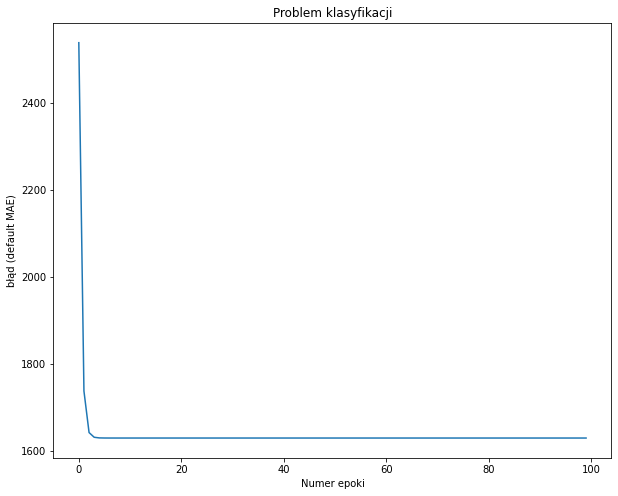

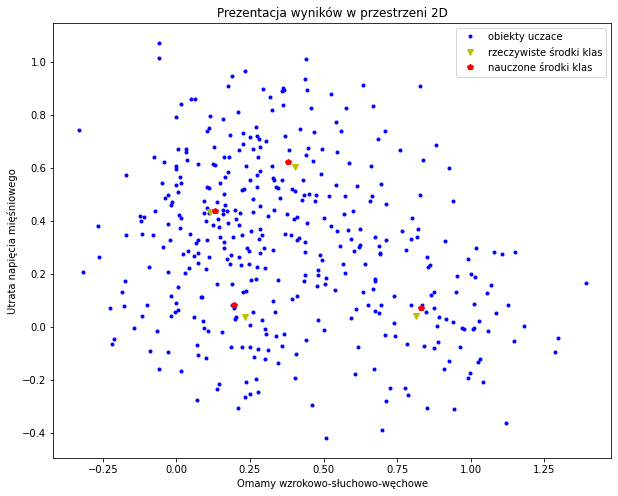

In [ ]:
# Uczenie wykres
fig1 = pl.figure(figsize=(10,8))
pl.title('Problem klasyfikacji')
pl.plot(error)
pl.xlabel('Numer epoki')
pl.ylabel('błąd (default MAE)')
pl.grid(False)
pl.show()

#Wyniki umieszczamy na wykresie: 25 wymiarów - cech! na 2 wymiary
w = net.layers[0].np['w']
cechaX = 7
cechaY = 15 #7, 15 - dobrze widać podział na 4 klasy
fig2 = pl.figure(figsize=(10,8))
pl.title('Prezentacja wyników w przestrzeni 2D')
pl.plot(inp[:,cechaX], inp[:,cechaY], '.b', \
        centr[:,cechaX], centr[:, cechaY] , 'yv', \
        w[:,cechaX], w[:,cechaY], 'rp')
pl.legend(['obiekty uczace', 'rzeczywiste środki klas',
           'nauczone środki klas'])
pl.xlabel('Omamy wzrokowo-słuchowo-węchowe')
pl.ylabel('Utrata napięcia mięśniowego')
pl.show()


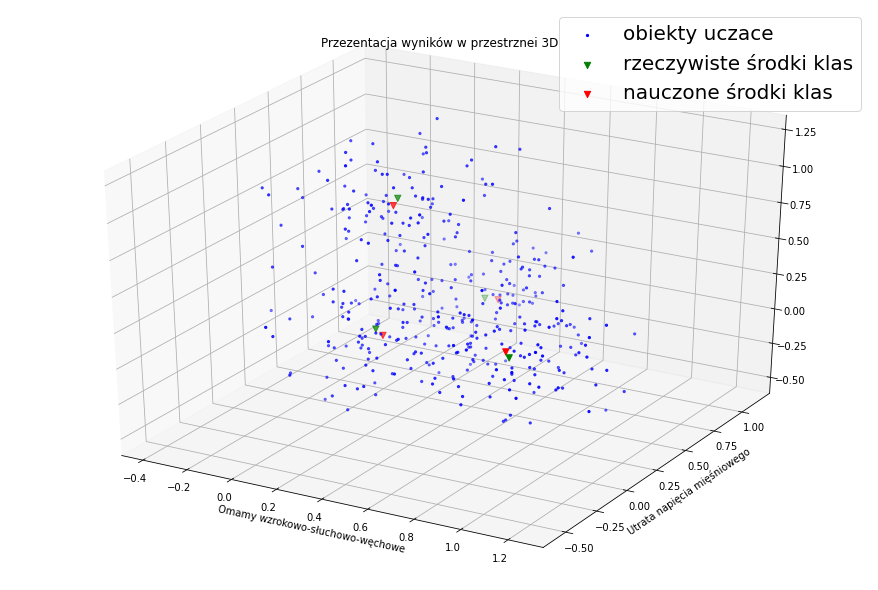

In [ ]:
#Prezentacja wyników na wykresie 3D w przestrzeni 3 cech:
cecha0 = 10
cechaX = 7 # Omamy wzrokowo-słuchowo-węchowe
cechaY = 15 # Utrata napięcia mięśniowego

fig3 = pl.figure(figsize=(12,8))
wykr = Axes3D(fig3)
wykr.scatter(inp[:,cechaX], inp[:,cechaY], inp[:,cecha0], zdir='z', s=20, c='blue', marker='.')
wykr.scatter(centr[:,cechaX], centr[:,cechaY], centr[:,cecha0], zdir='z', s=40, c='green', marker='v')
wykr.scatter(w[:,cechaX], w[:,cechaY], w[:,cecha0], zdir='z', s=40, c='red', marker='v')
plt.legend(['obiekty uczace', 'rzeczywiste środki klas', 'nauczone środki klas'])
plt.xlabel("Omamy wzrokowo-słuchowo-węchowe")
plt.ylabel("Utrata napięcia mięśniowego")
plt.title("Przezentacja wyników w przestrznei 3D")
plt.show()

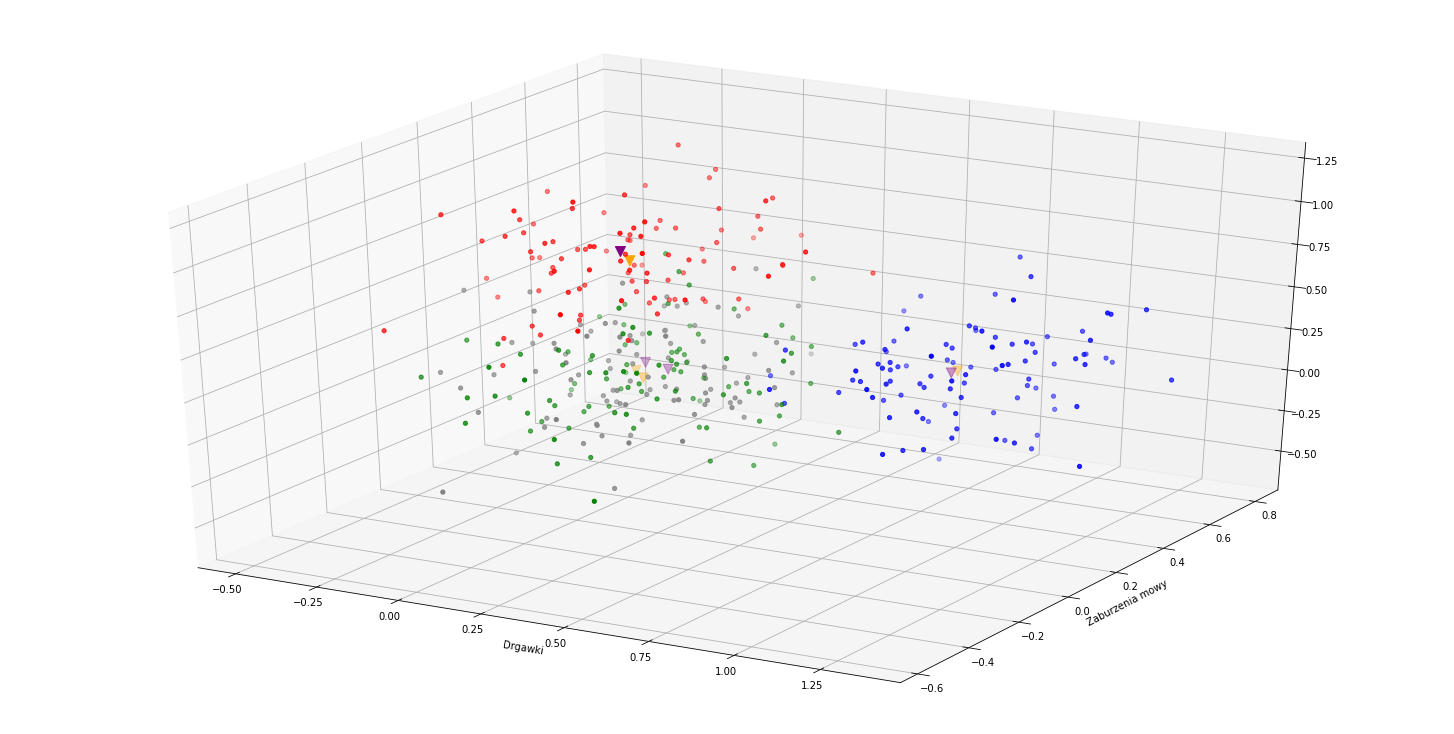

In [ ]:
cecha0 = 10 #Spowolnienie ruchowe
cechaX = 2 # Omamy wzrokowo-słuchowo-węchowe
cechaY = 21 # Utrata napięcia mięśniowego
#ładniejszy wykres - poszczególne choroby zaznaczone kolorami
plt.rc('legend',**{'fontsize':20})
fig4 = plt.figure(figsize=(20,10))
ax = Axes3D(fig4)
ax.scatter(dAlz[:,cechaX], dAlz[:,cechaY], dAlz[:,cecha0], zdir='z', s=70, c='gray', marker='.')
ax.scatter(dPad[:,cechaX], dPad[:,cechaY], dPad[:,cecha0], zdir='z', s=70, c='blue', marker='.')
ax.scatter(dPar[:,cechaX], dPar[:,cechaY], dPar[:,cecha0], zdir='z', s=70, c='red', marker='.')
ax.scatter(dSch[:,cechaX], dSch[:,cechaY], dSch[:,cecha0], zdir='z', s=70, c='green', marker='.')
ax.scatter(centr[:,cechaX], centr[:,cechaY], centr[:,cecha0], zdir='z', s=100, c='purple', marker='v')
ax.scatter(w[:,cechaX], w[:,cechaY], w[:,cecha0], zdir='z', s=100, c='orange', marker='v')
#plt.legend(['Alzheimer', 'Padaczka', 'Parkinson','Schizofrenia', 'rzeczywiste środki klas', 'nauczone środki klas'])
plt.xlabel("Drgawki")
plt.ylabel("Zaburzenia mowy")
#plt.title("Przezentacja wyników w przestrznei 3D")
plt.show()


In [ ]:
#wyznaczenie odległości euklidesowej między środkami wyznaczonymi przez sieć a rzeczywistymi w 25 wymiarach:
for i in range(0,4):
  print("Klasa numer: ", i)
  for j in range(0,25) :
    #print("Cecha numer: ", j)
    r = centr[i, j] - w[i,j]
    r2 = r*r
    euklides = math.sqrt(r2)
    print( euklides)

In [ ]:
#wizualizacja som
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
data = np.float32(np.concatenate((dAlz, dPad, dPar, dSch)))
som.train(data)

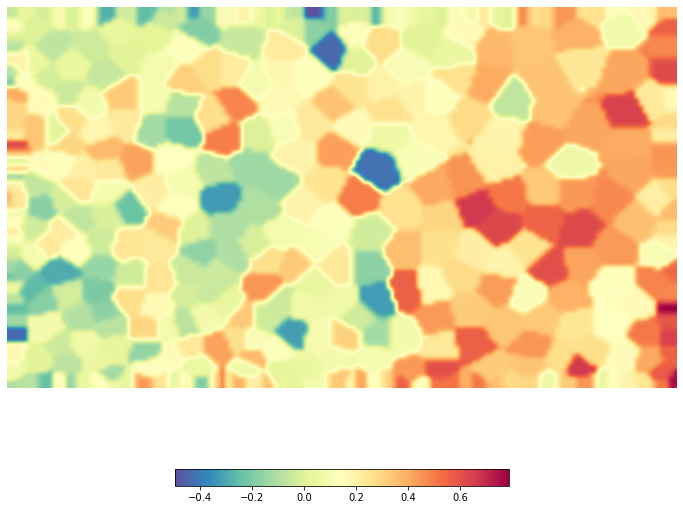

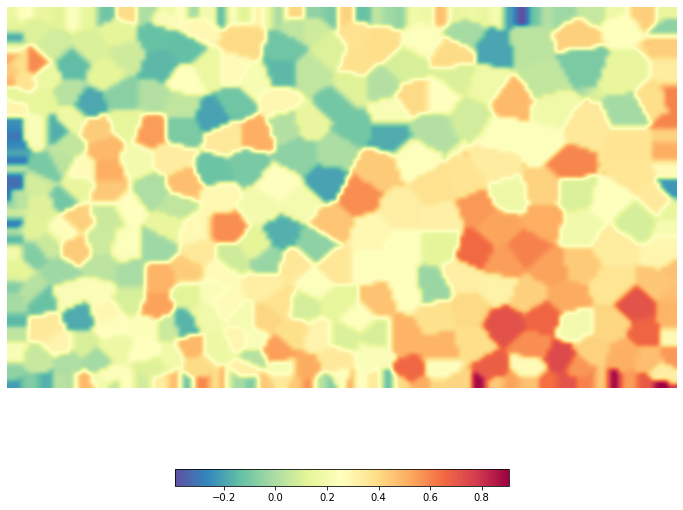

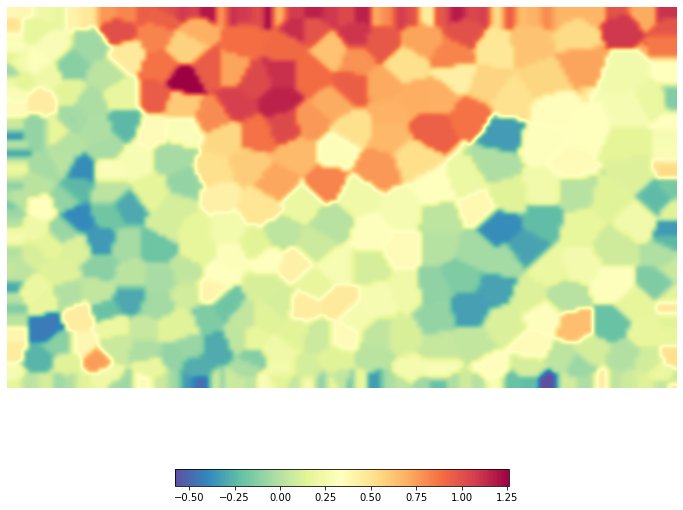

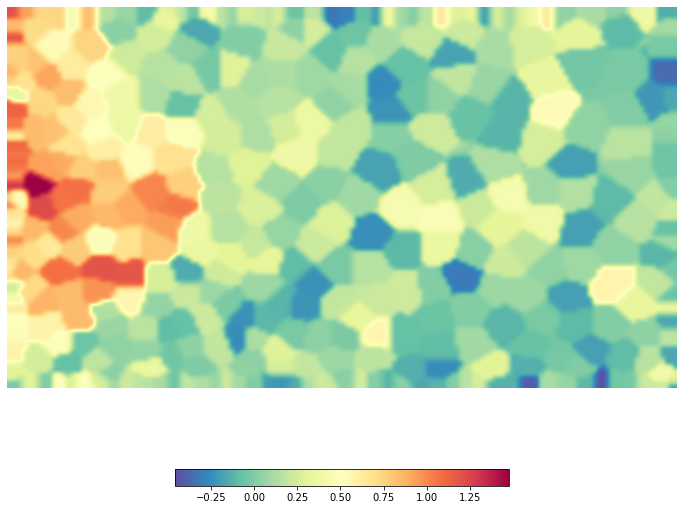

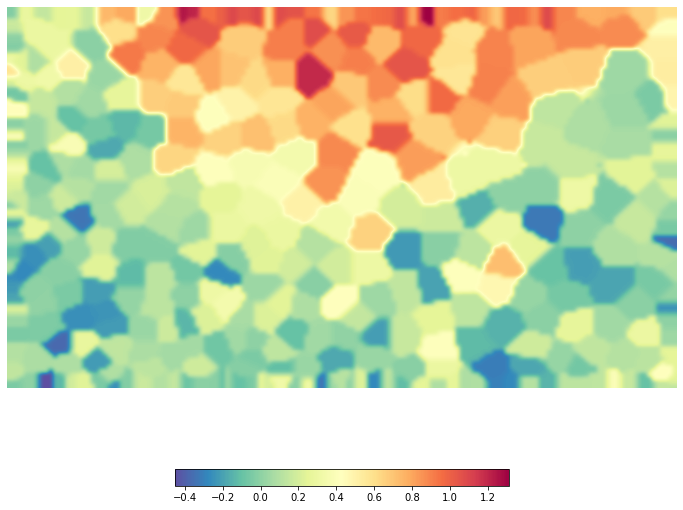

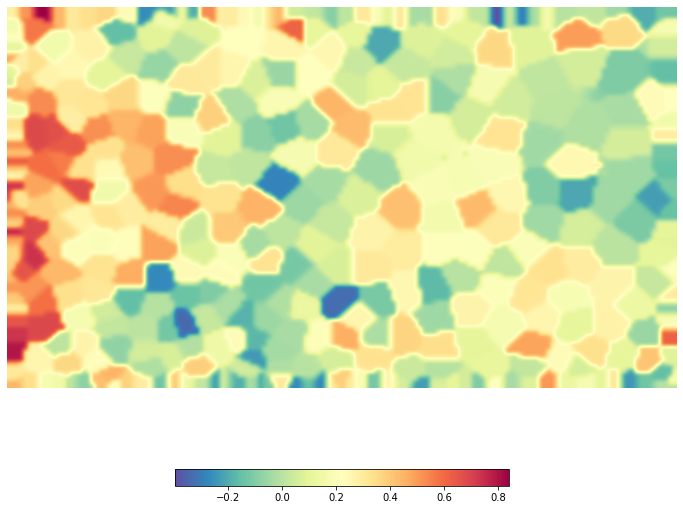

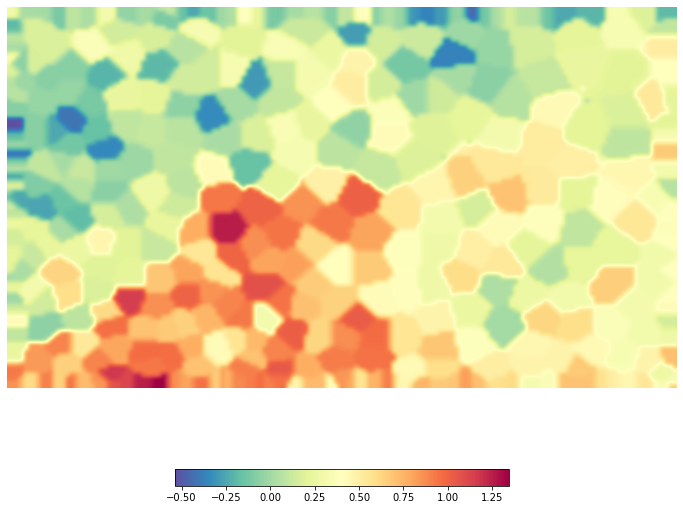

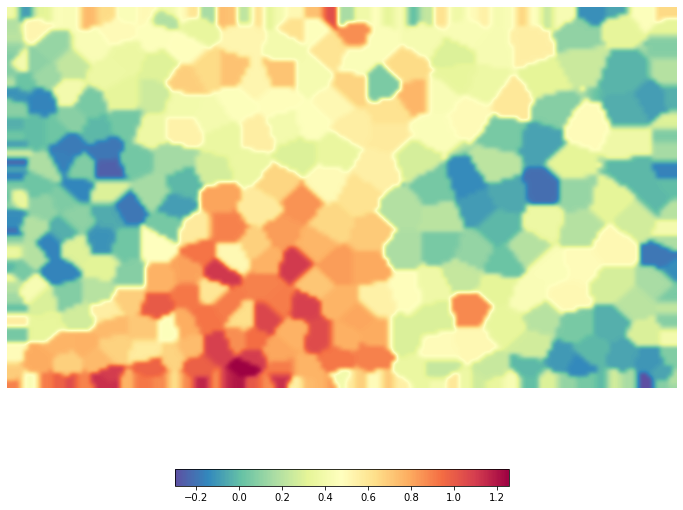

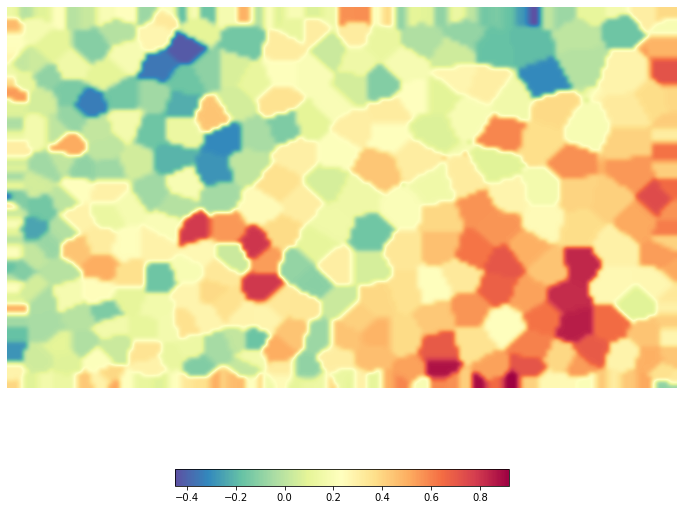

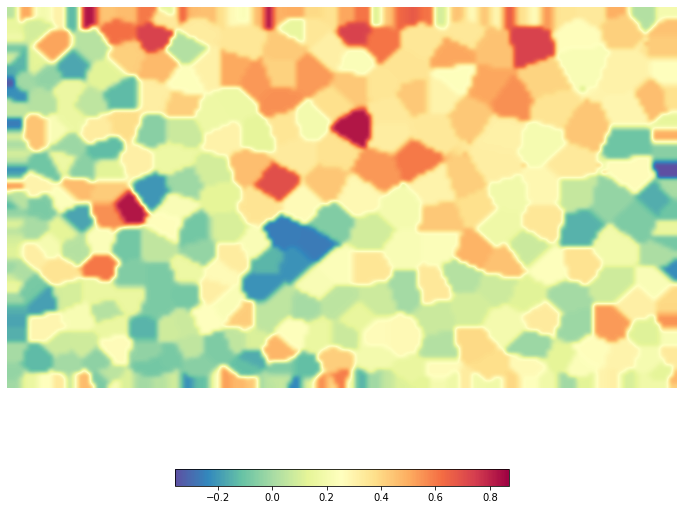

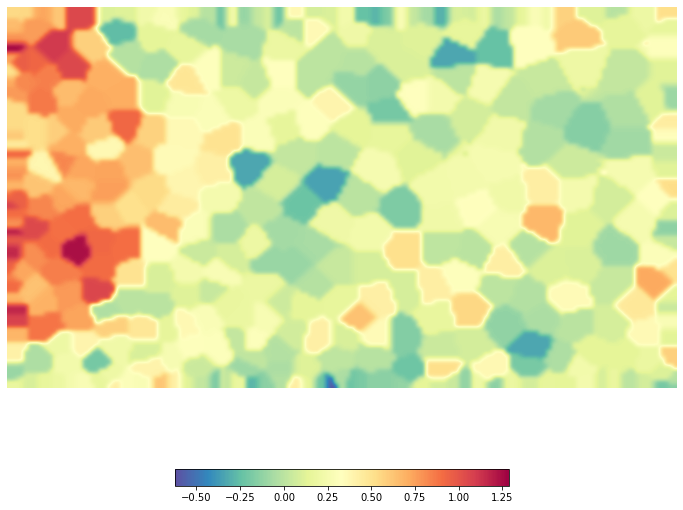

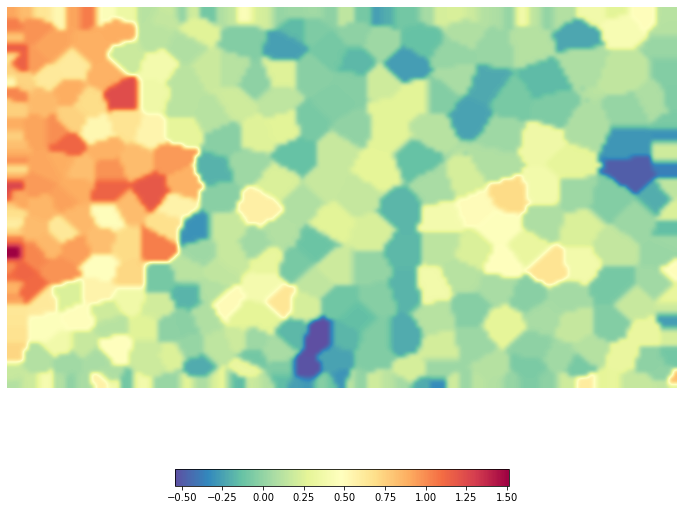

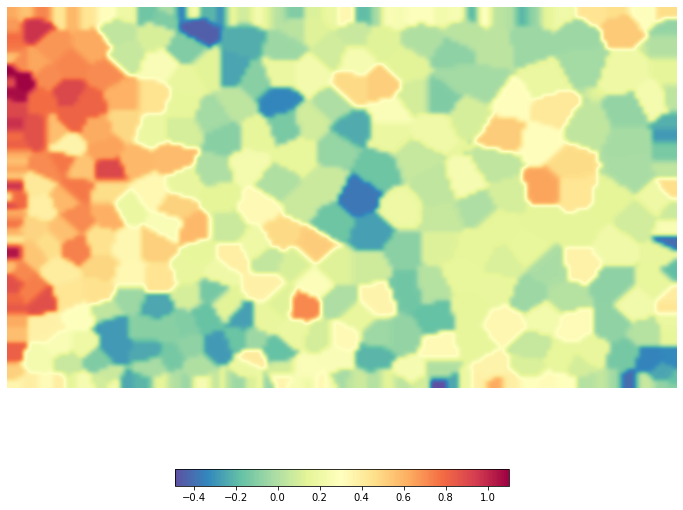

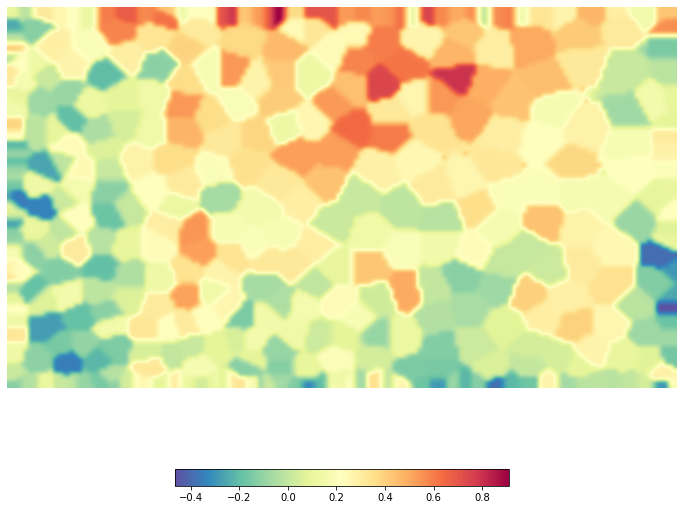

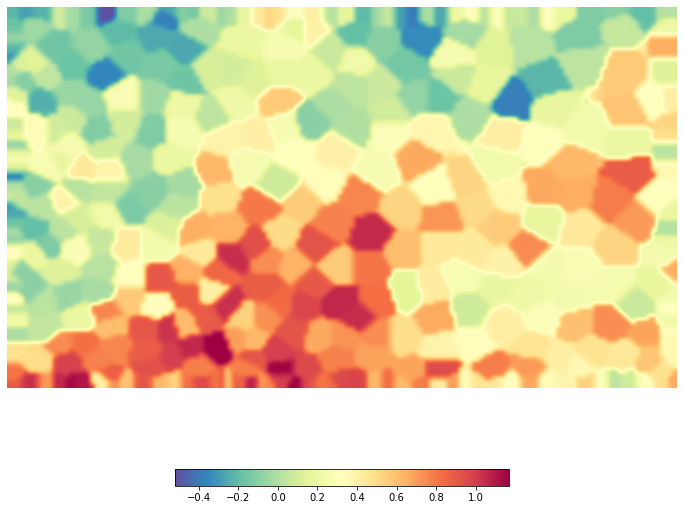

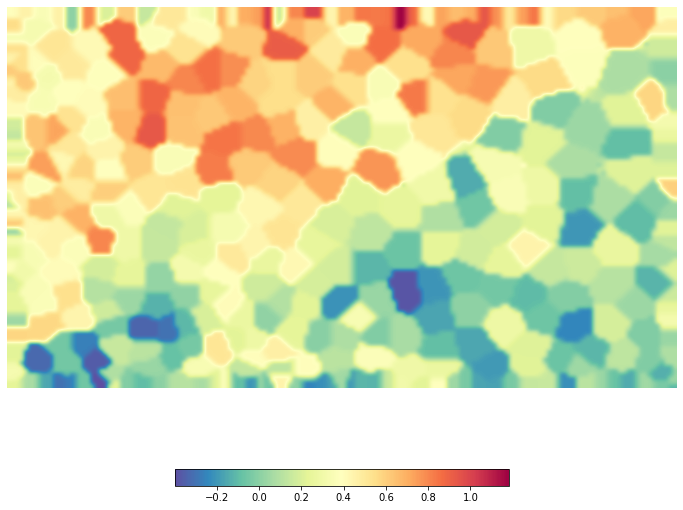

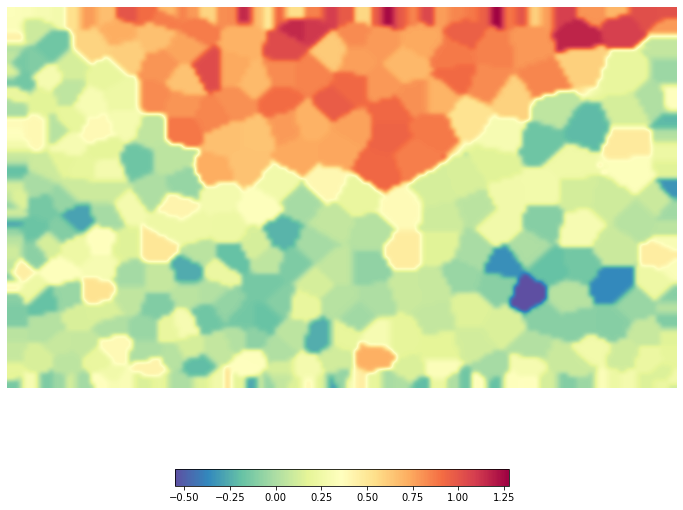

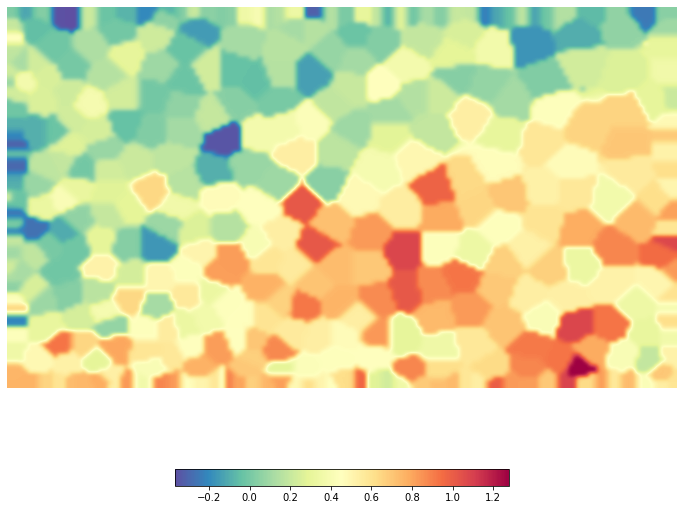

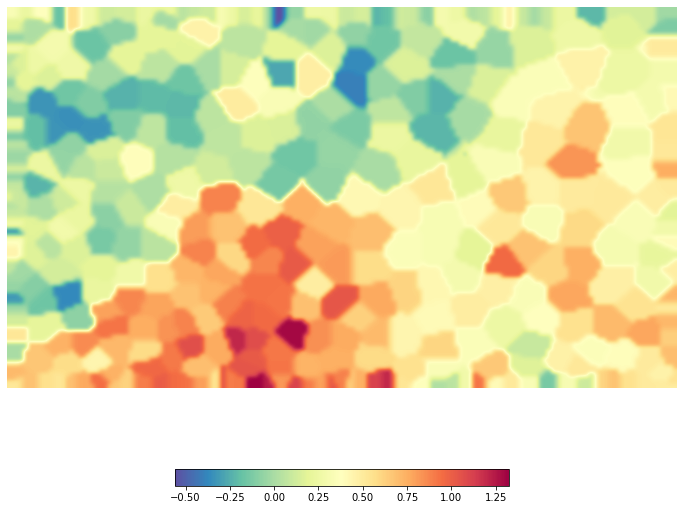

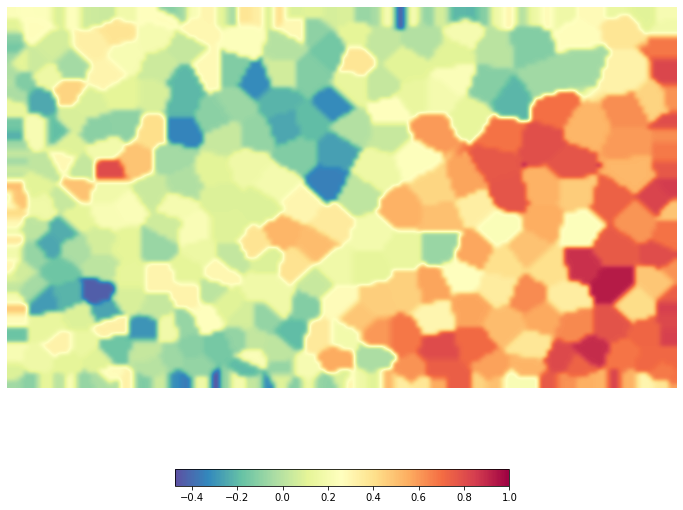

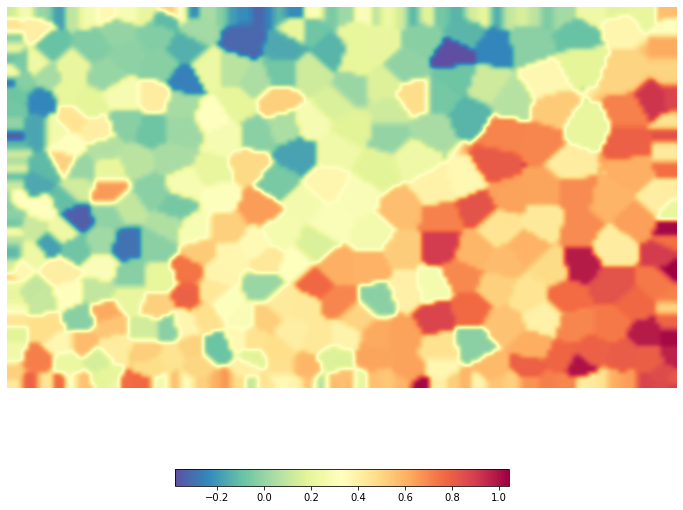

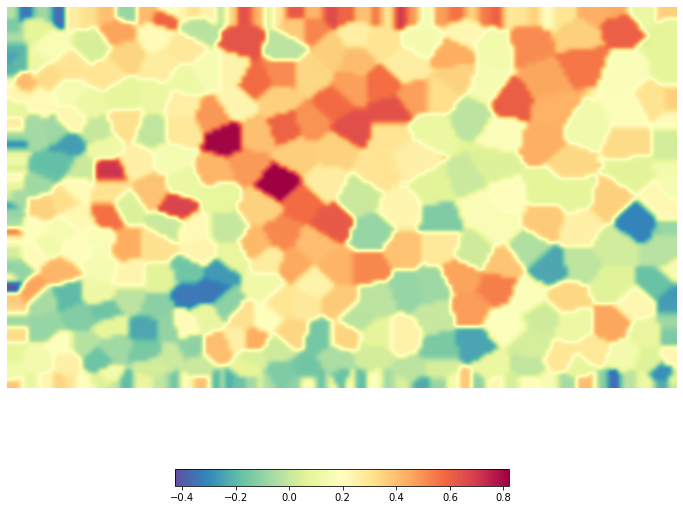

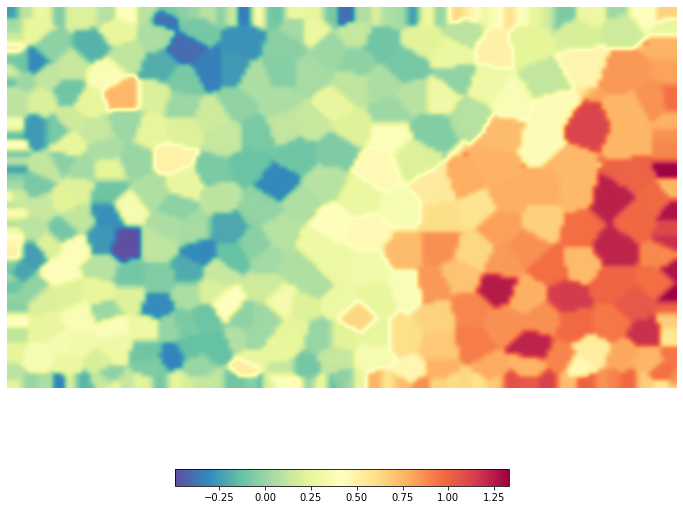

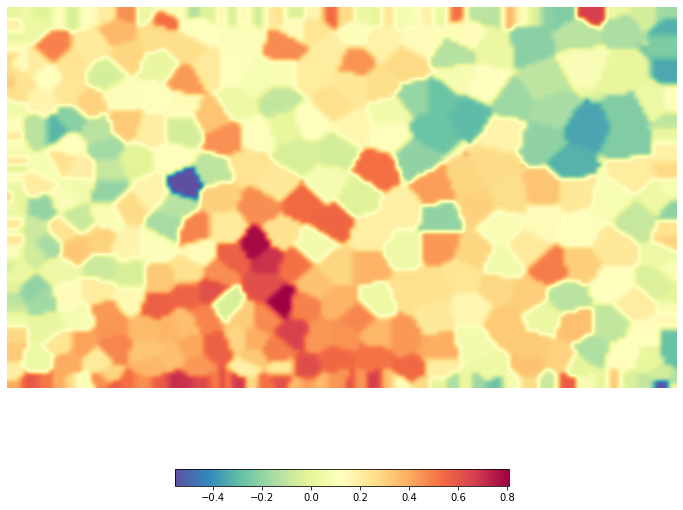

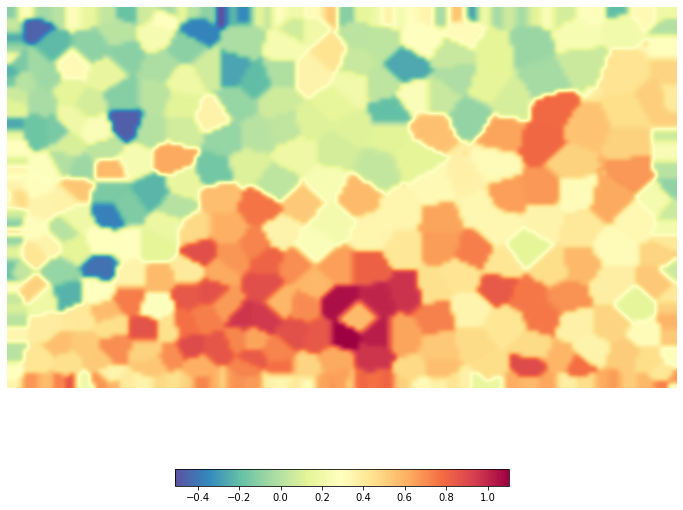

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
#Obserwacja płaszczynz składowych 
som.view_component_planes(figsize = [12,10], colorbar=True)

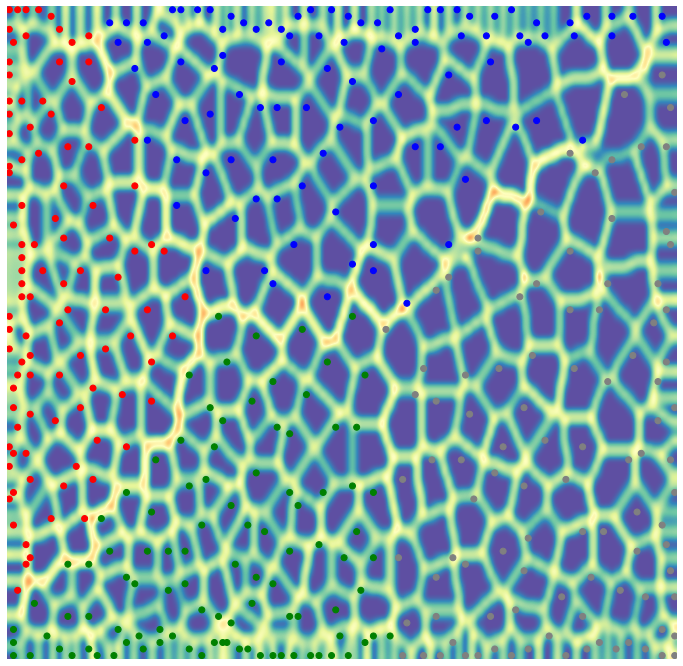

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
#Wykreślenie macierzy-U - reprezentacji som na kt odległość euklidesowa między wektorami przestawiona w skali szarotści, wizulaizacja danych: jasne kolory -> blisko rozmieszczone wektory, ciekne - bardizje rozdzielony
#części jasne można uznać za klastry a ciemne za granice pomiędzy klastrami
colors = ["grey"] * 100
colors.extend(["blue"] * 100)
colors.extend(["red"] * 100)
colors.extend(["green"] * 100)
labels = range(400)
som.view_umatrix(figsize = [12,12], bestmatches=True, bestmatchcolors=colors, )